## CHANDU MEGHANA DEVI
## ID : : IN9240287

## Step 1

###  ANALYSIS OF AMCAT DATA 
The dataset originates from the Aspiring Minds Employment Outcome 2015 (AMEO) and focuses on the employment outcomes of engineering graduates. It includes a mix of demographic information, educational details, standardized test scores in cognitive and technical skills, and personality traits, across approximately 4000 data points. Key features include:

**Personal and Demographic Information:** Includes the candidate's ID, gender, date of birth, job designation, job city, and salary.

**Educational Background:** Covers high school and college academic performances, the tier of the college, specialization, degree, and graduation year.

**Technical and Cognitive Skills:** Scores from AMCAT tests in areas such as English, logical reasoning, quantitative ability, computer programming, and various engineering disciplines.

**Personality Traits:** Scores in conscientiousness, agreeableness, extraversion, neuroticism, and openness to experience.

### **Objective:**

The primary aim is to analyze the relationship between the educational background, skillset, and personality traits of engineering graduates and their employment outcomes, such as job roles and salaries. This includes validating industry claims about salary expectations for specific roles and exploring the influence of gender on specialization preferences.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from scipy import stats

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("AMCAT.csv")

## Step 2 

In [3]:
df.head()

Unnamed: 0      ID     Salary               DOJ               DOL  \
0      train  203097   420000.0  01-06-2012 00:00           present   
1      train  579905   500000.0  01-09-2013 00:00           present   
2      train  810601   325000.0  01-06-2014 00:00           present   
3      train  267447  1100000.0  01-07-2011 00:00           present   
4      train  343523   200000.0  01-03-2014 00:00  01-03-2015 00:00   

                Designation    JobCity Gender               DOB  10percentage  \
0   senior quality engineer  Bangalore      f  19-02-1990 00:00          84.3   
1         assistant manager     Indore      m  04-10-1989 00:00          85.4   
2          systems engineer    Chennai      f  03-08-1992 00:00          85.0   
3  senior software engineer    Gurgaon      m  05-12-1989 00:00          85.6   
4                       get    Manesar      m  27-02-1991 00:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1         -1   
1  ...              -1              -1              -1          -1         -1   
2  ...              -1              -1              -1          -1         -1   
3  ...              -1              -1              -1          -1         -1   
4  ...              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [4]:
df.shape

(3998, 39)

In [5]:

df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [6]:
df.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [8]:
date_columns = ['DOJ','DOB']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='ignore', format='%m/%d/%y %H:%M')


In [9]:
today_date = datetime.today().strftime('%Y-%m-%d')
df['DOL']=df['DOL'].replace('present',today_date)
df['DOL'] = pd.to_datetime(df['DOL'], dayfirst=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   float64       
 3   DOJ                    3998 non-null   object        
 4   DOL                    3998 non-null   datetime64[ns]
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   object        
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [11]:
print(df.isnull().sum())

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [12]:
desig = df['Designation'].unique()

desig.sort()

In [13]:
desig

array(['.net developer', '.net web developer', 'account executive',
       'account manager', 'admin assistant', 'administrative coordinator',
       'administrative support', 'aircraft technician',
       'android developer', 'application developer',
       'application engineer', 'apprentice', 'ase', 'asp.net developer',
       'assistant administrator', 'assistant electrical engineer',
       'assistant engineer', 'assistant manager', 'assistant professor',
       'assistant programmer', 'assistant software engineer',
       'assistant store manager', 'assistant system engineer',
       'assistant system engineer - trainee',
       'assistant system engineer trainee', 'assistant systems engineer',
       'associate developer', 'associate engineer', 'associate manager',
       'associate qa', 'associate software developer',
       'associate software engg', 'associate software engineer',
       'associate system engineer', 'associate technical operations',
       'associate test engi

In [14]:
def feature_cleaning(input_val, input_list):
  if type(input_val) == str:
    for item in [i for i in input_list if len(i.split()) > 1]:
      if all([x in input_val for x in item.split()]):
        return item.title()
          
    for item in [i for i in input_list if len(i.split()) == 1]:
      if item in input_val:
        return item.title()
    if 'engineer' in input_val:
      return 'Hardware Engineer'
    try:
      matched_item = get_close_matches(input_val, input_list)[0]
      return matched_item.title()
    except:
      return 'Other'
        
  else:
    return np.nan

In [15]:
roles_list = ['software engineer', 'system engineer', 'developer', 'analyst', 'test engineer', 'dba', 
            'administrator', 'customer service', 'quality engineer', 'quality', 'automation engineer',
            'network engineer', 'support', 'it engineer', 'manager', 'management', 'programmer', 
            'tester', 'qa engineer', 'design']

In [16]:
df['Job_Role'] = df['Designation'].apply(lambda x: feature_cleaning(x, roles_list))
jr_sorted = df['Job_Role'].unique()
jr_sorted.sort()
jr_sorted

array(['Administrator', 'Analyst', 'Automation Engineer',
       'Customer Service', 'Dba', 'Design', 'Developer',
       'Hardware Engineer', 'It Engineer', 'Management', 'Manager',
       'Network Engineer', 'Other', 'Programmer', 'Qa Engineer',
       'Quality', 'Quality Engineer', 'Software Engineer', 'Support',
       'System Engineer', 'Test Engineer', 'Tester'], dtype=object)

In [17]:
df['Job_Role'] = df['Job_Role'].replace({'It Engineer': 'Software Engineer', 'Network Engineer': 'System Engineer', 'Dba': 'System Engineer',
                                   'Support': 'Administrator', 'Customer Service': 'Administrator',
                                   'Tester': 'Test Engineer', 'Qa Engineer': 'Test Engineer', 'Quality': 'Test Engineer', 
                                   'Quality Engineer': 'Test Engineer', 'Automation Engineer': 'Test Engineer', 
                                   'Programmer': 'Developer', 'Management': 'Manager', 'Design': 'Other'})

In [18]:
df['Job_Role'].value_counts(dropna=False)

Software Engineer    941
Developer            753
System Engineer      477
Hardware Engineer    466
Other                413
Analyst              411
Administrator        197
Test Engineer        180
Manager              160
Name: Job_Role, dtype: int64

In [19]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [20]:
specialization_mapping = {'electronics and communication engineering' : 'ECE',
 'computer science & engineering' : 'CSE',
 'information technology' : 'CSE' ,
 'computer engineering' : 'CSE',
 'computer application' : 'CSE',
 'mechanical engineering' : 'MECH',
 'electronics and electrical engineering' : 'ECE',
 'electronics & telecommunications' : 'ECE',
 'electrical engineering' : 'EEE',
 'electronics & instrumentation eng' : 'ECE',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'ECE',
 'information science engineering' : 'CSE',
 'instrumentation and control engineering' : 'ECE',
 'electronics engineering' : 'ECE',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'ECE',
 'computer science and technology' : 'CSE',
 'telecommunication engineering' : 'ECE',
 'mechanical and automation' : 'MECH',
 'automobile/automotive engineering' : 'MECH',
 'instrumentation engineering' : 'ECE',
 'mechatronics' : 'MECH',
 'electronics and computer engineering' : 'CSE',
 'aeronautical engineering' : 'MECH',
 'computer science' : 'CSE',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'ECE',
 'electrical and power engineering' : 'EEE',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CSE',
 'embedded systems technology' : 'ECE',
 'power systems and automation' : 'EEE',
 'computer and communication engineering' : 'CSE',
 'information science' : 'CSE',
 'internal combustion engine' : 'MECH',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'MECH',
 'control and instrumentation engineering' : 'ECE',
 'polymer technology' : 'other',
 'electronics' : 'ECE'}

for old, new in specialization_mapping.items():
    df['Specialization'] = df['Specialization'].replace(old, new)

In [21]:
df['Specialization'].unique()

array(['CSE', 'ECE', 'MECH', 'EEE', 'CE', 'other'], dtype=object)

## Step 3 - Univariate Analysis

## Non Visual Analysis

In [22]:

discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [23]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [24]:
discrete_univariate_analysis(discrete_df)

********** Unnamed: 0 **********
count         3998
nunique          1
unique     [train]
Name: Unnamed: 0, dtype: object
Value Counts: 
 train    3998
Name: Unnamed: 0, dtype: int64

********** DOJ **********
count                                                   3998
nunique                                                   81
unique     [01-06-2012 00:00, 01-09-2013 00:00, 01-06-201...
Name: DOJ, dtype: object
Value Counts: 
 01-07-2014 00:00    199
01-06-2014 00:00    180
01-08-2014 00:00    178
01-09-2014 00:00    142
01-01-2014 00:00    142
                   ... 
01-11-2015 00:00      1
01-11-2009 00:00      1
01-08-2004 00:00      1
01-09-2009 00:00      1
01-02-2007 00:00      1
Name: DOJ, Length: 81, dtype: int64

********** Designation **********
count                                                   3998
nunique                                                  419
unique     [senior quality engineer, assistant manager, s...
Name: Designation, dtype: object
Value Counts: 


In [25]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [26]:
numerical_univariate_analysis(numerical_df)

********** ID **********
min       1.124400e+04
max       1.298275e+06
mean      6.637945e+05
median    6.396000e+05
std       3.632182e+05
Name: ID, dtype: float64

********** Salary **********
min       3.500000e+04
max       4.000000e+06
mean      3.076998e+05
median    3.000000e+05
std       2.127375e+05
Name: Salary, dtype: float64

********** 10percentage **********
min       43.000000
max       97.760000
mean      77.925443
median    79.150000
std        9.850162
Name: 10percentage, dtype: float64

********** 12graduation **********
min       1995.000000
max       2013.000000
mean      2008.087544
median    2008.000000
std          1.653599
Name: 12graduation, dtype: float64

********** 12percentage **********
min       40.000000
max       98.700000
mean      74.466366
median    74.400000
std       10.999933
Name: 12percentage, dtype: float64

********** CollegeID **********
min           2.000000
max       18409.000000
mean       5156.851426
median     3879.000000
std        48

## Univariate - Visual Analysis
### Outlier Detection

In [27]:
# Univariate Analysis - Numerical Variables
numerical_cols = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
                  'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
                  'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
                  'openess_to_experience']

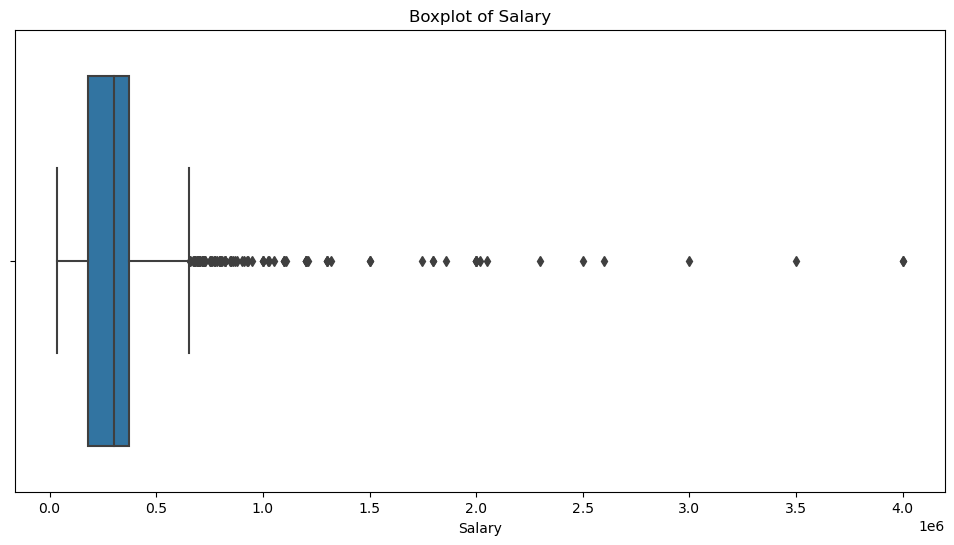

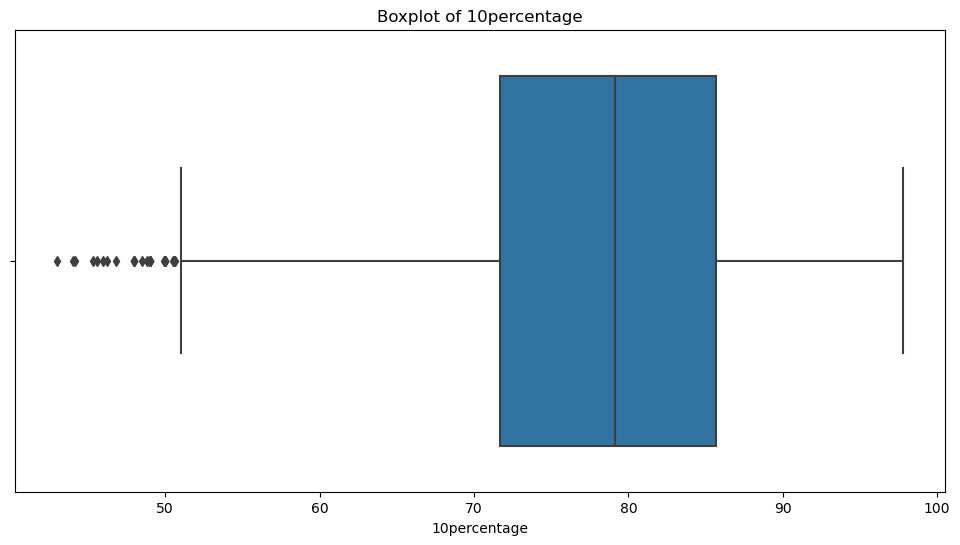

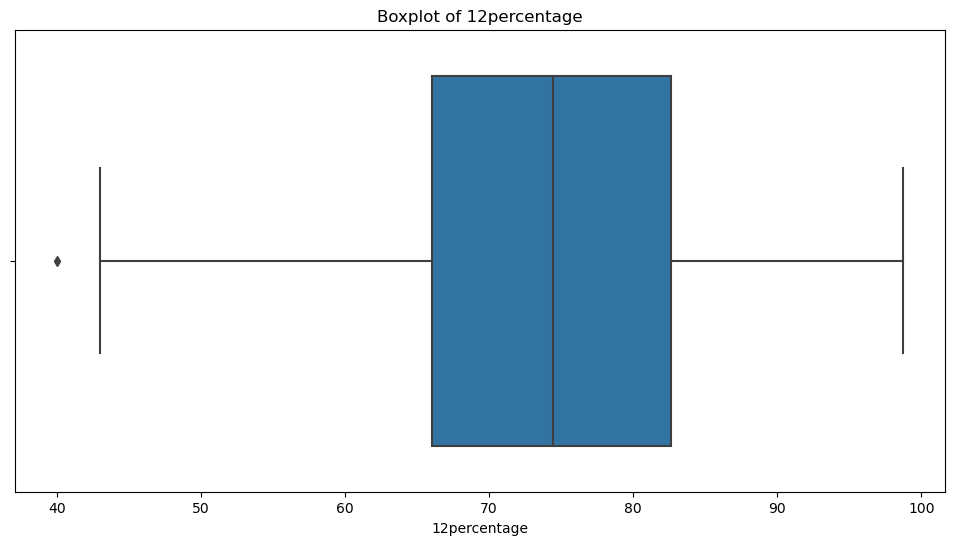

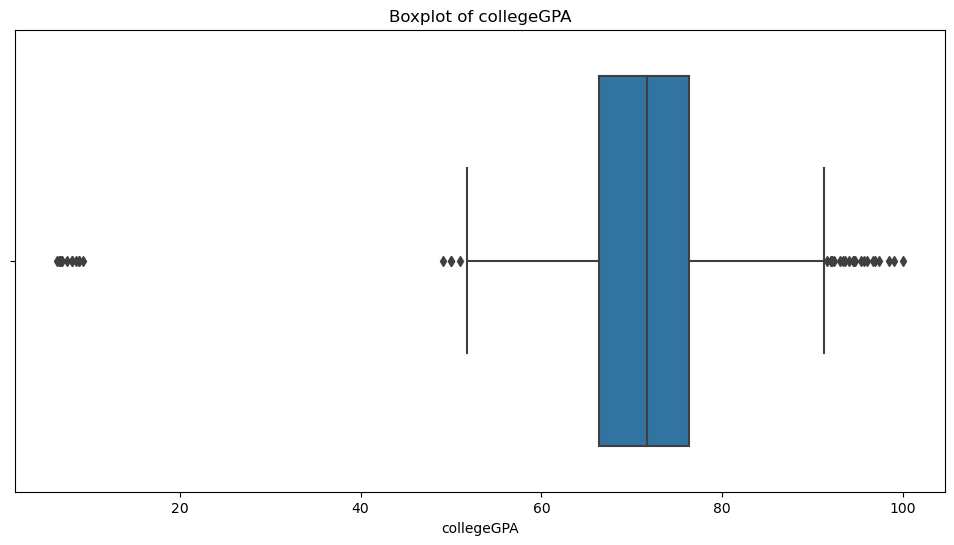

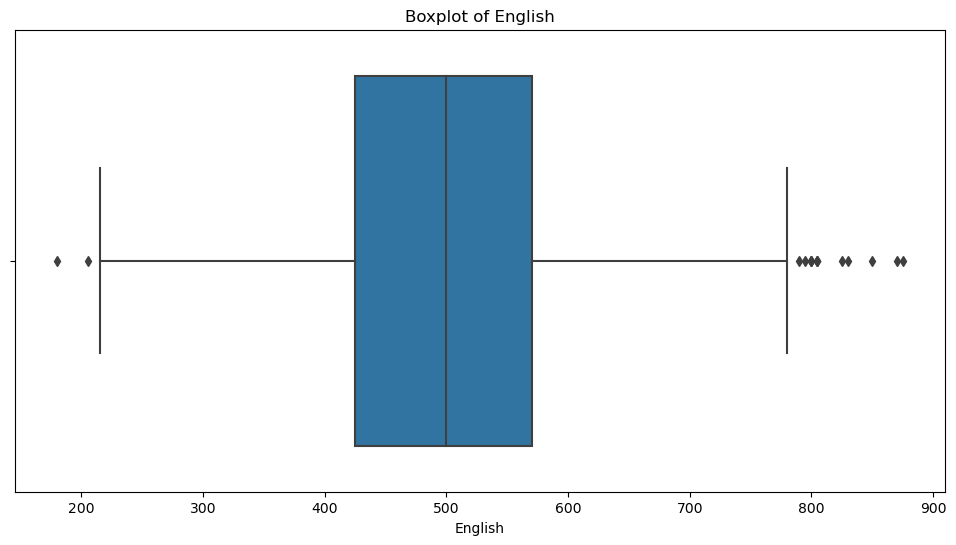

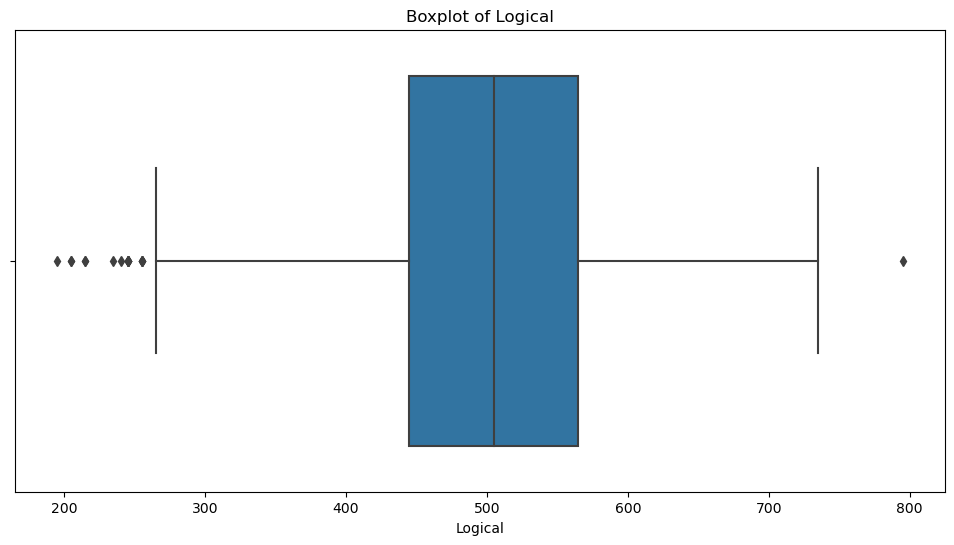

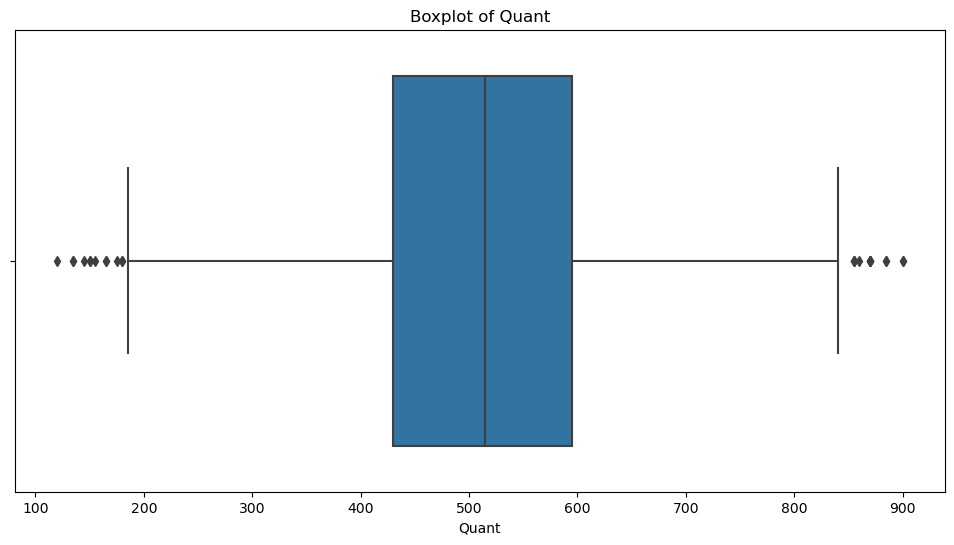

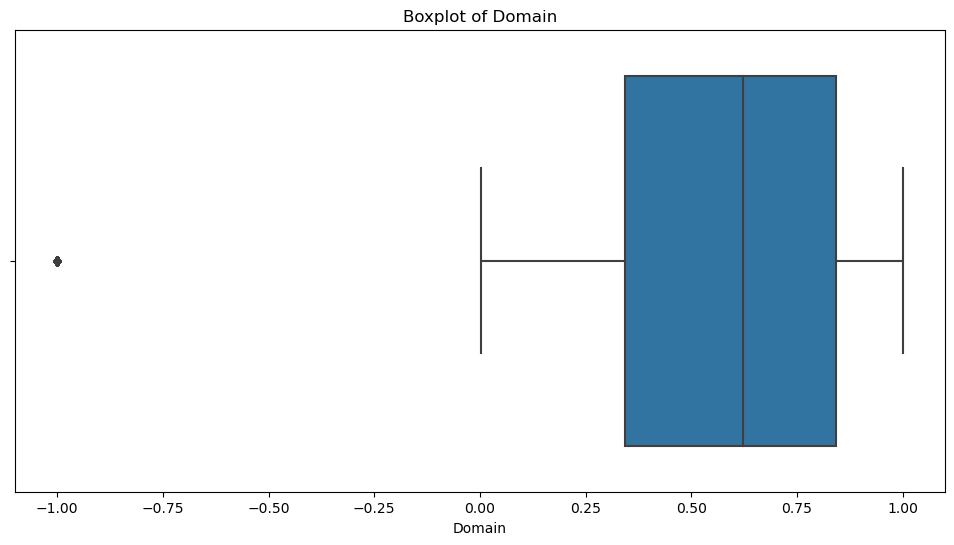

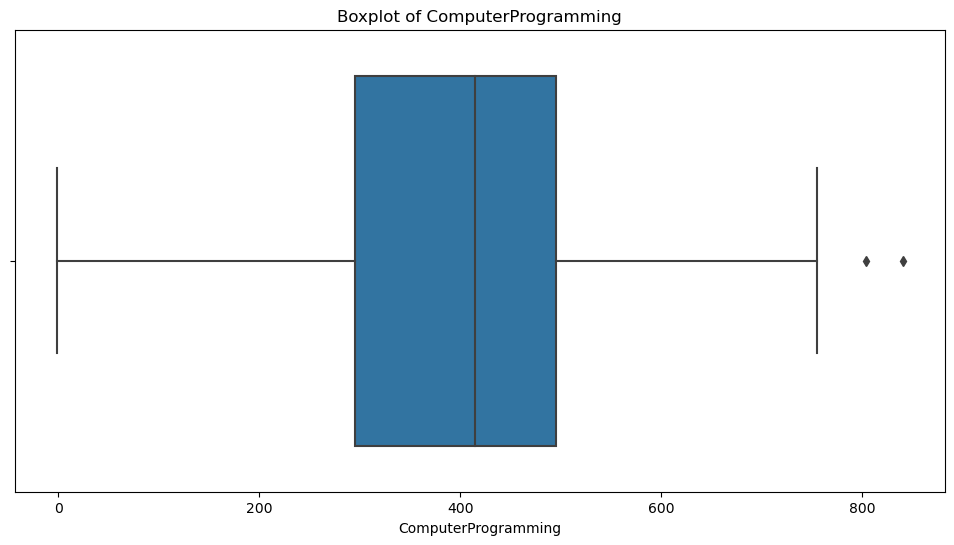

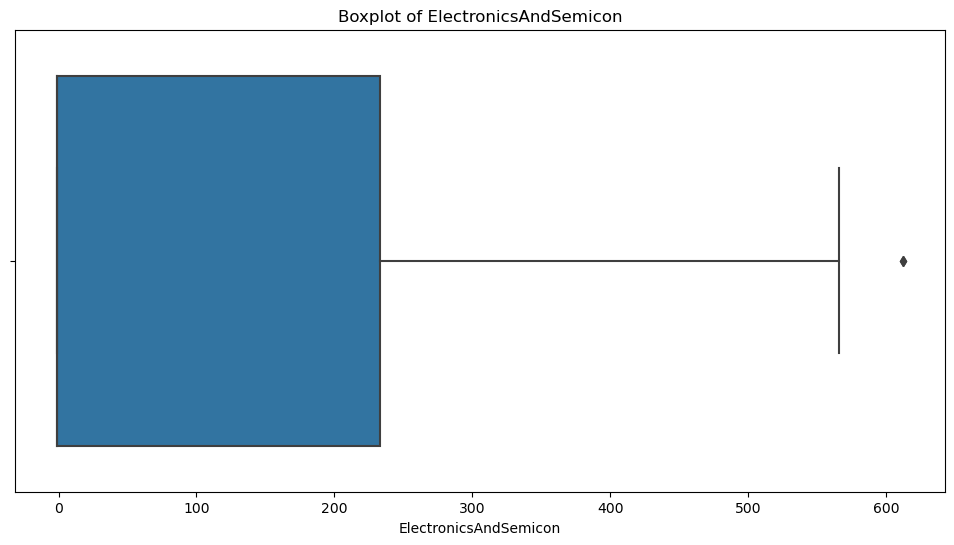

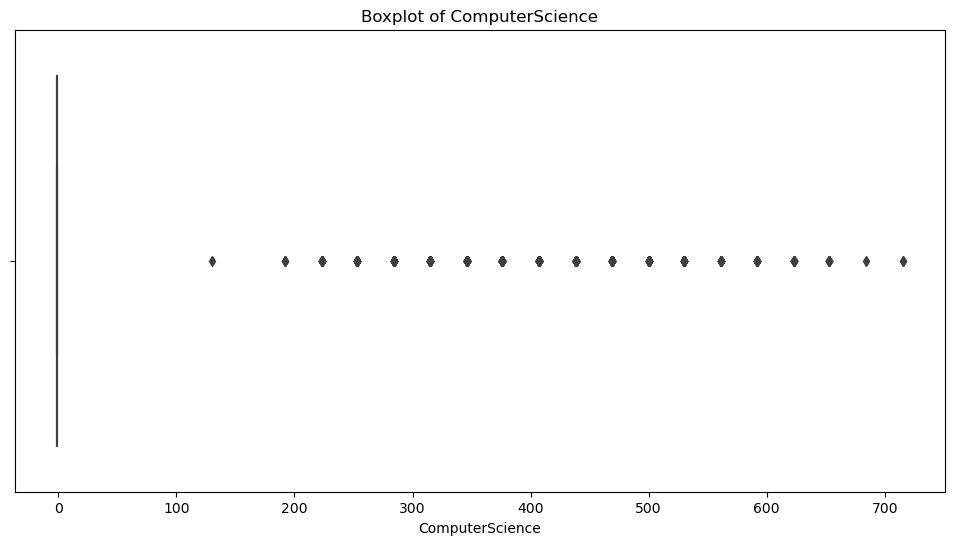

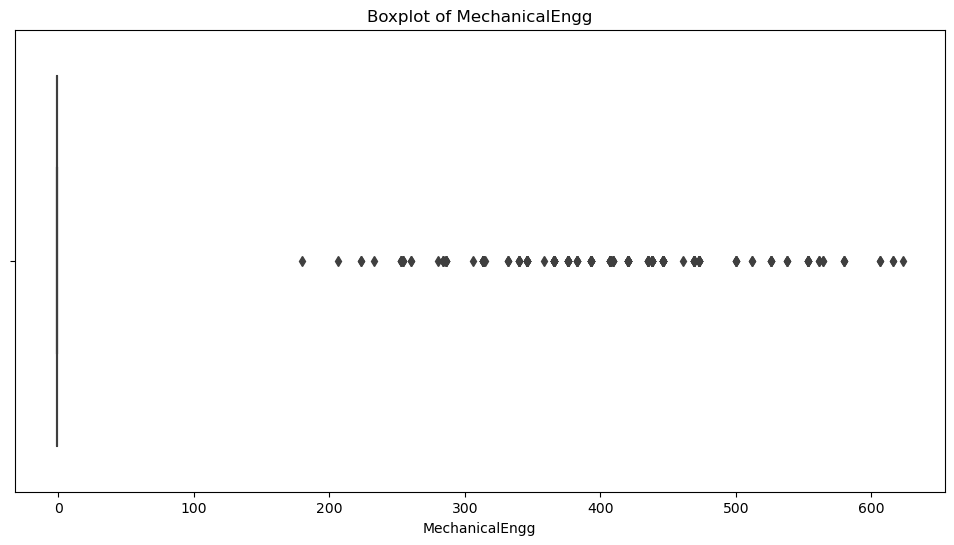

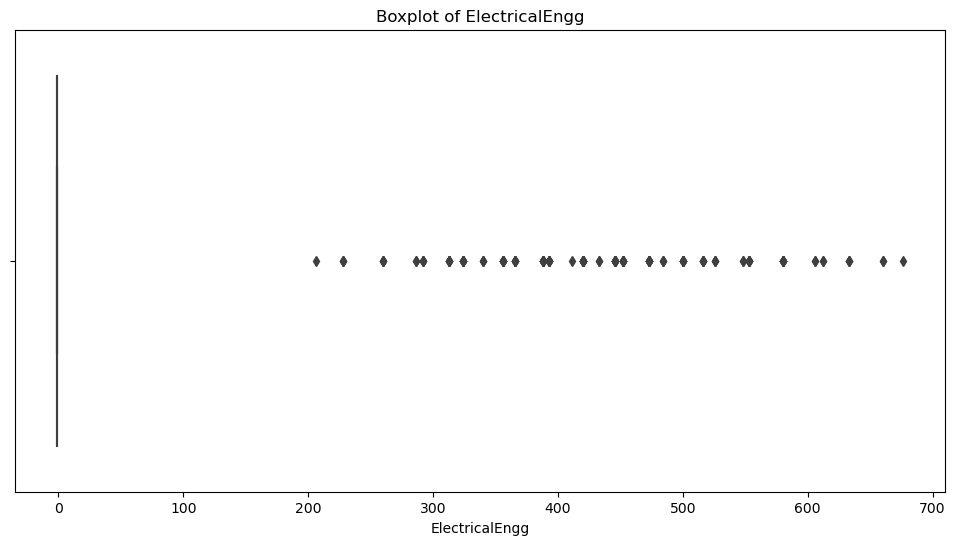

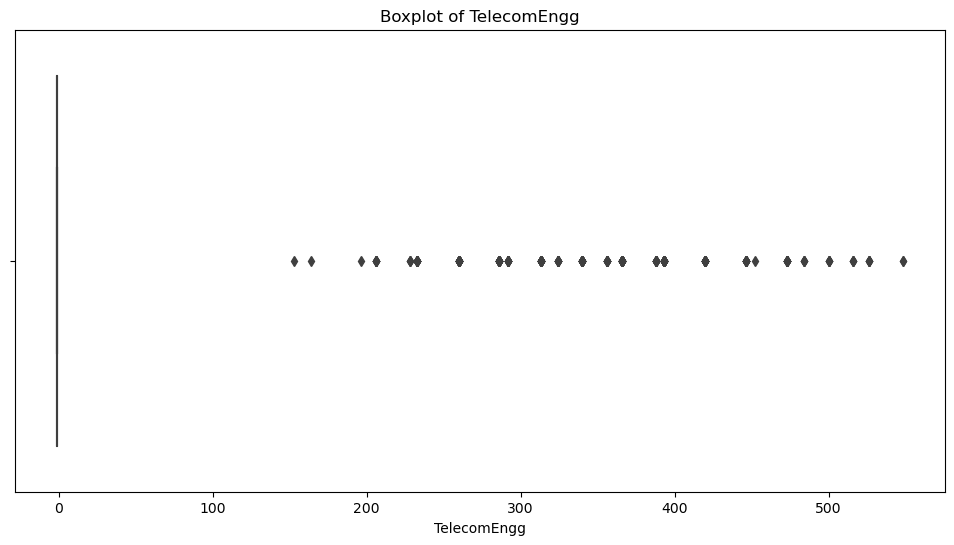

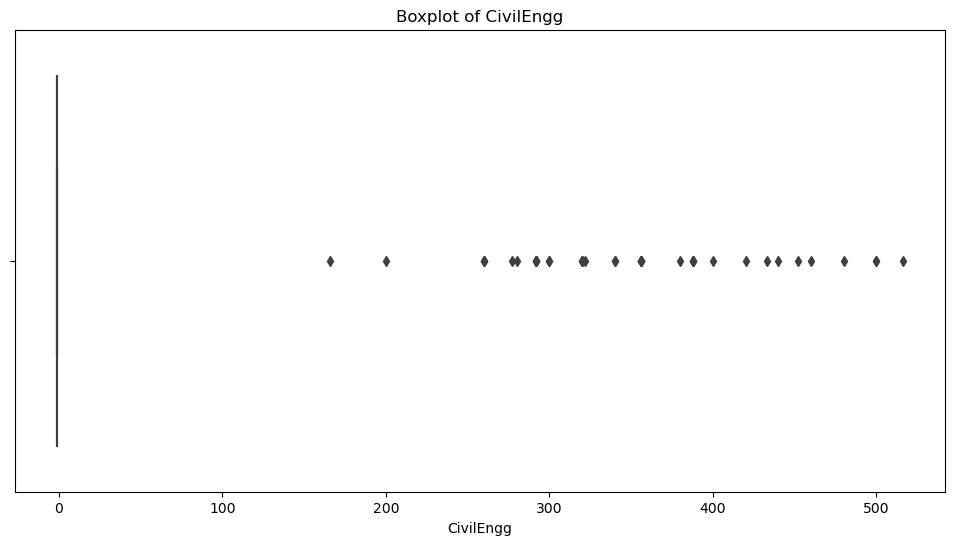

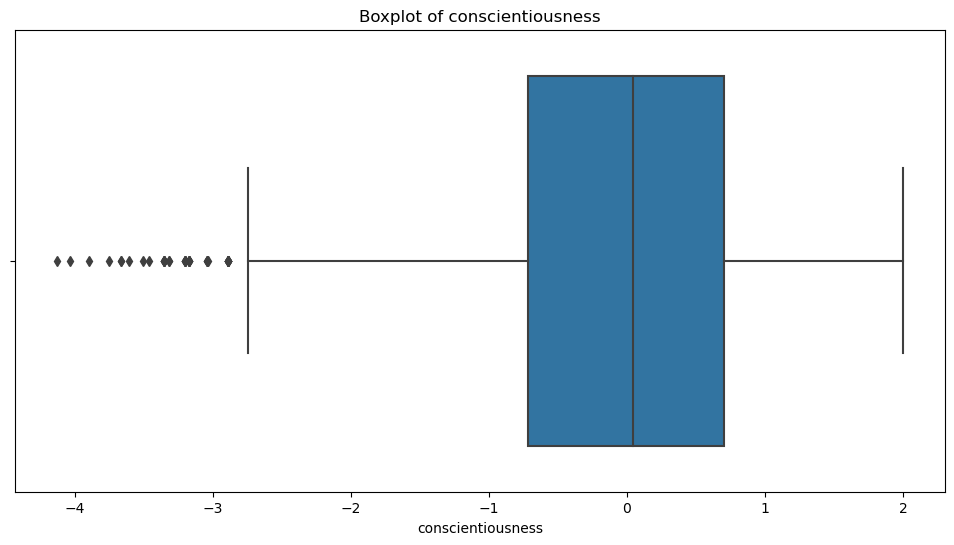

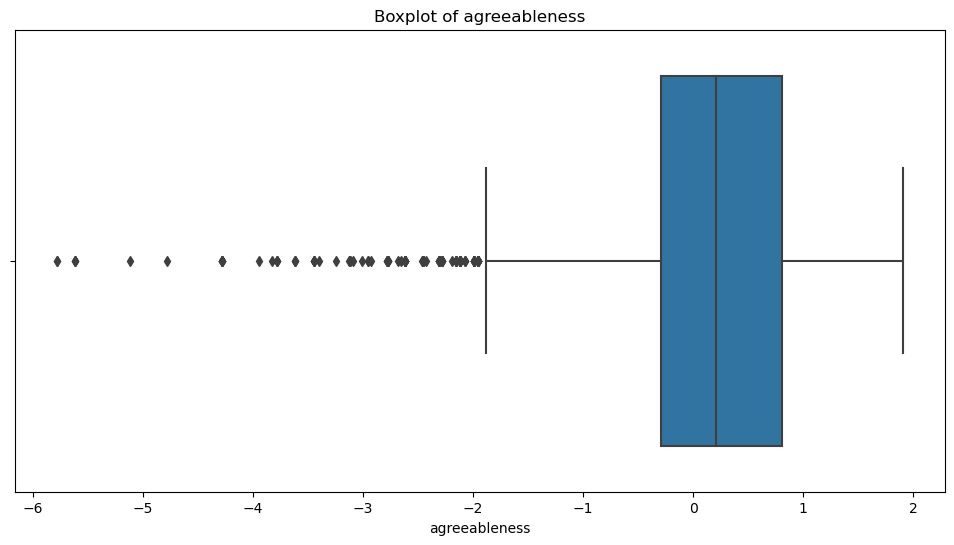

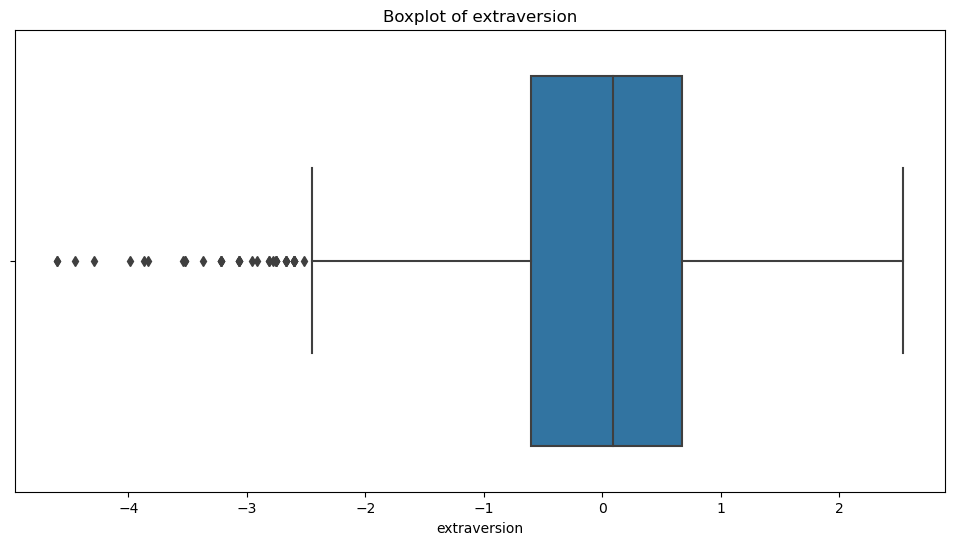

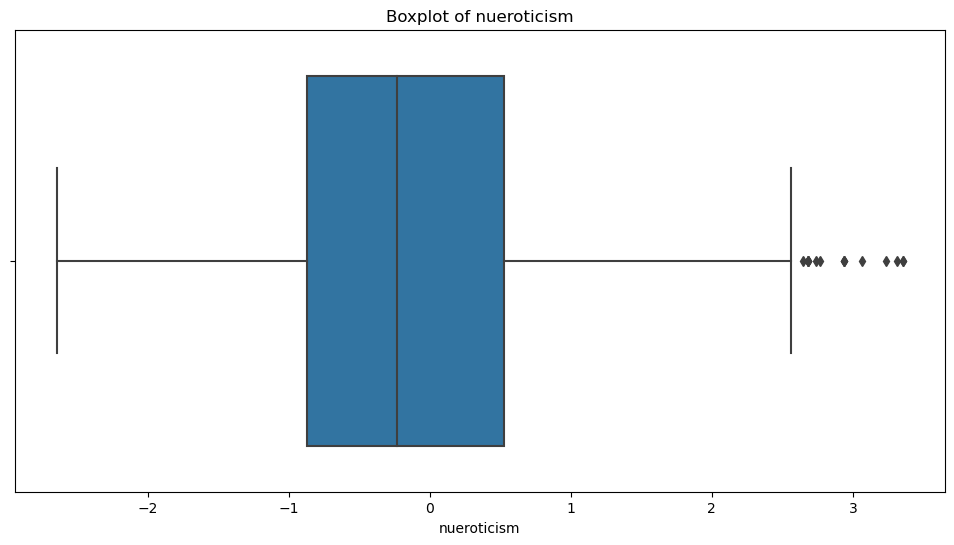

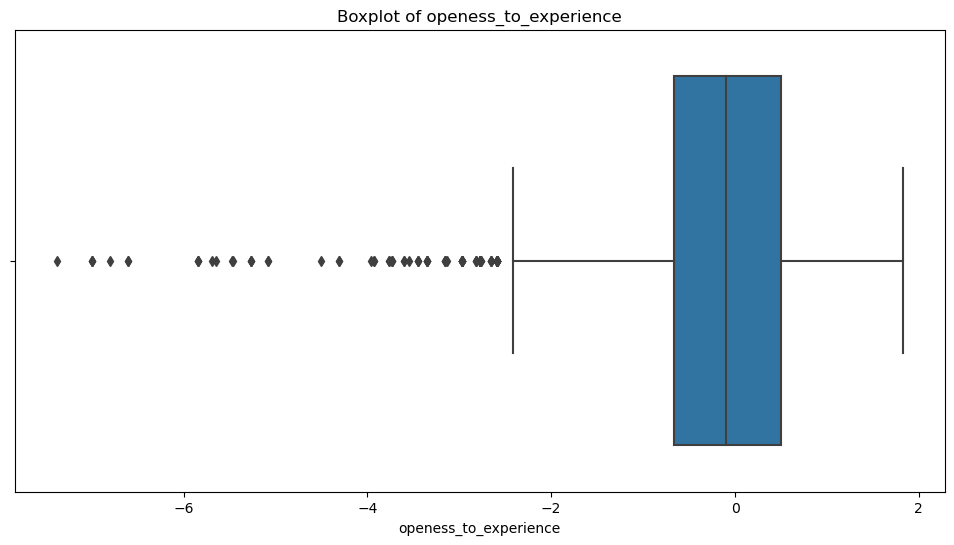

In [28]:
# Plotting boxplots to detect outliers

for column in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x = df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [29]:
# Outlier Detection
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Outliers in {col}: {len(outliers)}')

Outliers in Salary: 109
Outliers in 10percentage: 30
Outliers in 12percentage: 1
Outliers in collegeGPA: 38
Outliers in English: 15
Outliers in Logical: 18
Outliers in Quant: 25
Outliers in Domain: 246
Outliers in ComputerProgramming: 2
Outliers in ElectronicsAndSemicon: 2
Outliers in ComputerScience: 902
Outliers in MechanicalEngg: 235
Outliers in ElectricalEngg: 161
Outliers in TelecomEngg: 374
Outliers in CivilEngg: 42
Outliers in conscientiousness: 39
Outliers in agreeableness: 123
Outliers in extraversion: 40
Outliers in nueroticism: 15
Outliers in openess_to_experience: 95


### Outlier Treatment
#### Filtering the data so that there would be consistency in the data

In [30]:
df=df.loc[(df["Domain"]>-1)]
df.shape

(3752, 40)

In [31]:

df=df.loc[(df["MechanicalEngg"]< 200)]
df.shape

(3521, 40)

In [32]:
df=df.loc[(df["ElectricalEngg"]< 200)]
df.shape

(3363, 40)

In [33]:
df=df.loc[(df["TelecomEngg"]< 100)]
df.shape

(2995, 40)

In [34]:
df=df.loc[(df["agreeableness"]> -1.5)]
df.shape

(2853, 40)

In [35]:

df=df.loc[(df["openess_to_experience"]> -1.5)]
df.shape

(2709, 40)

### Frequency Distribution

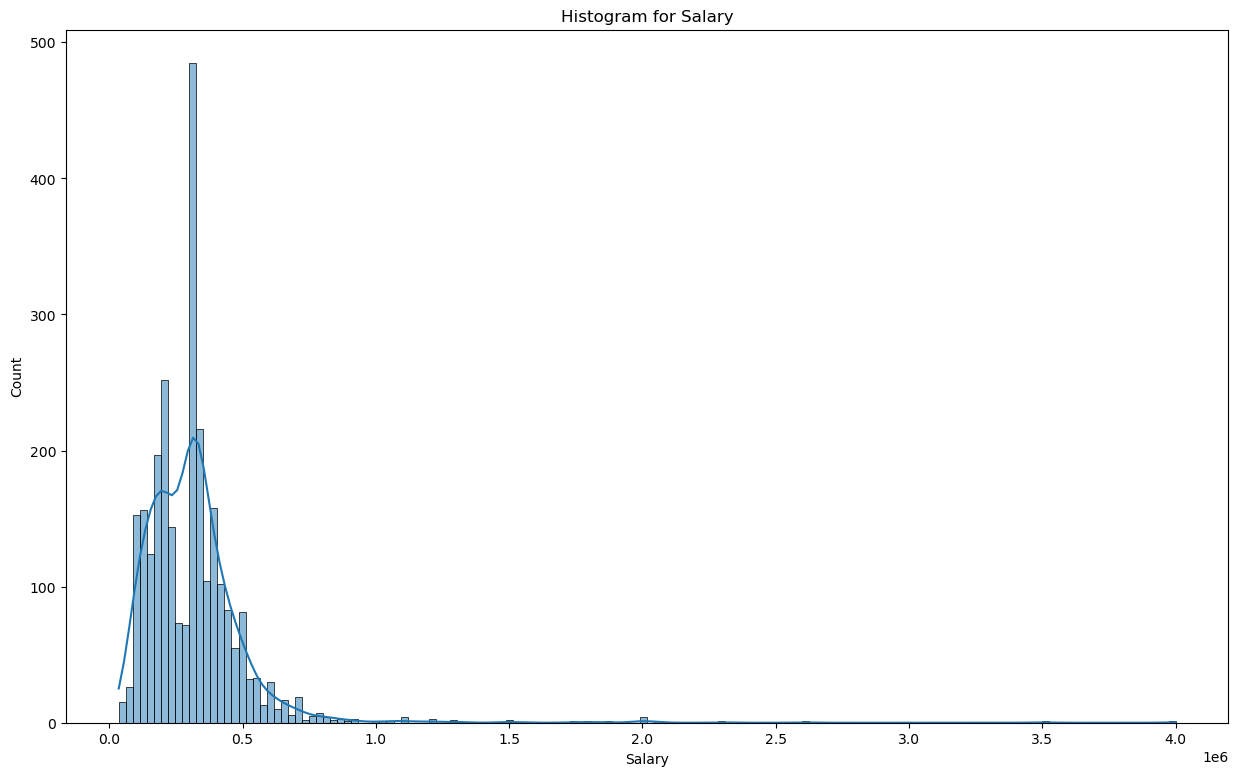

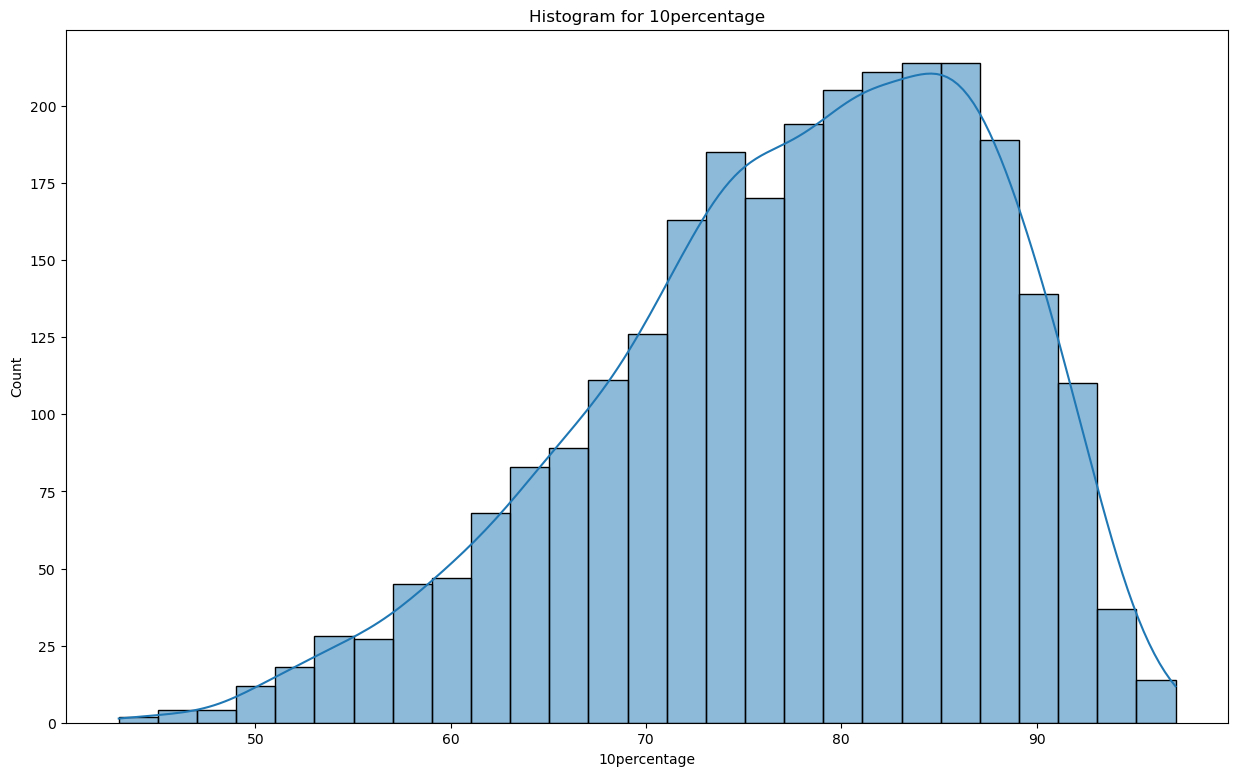

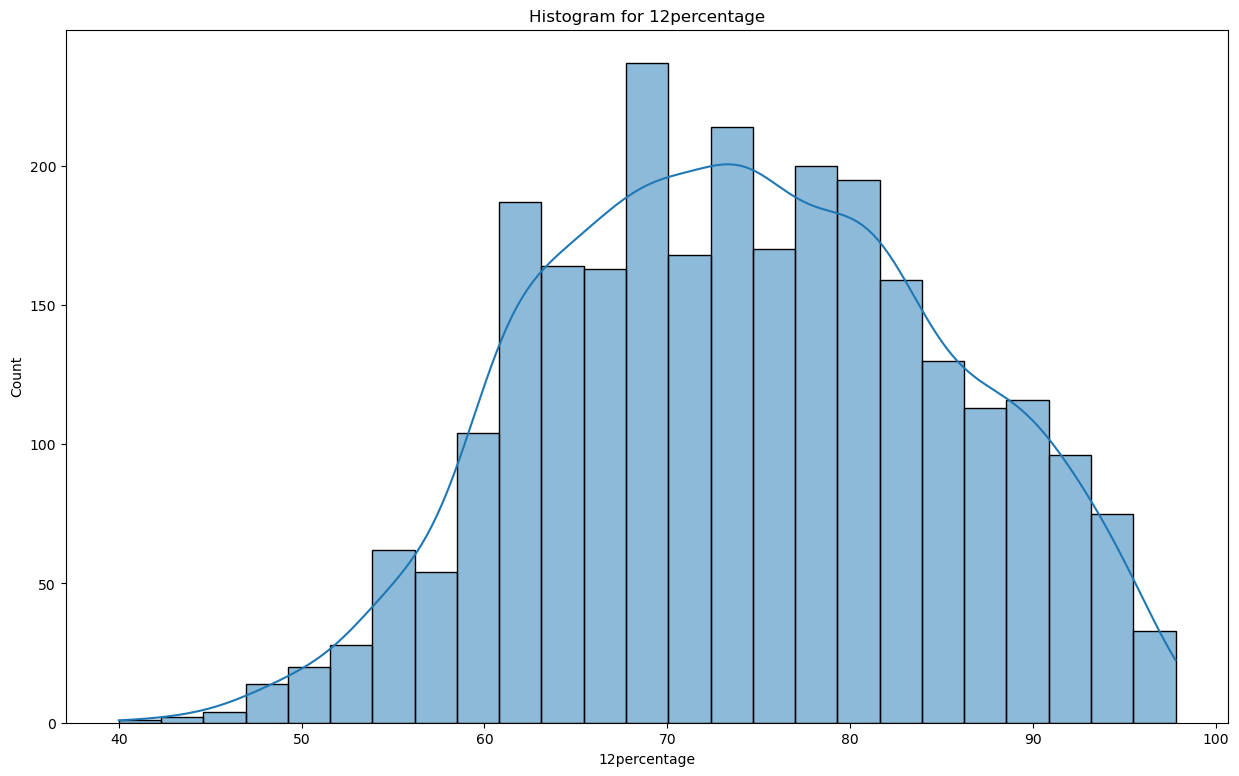

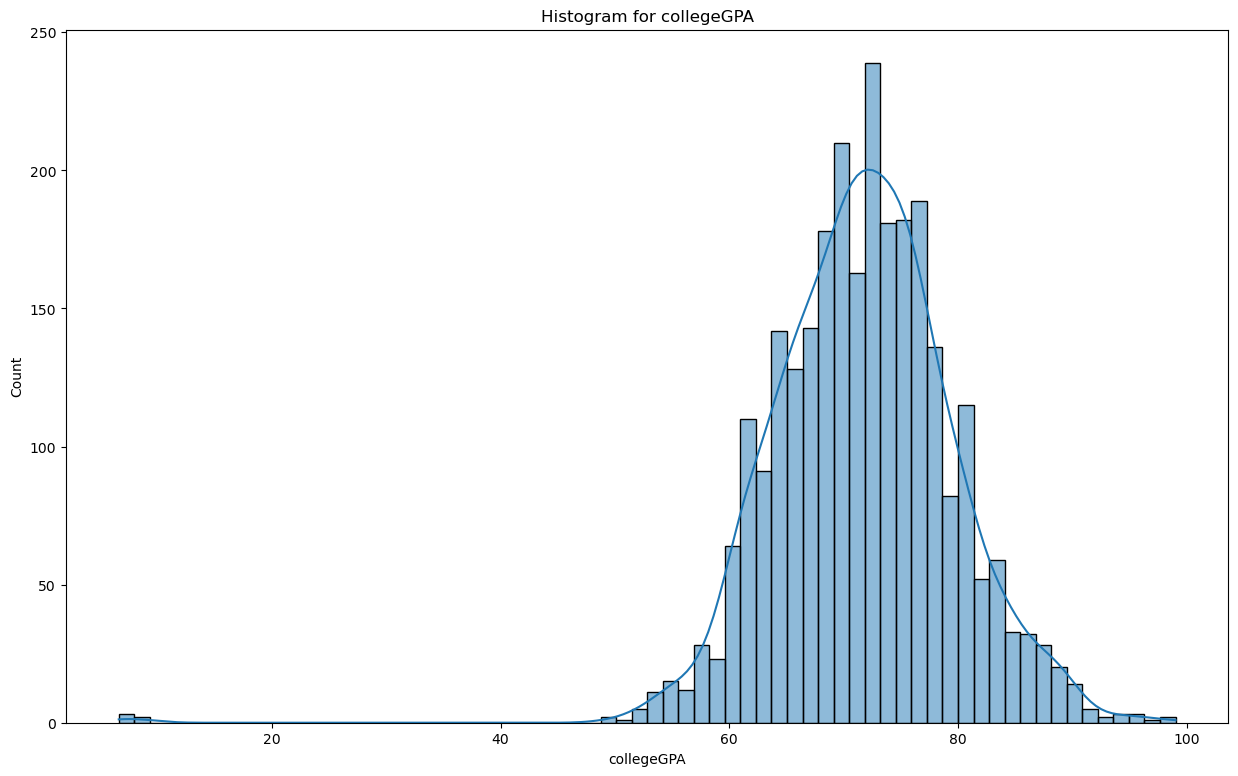

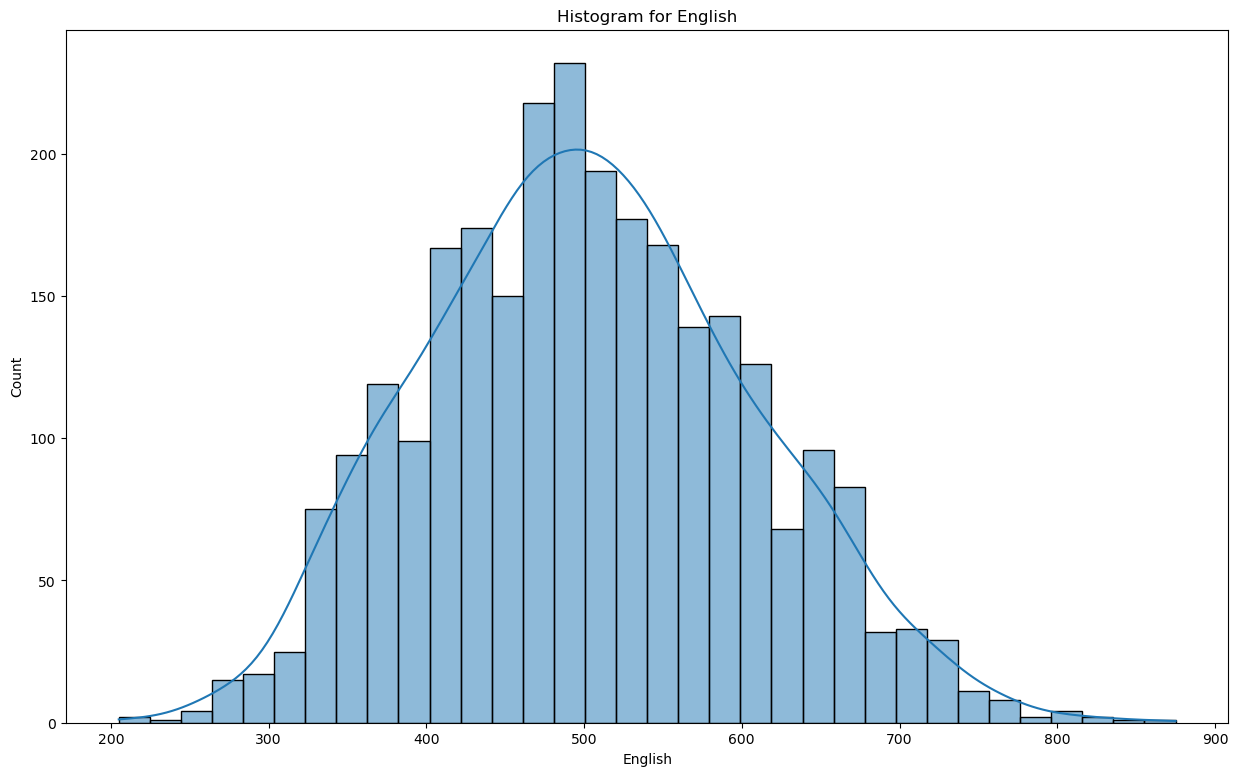

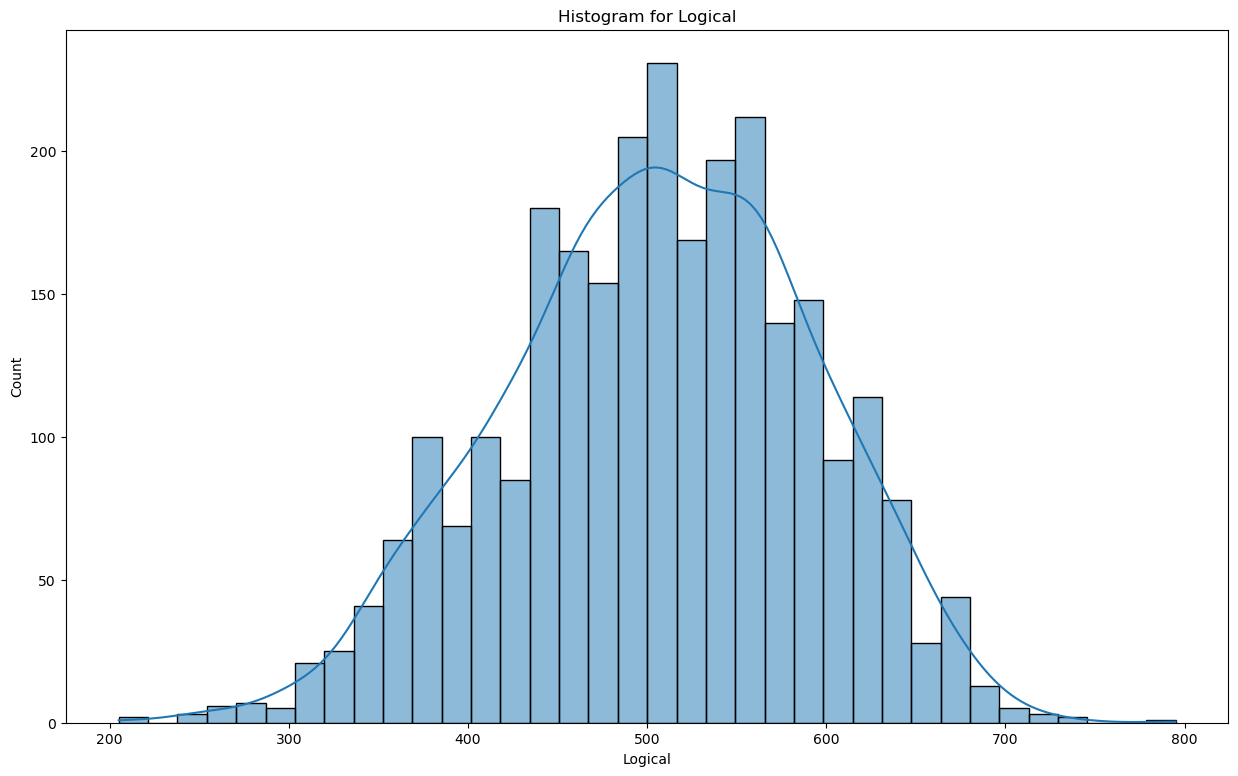

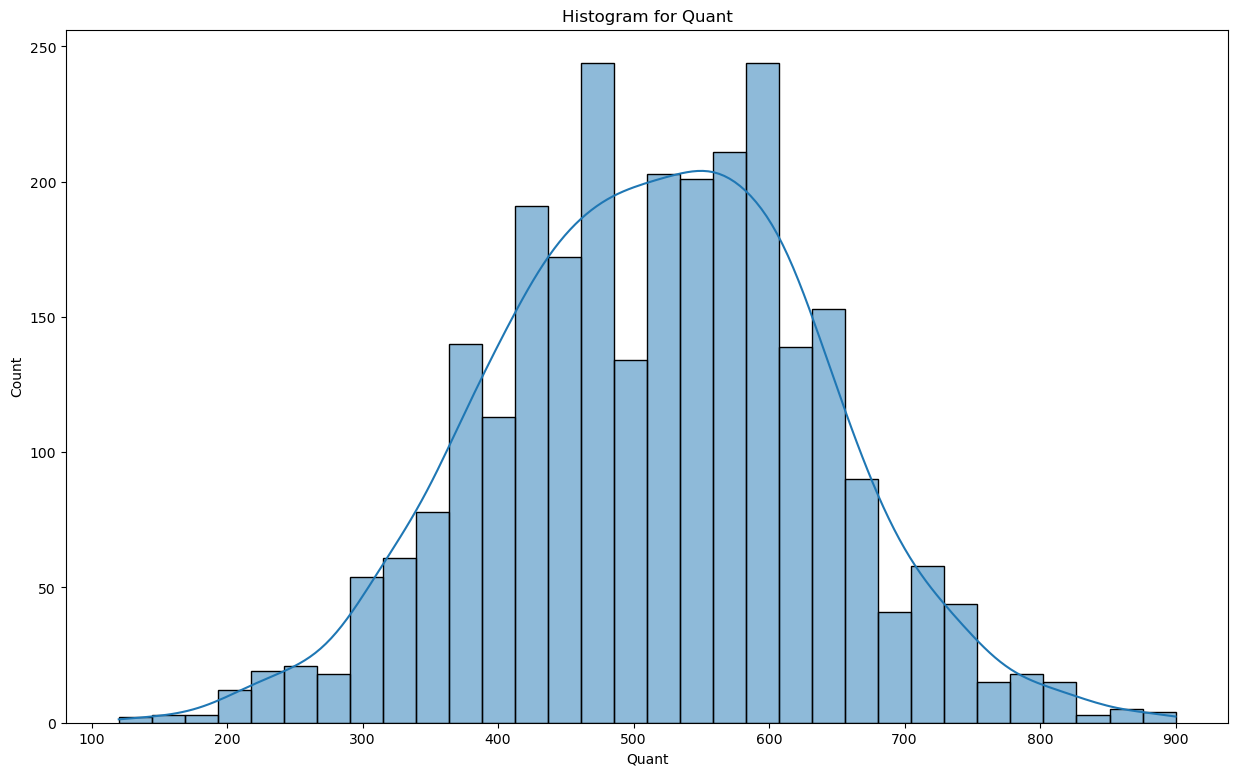

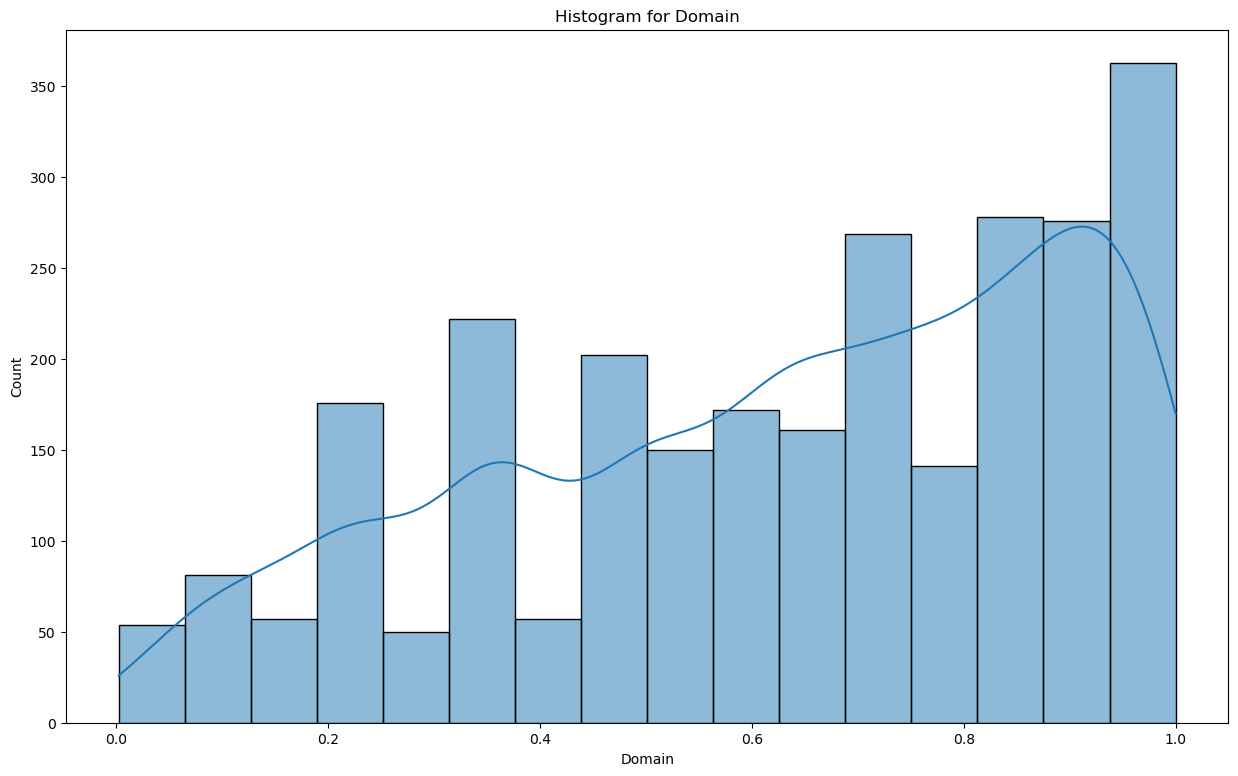

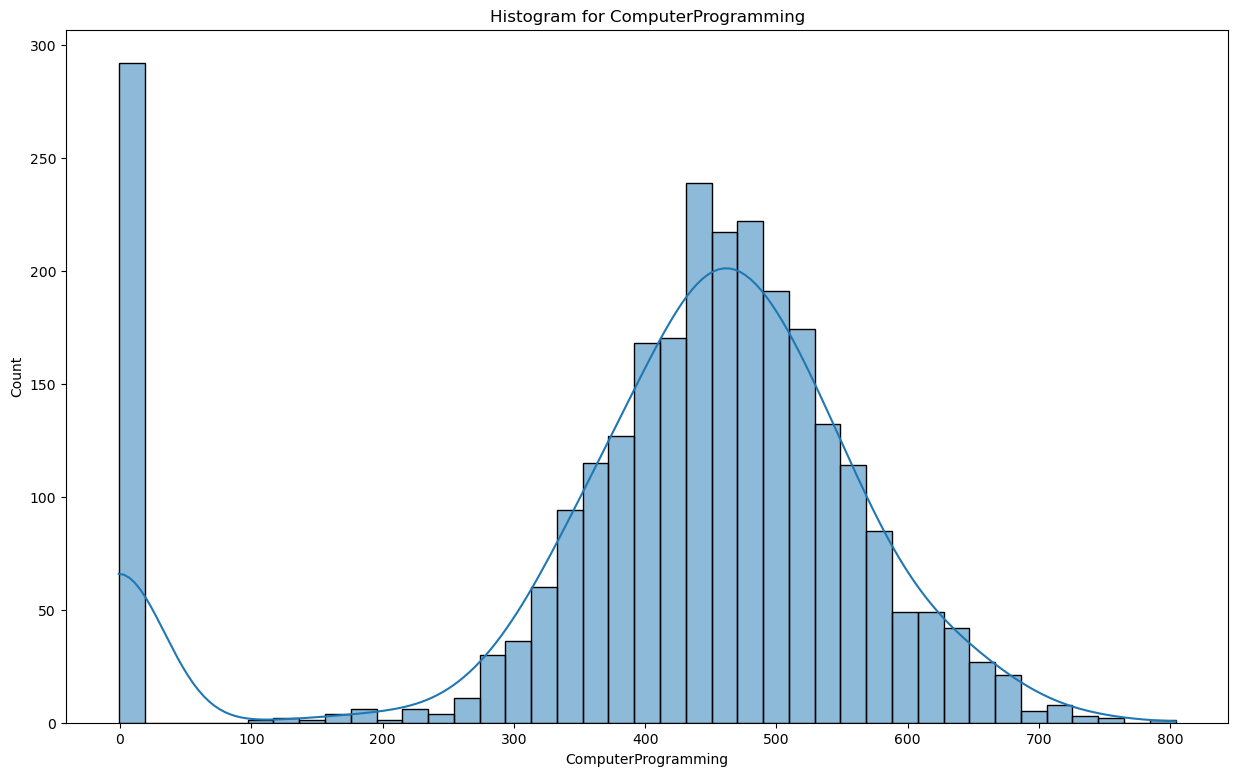

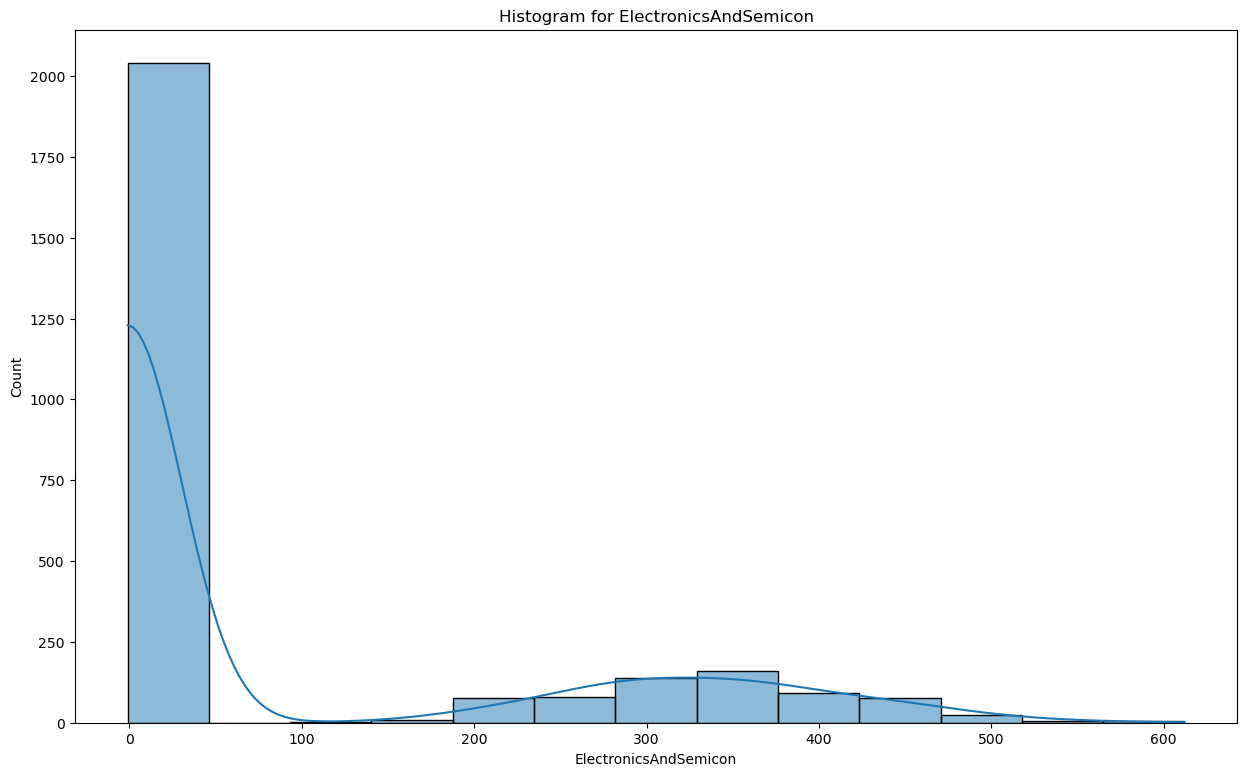

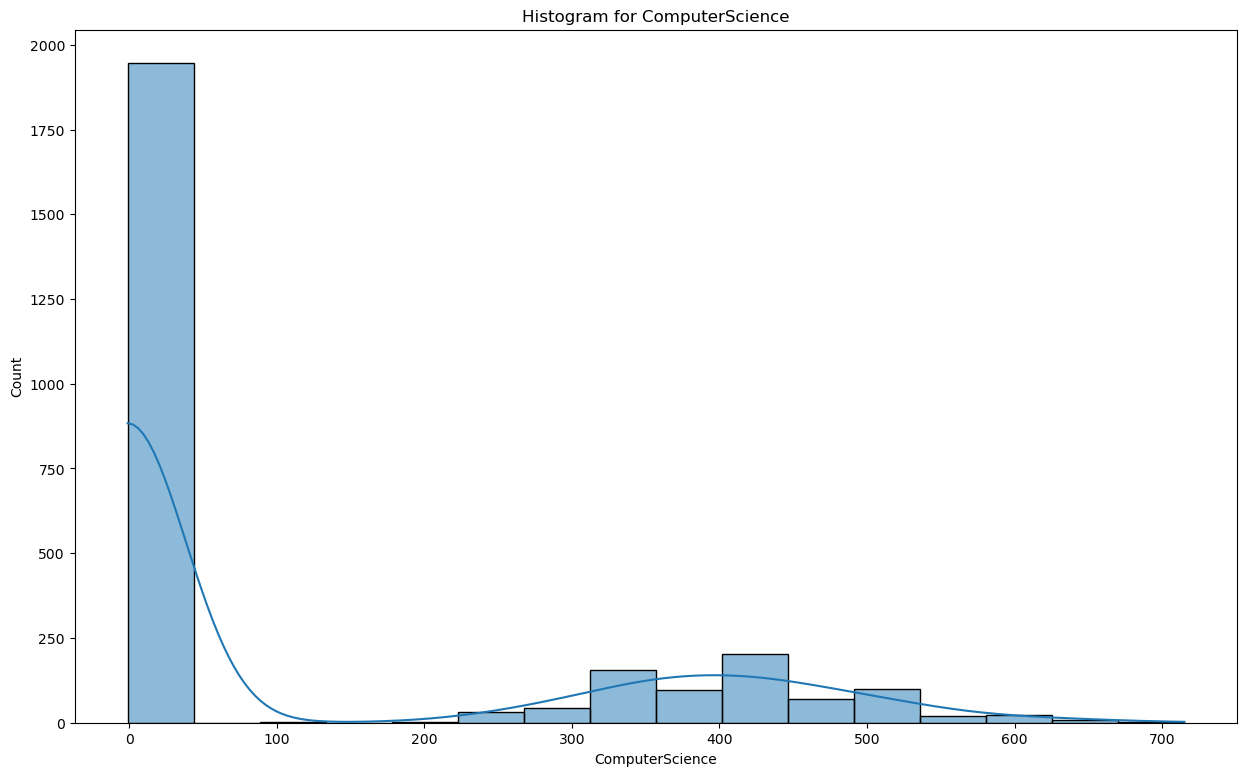

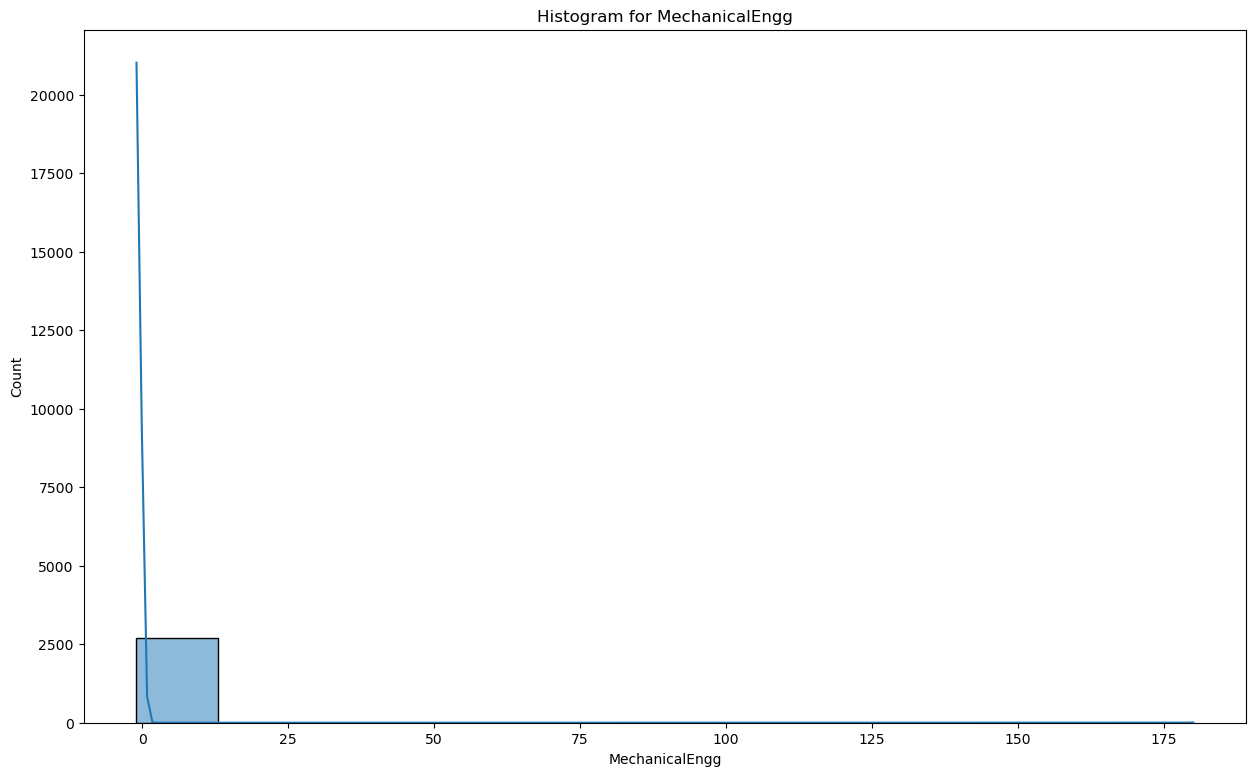

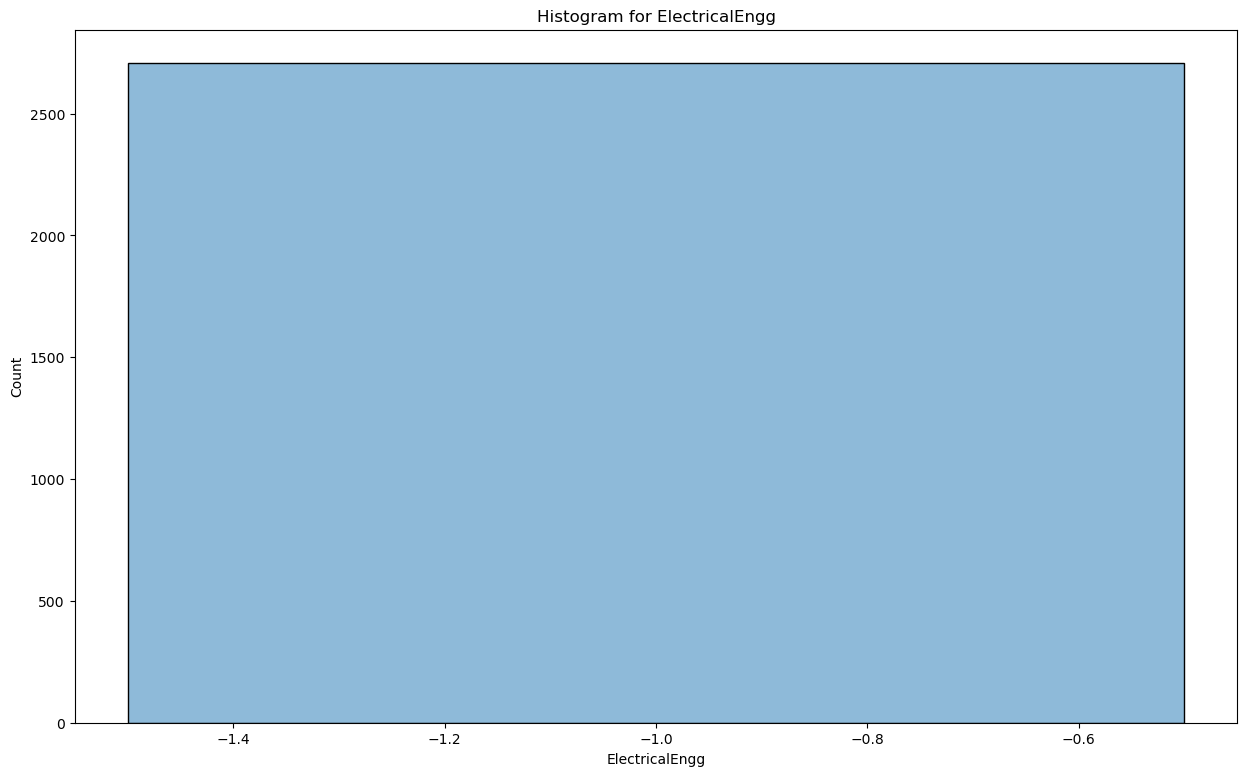

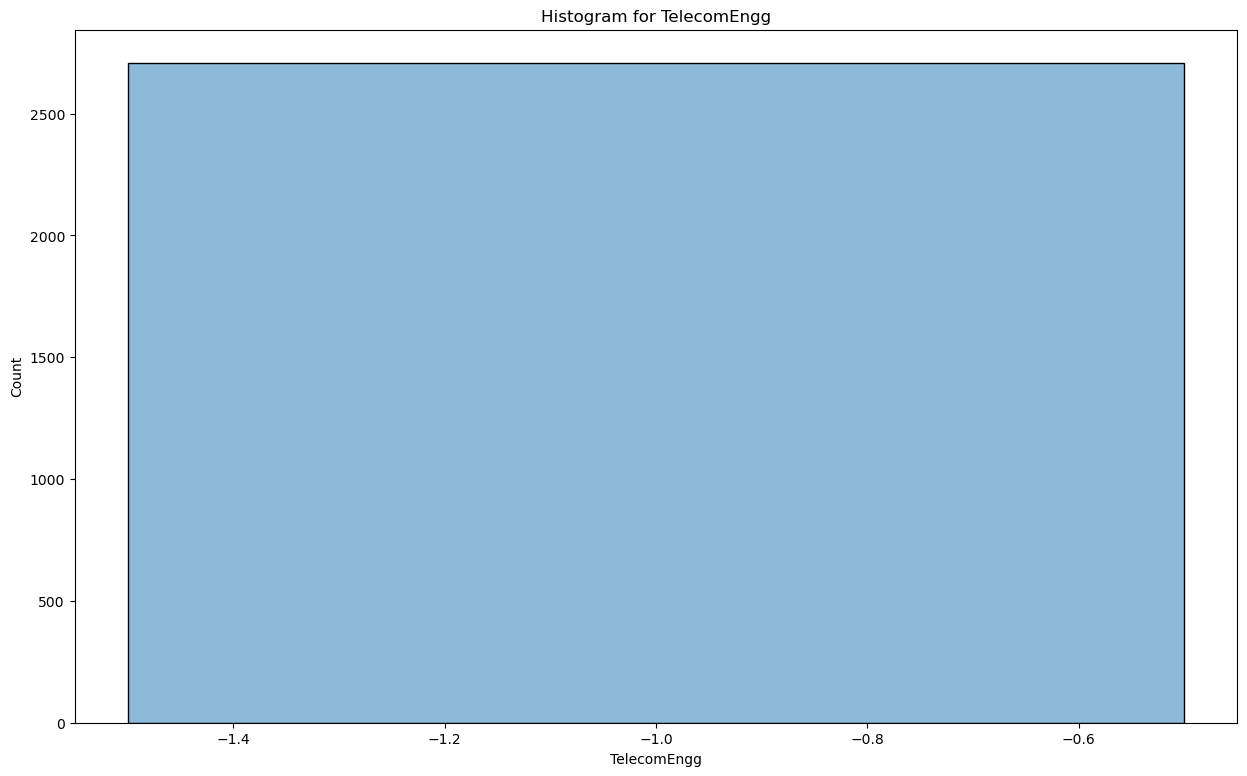

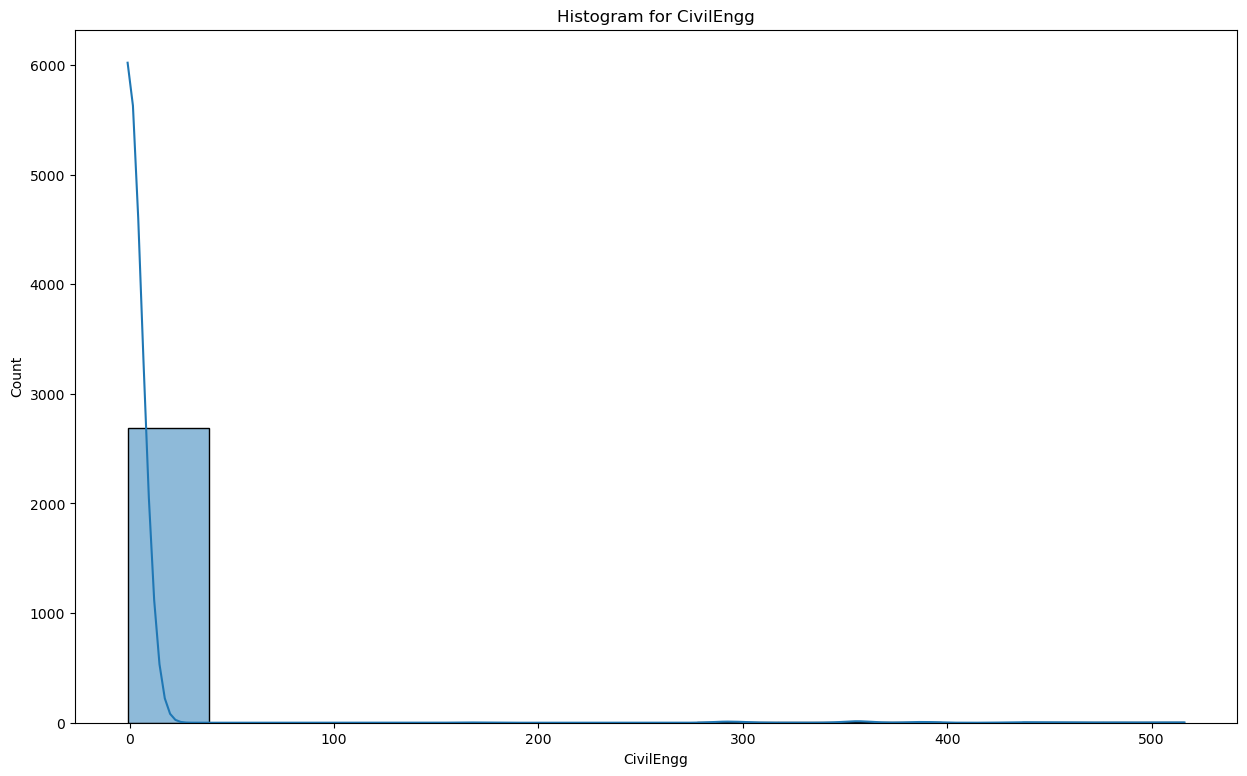

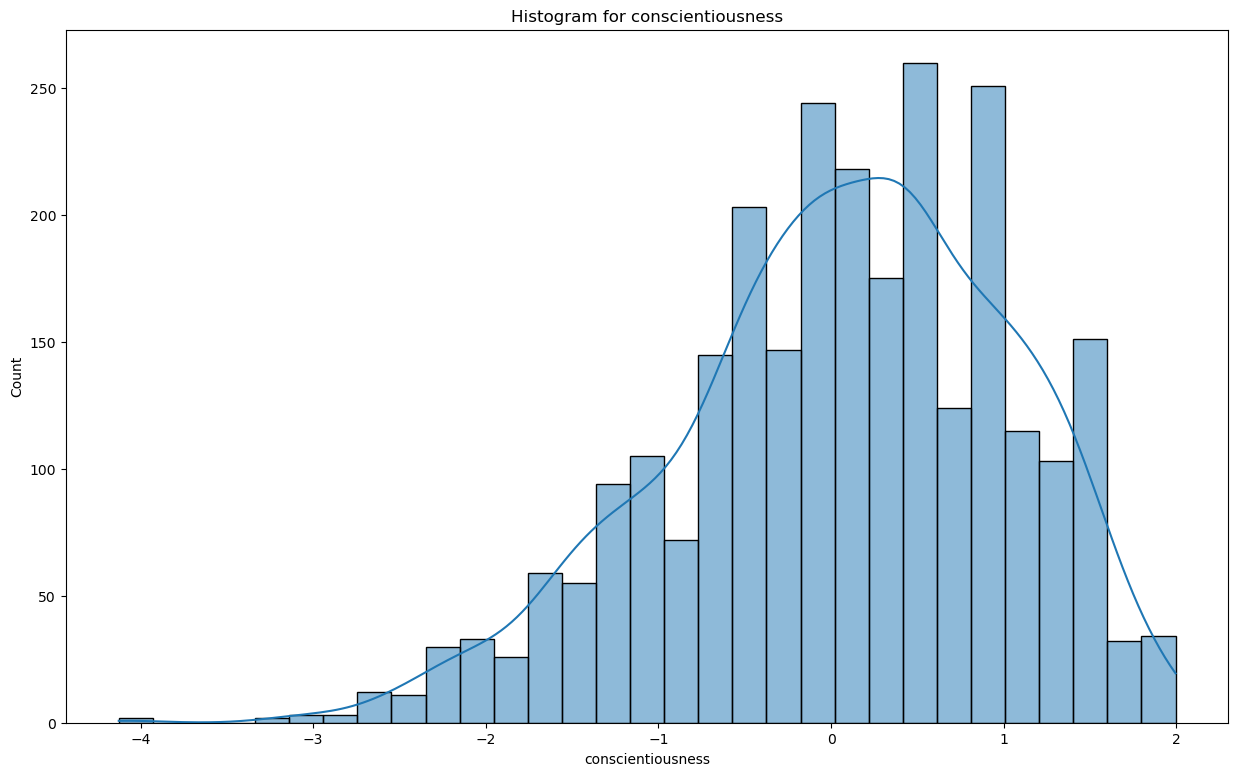

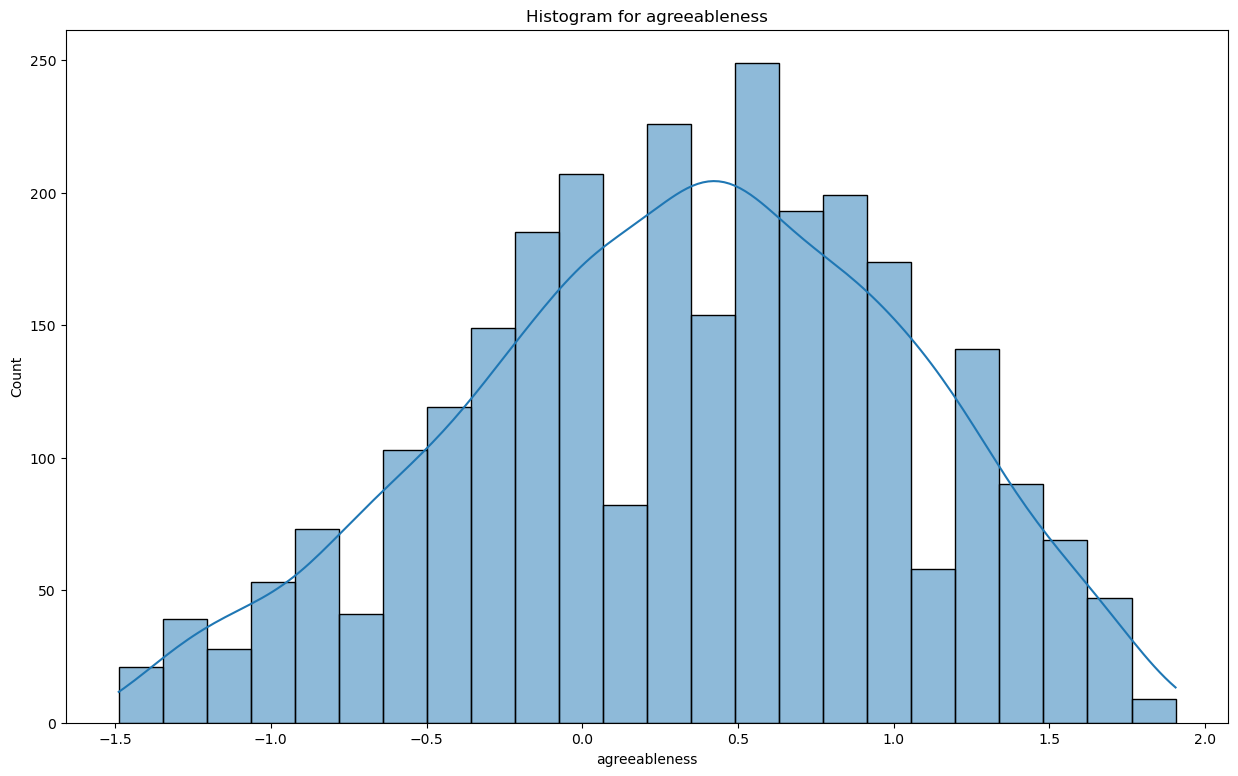

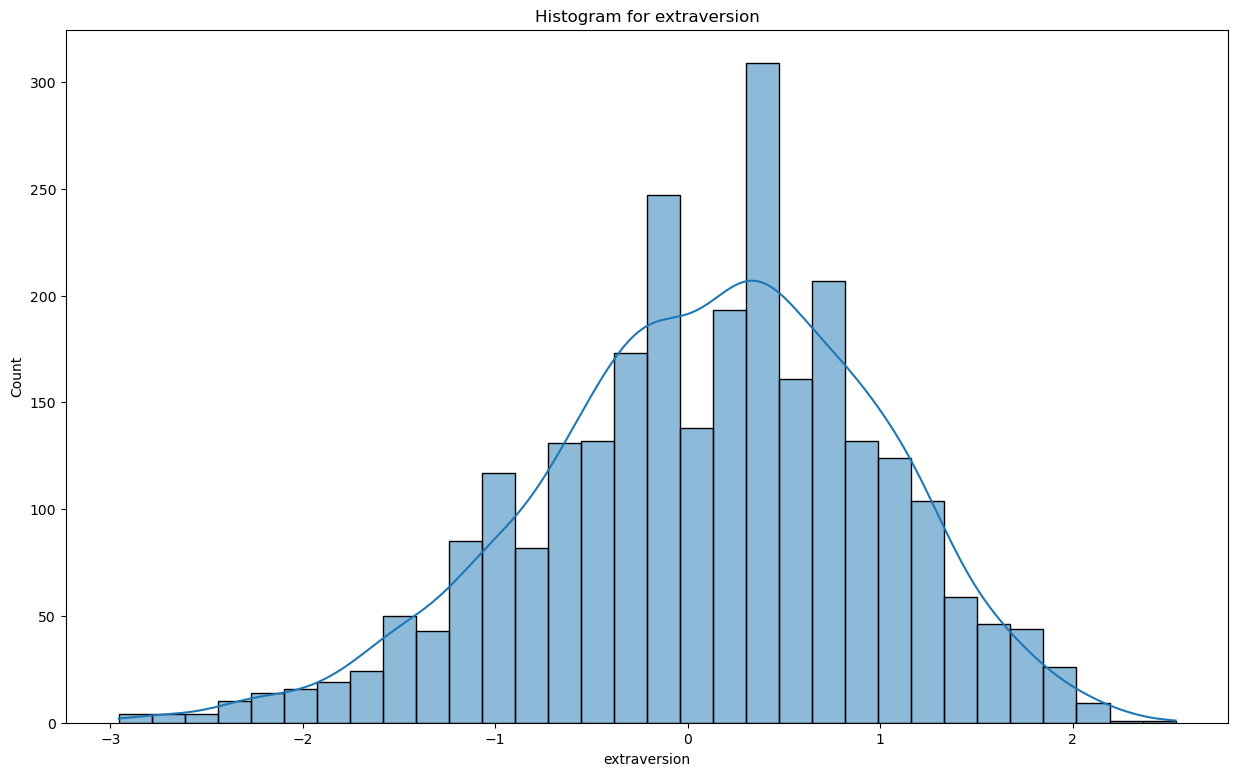

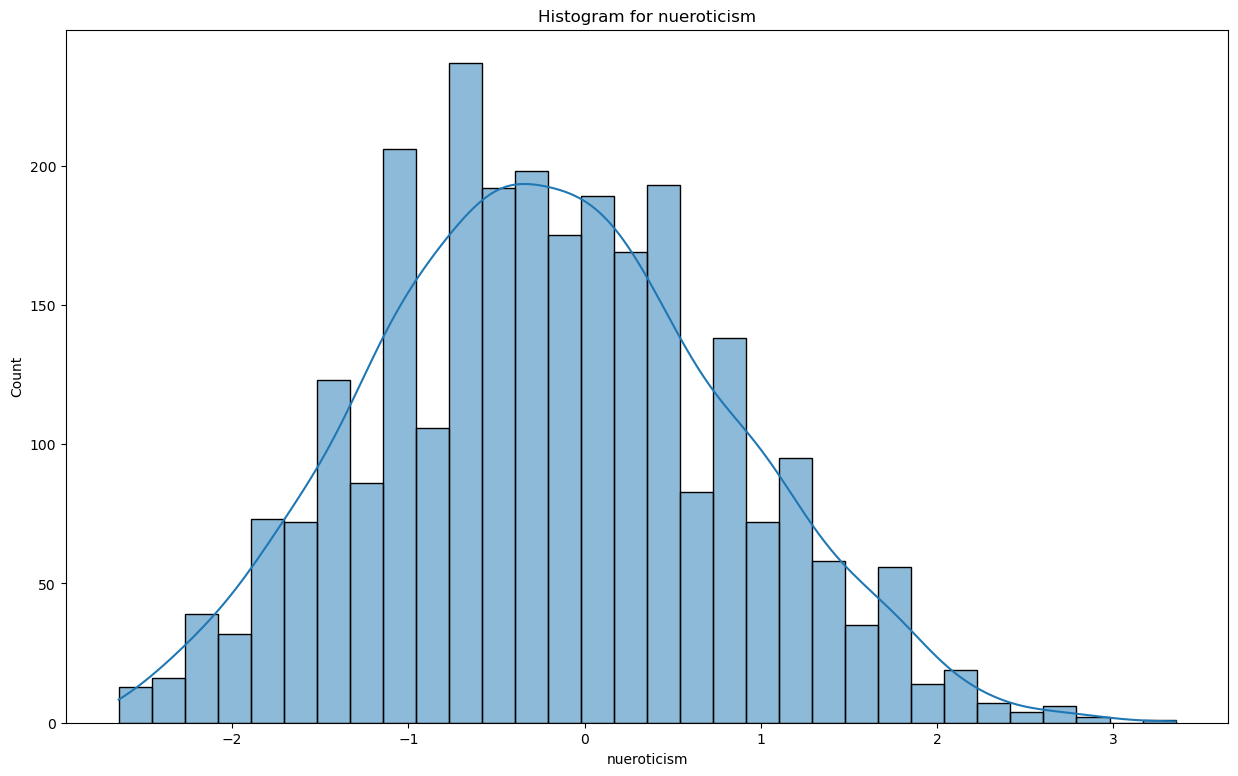

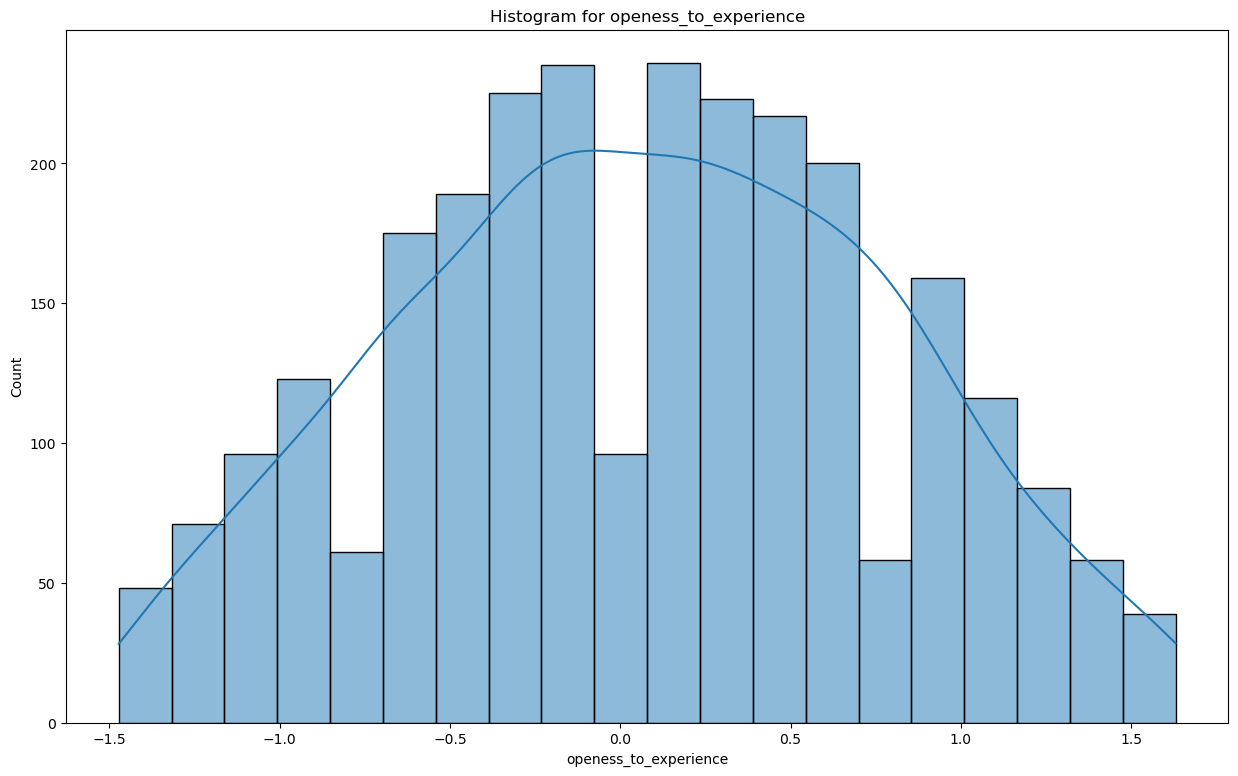

In [36]:
for column in numerical_cols:
    
    plt.figure(figsize=(15,9))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.show()
    

### From these visualisations
* Most of the salaries are between 100000 and 1000000.
* Most of the persons have around 90%. (left skewed distribution)
* Most number of persons are graduate 12th in between 2007 and 2010
* The histogram plot of 12percentage is slightly leftskewed (very slight). Most of the person have 70% on their 12th.
* Most of the students are from tier 2 colleges.
* Most of the students 70-80 CGPA on their college and they graduated in around 2000s.


## Categorical Variables

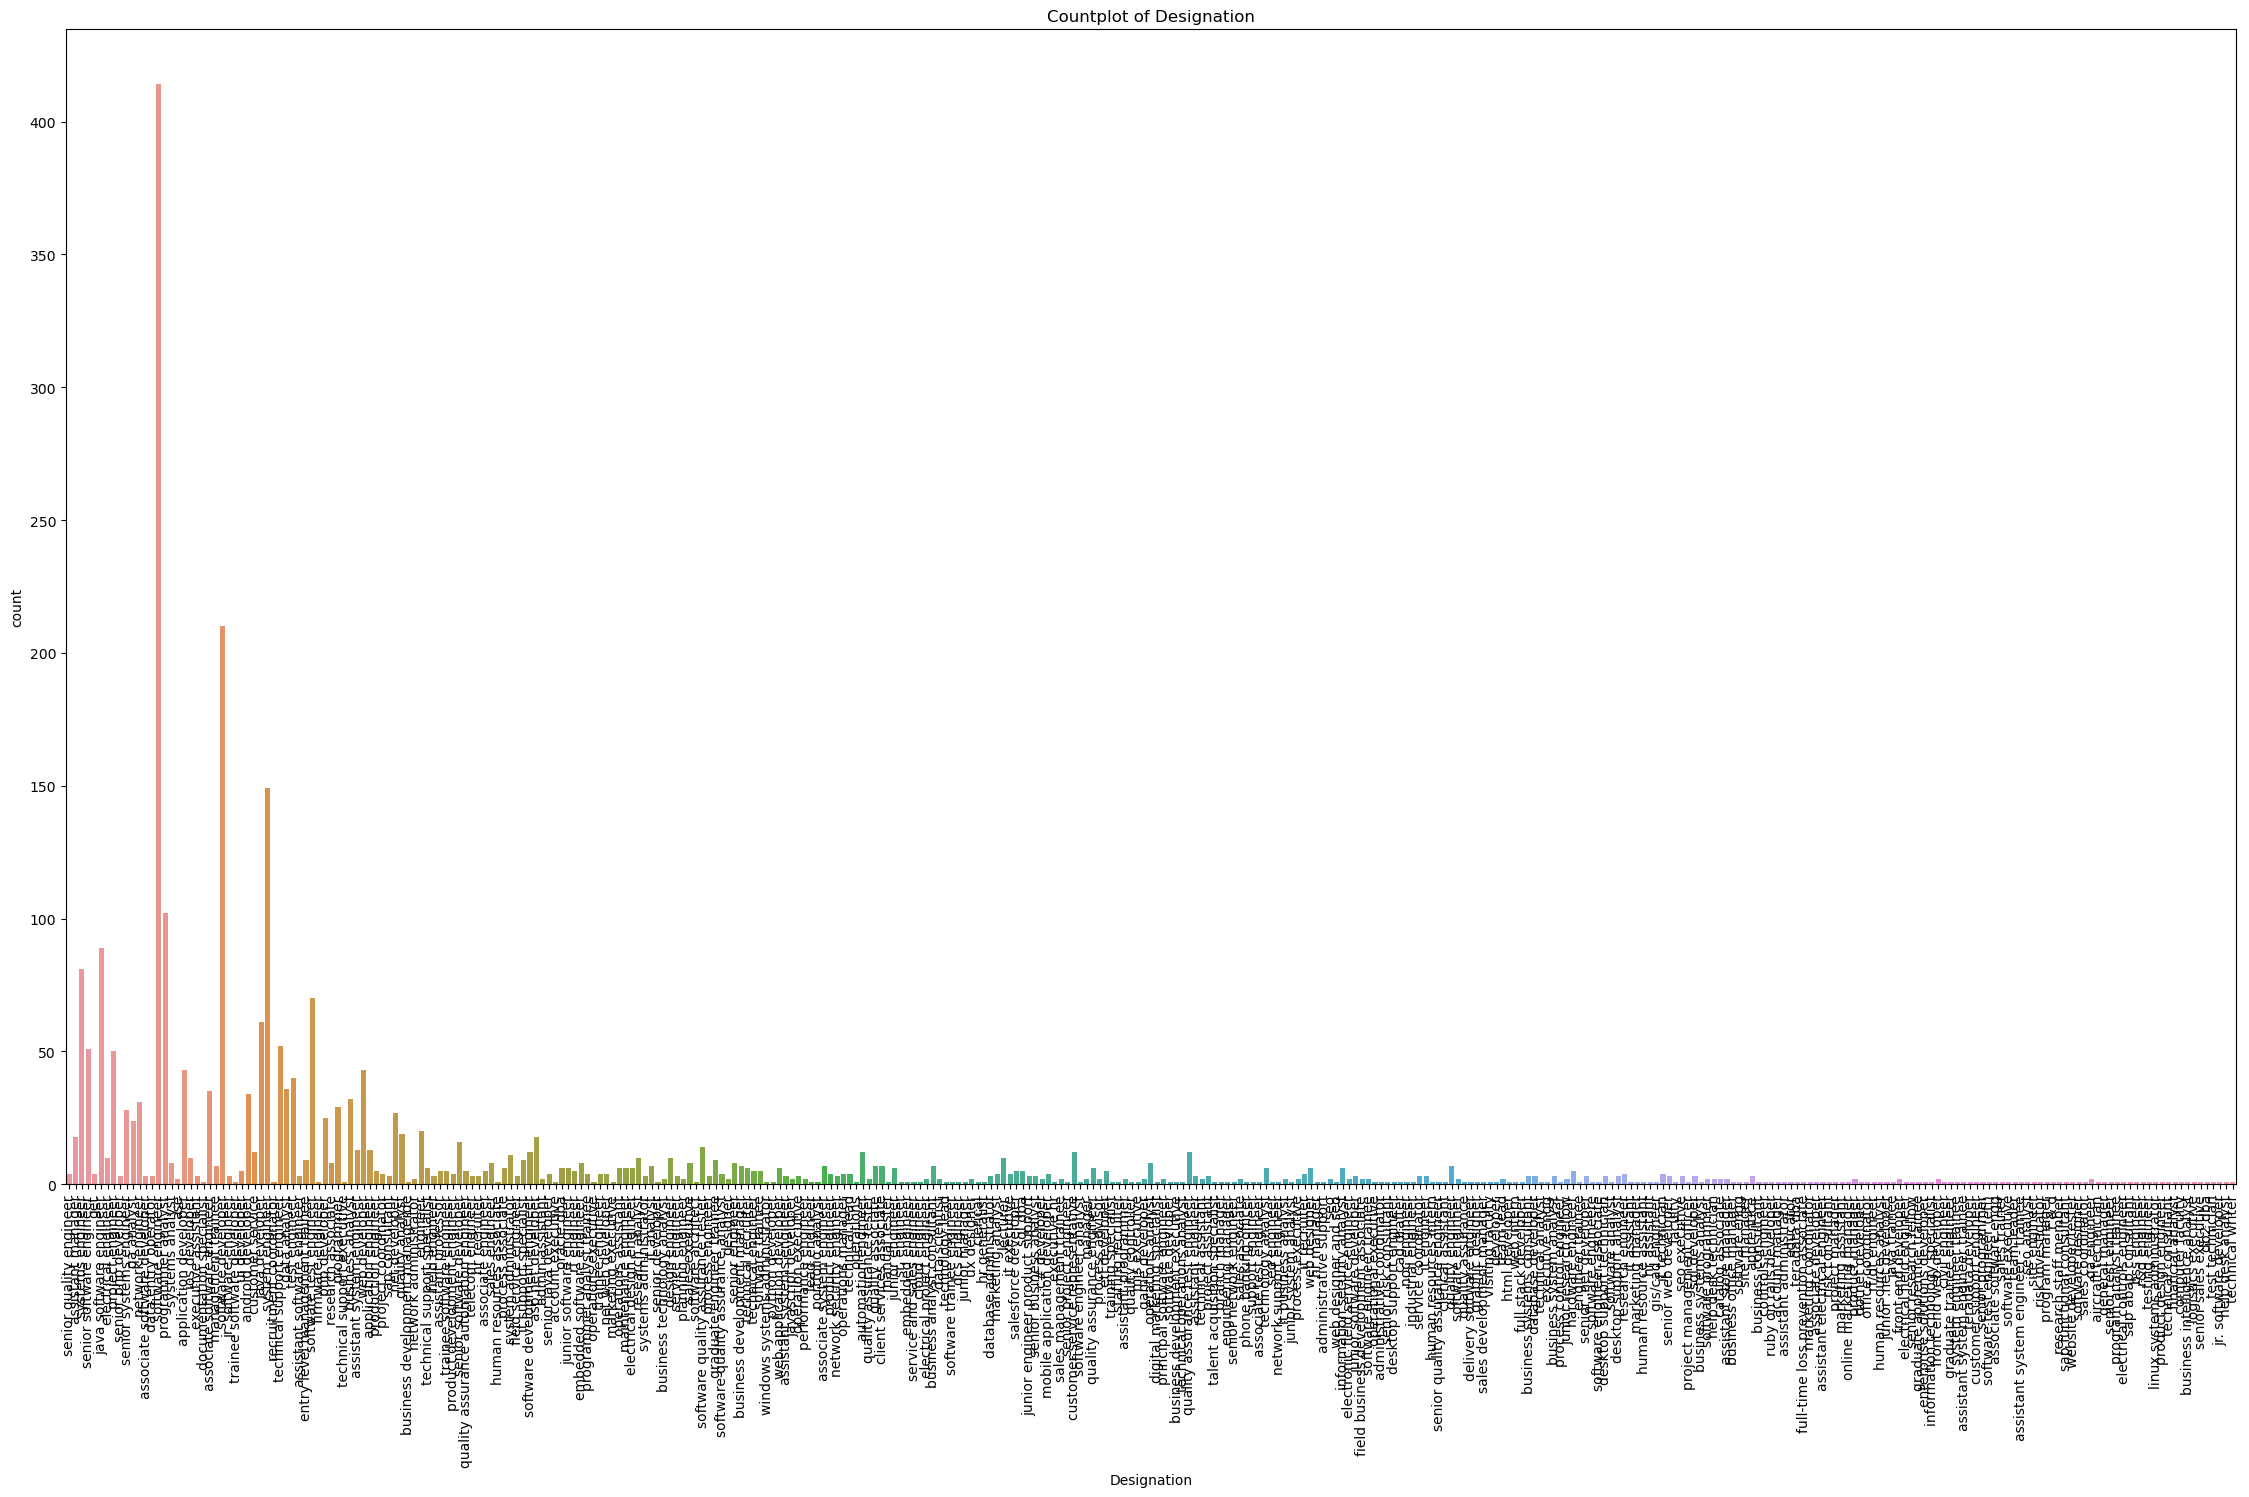

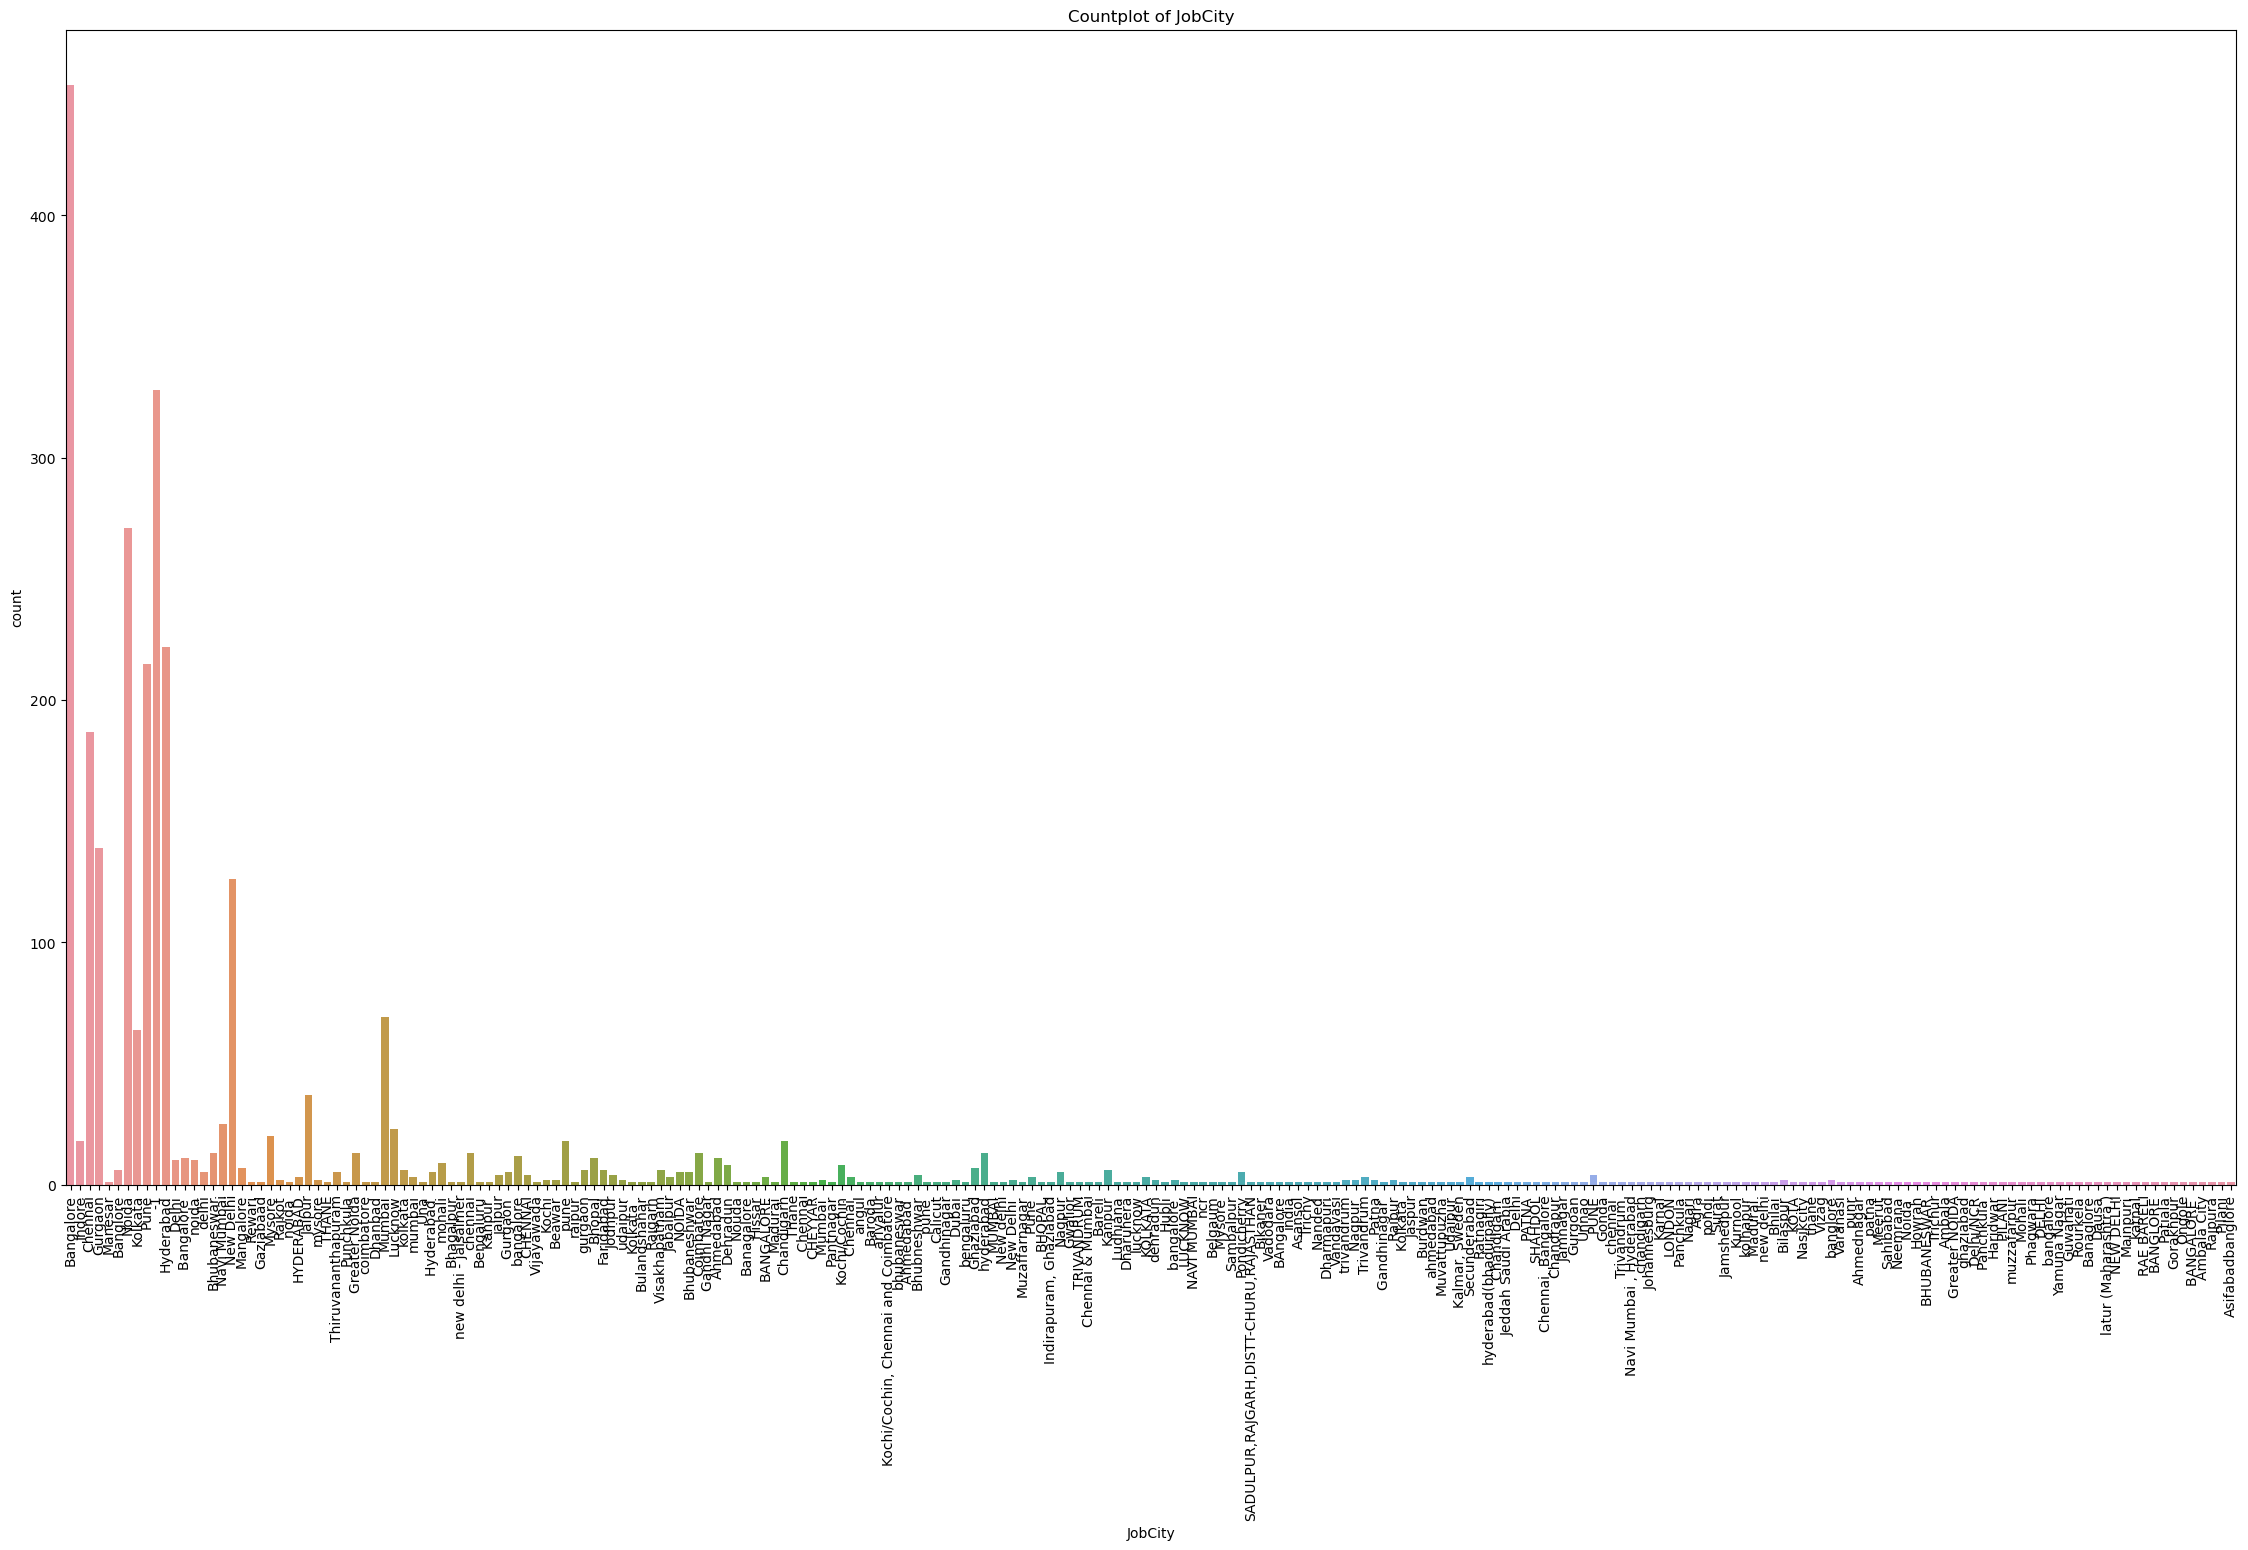

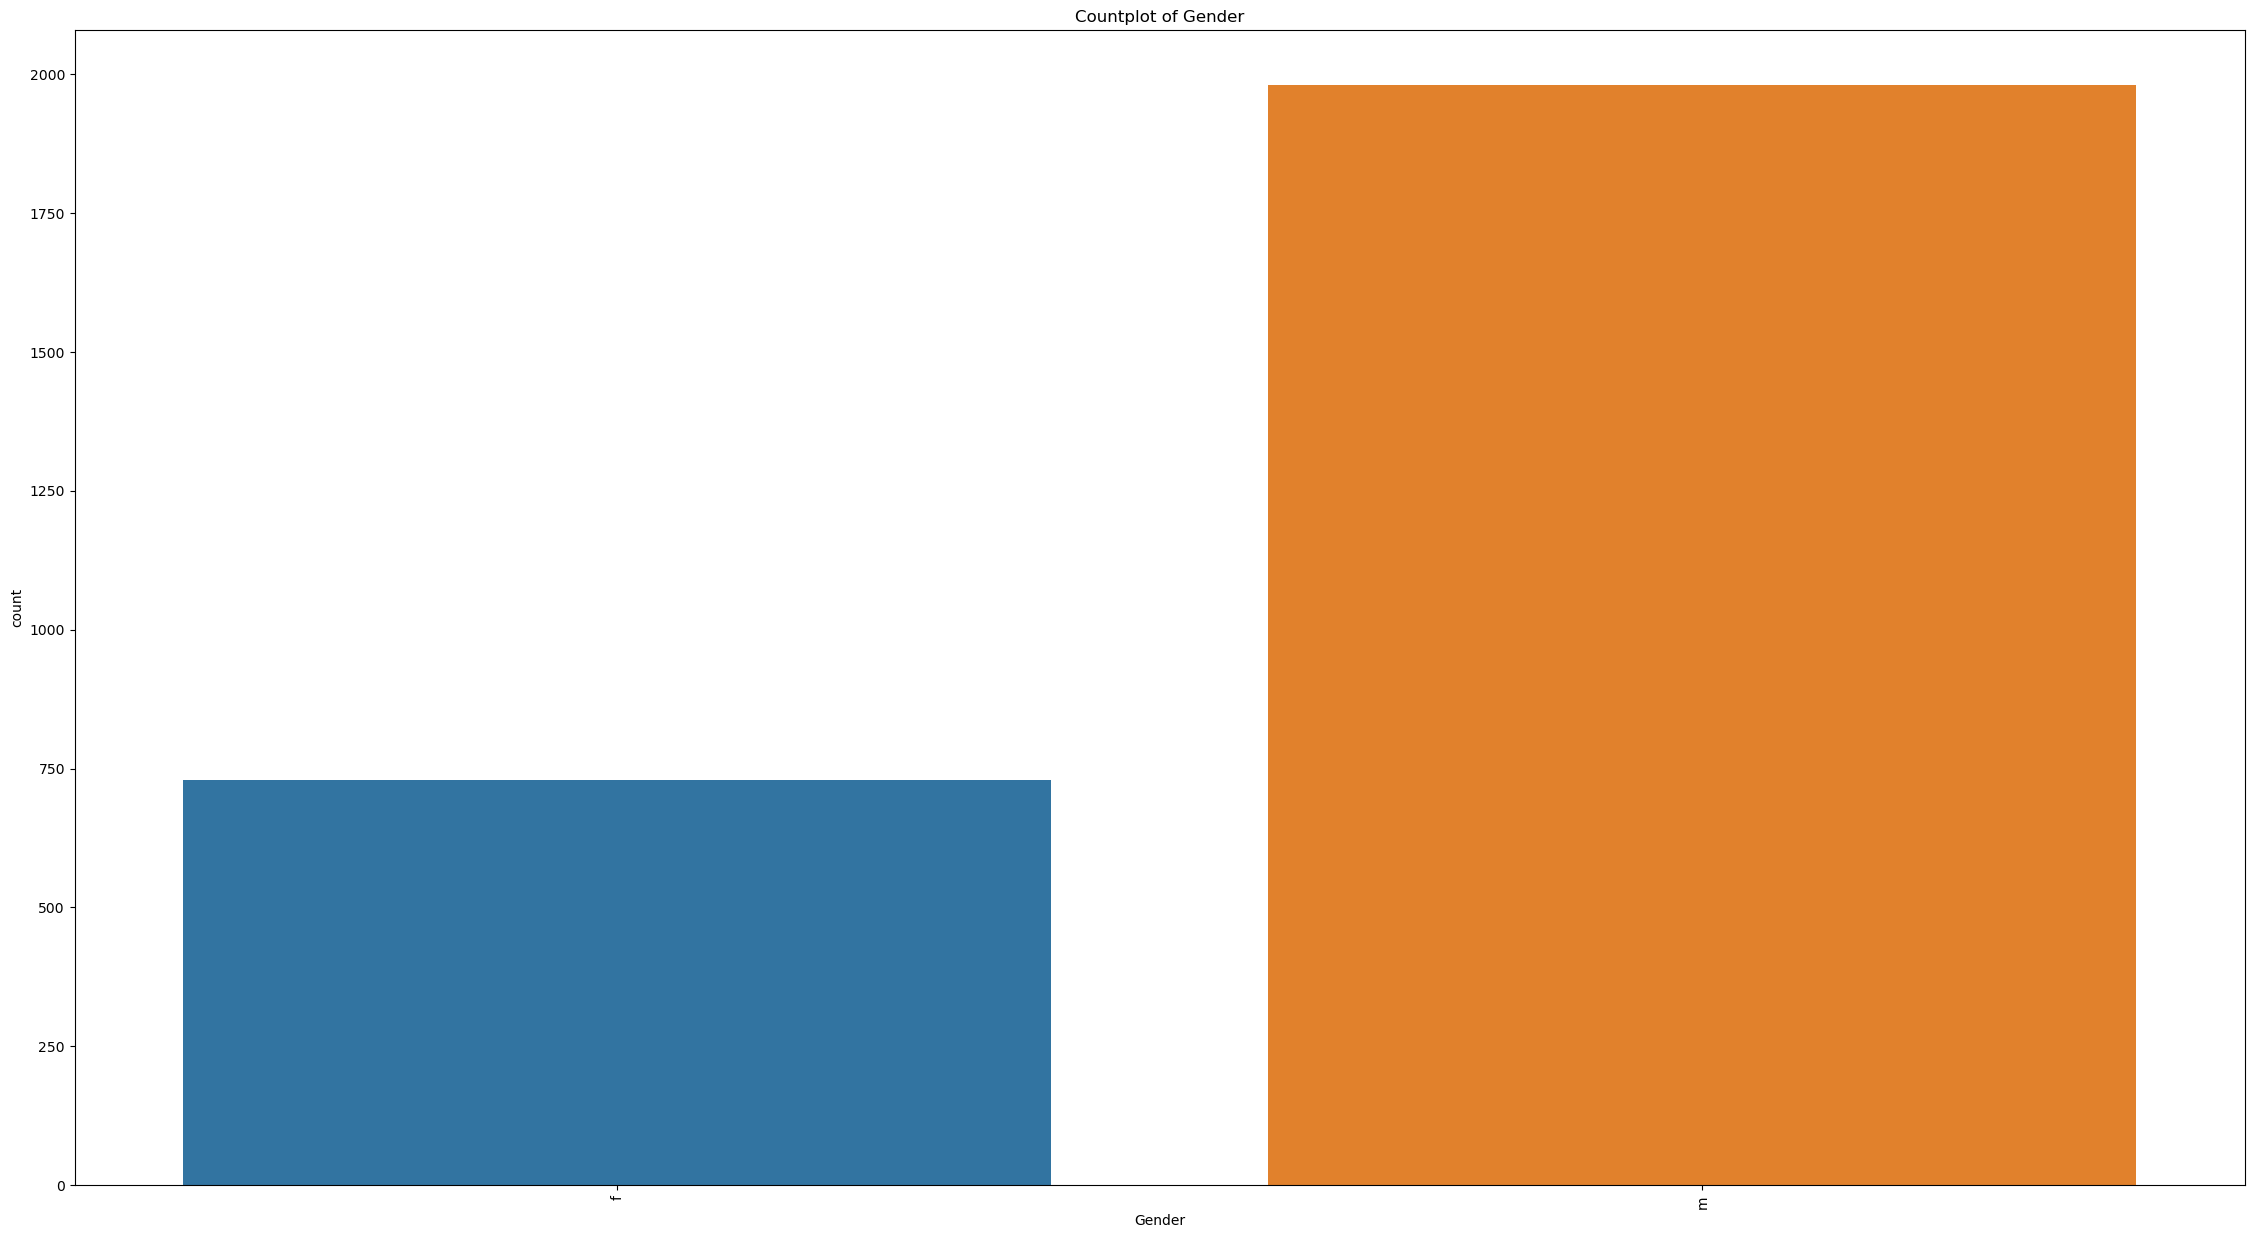

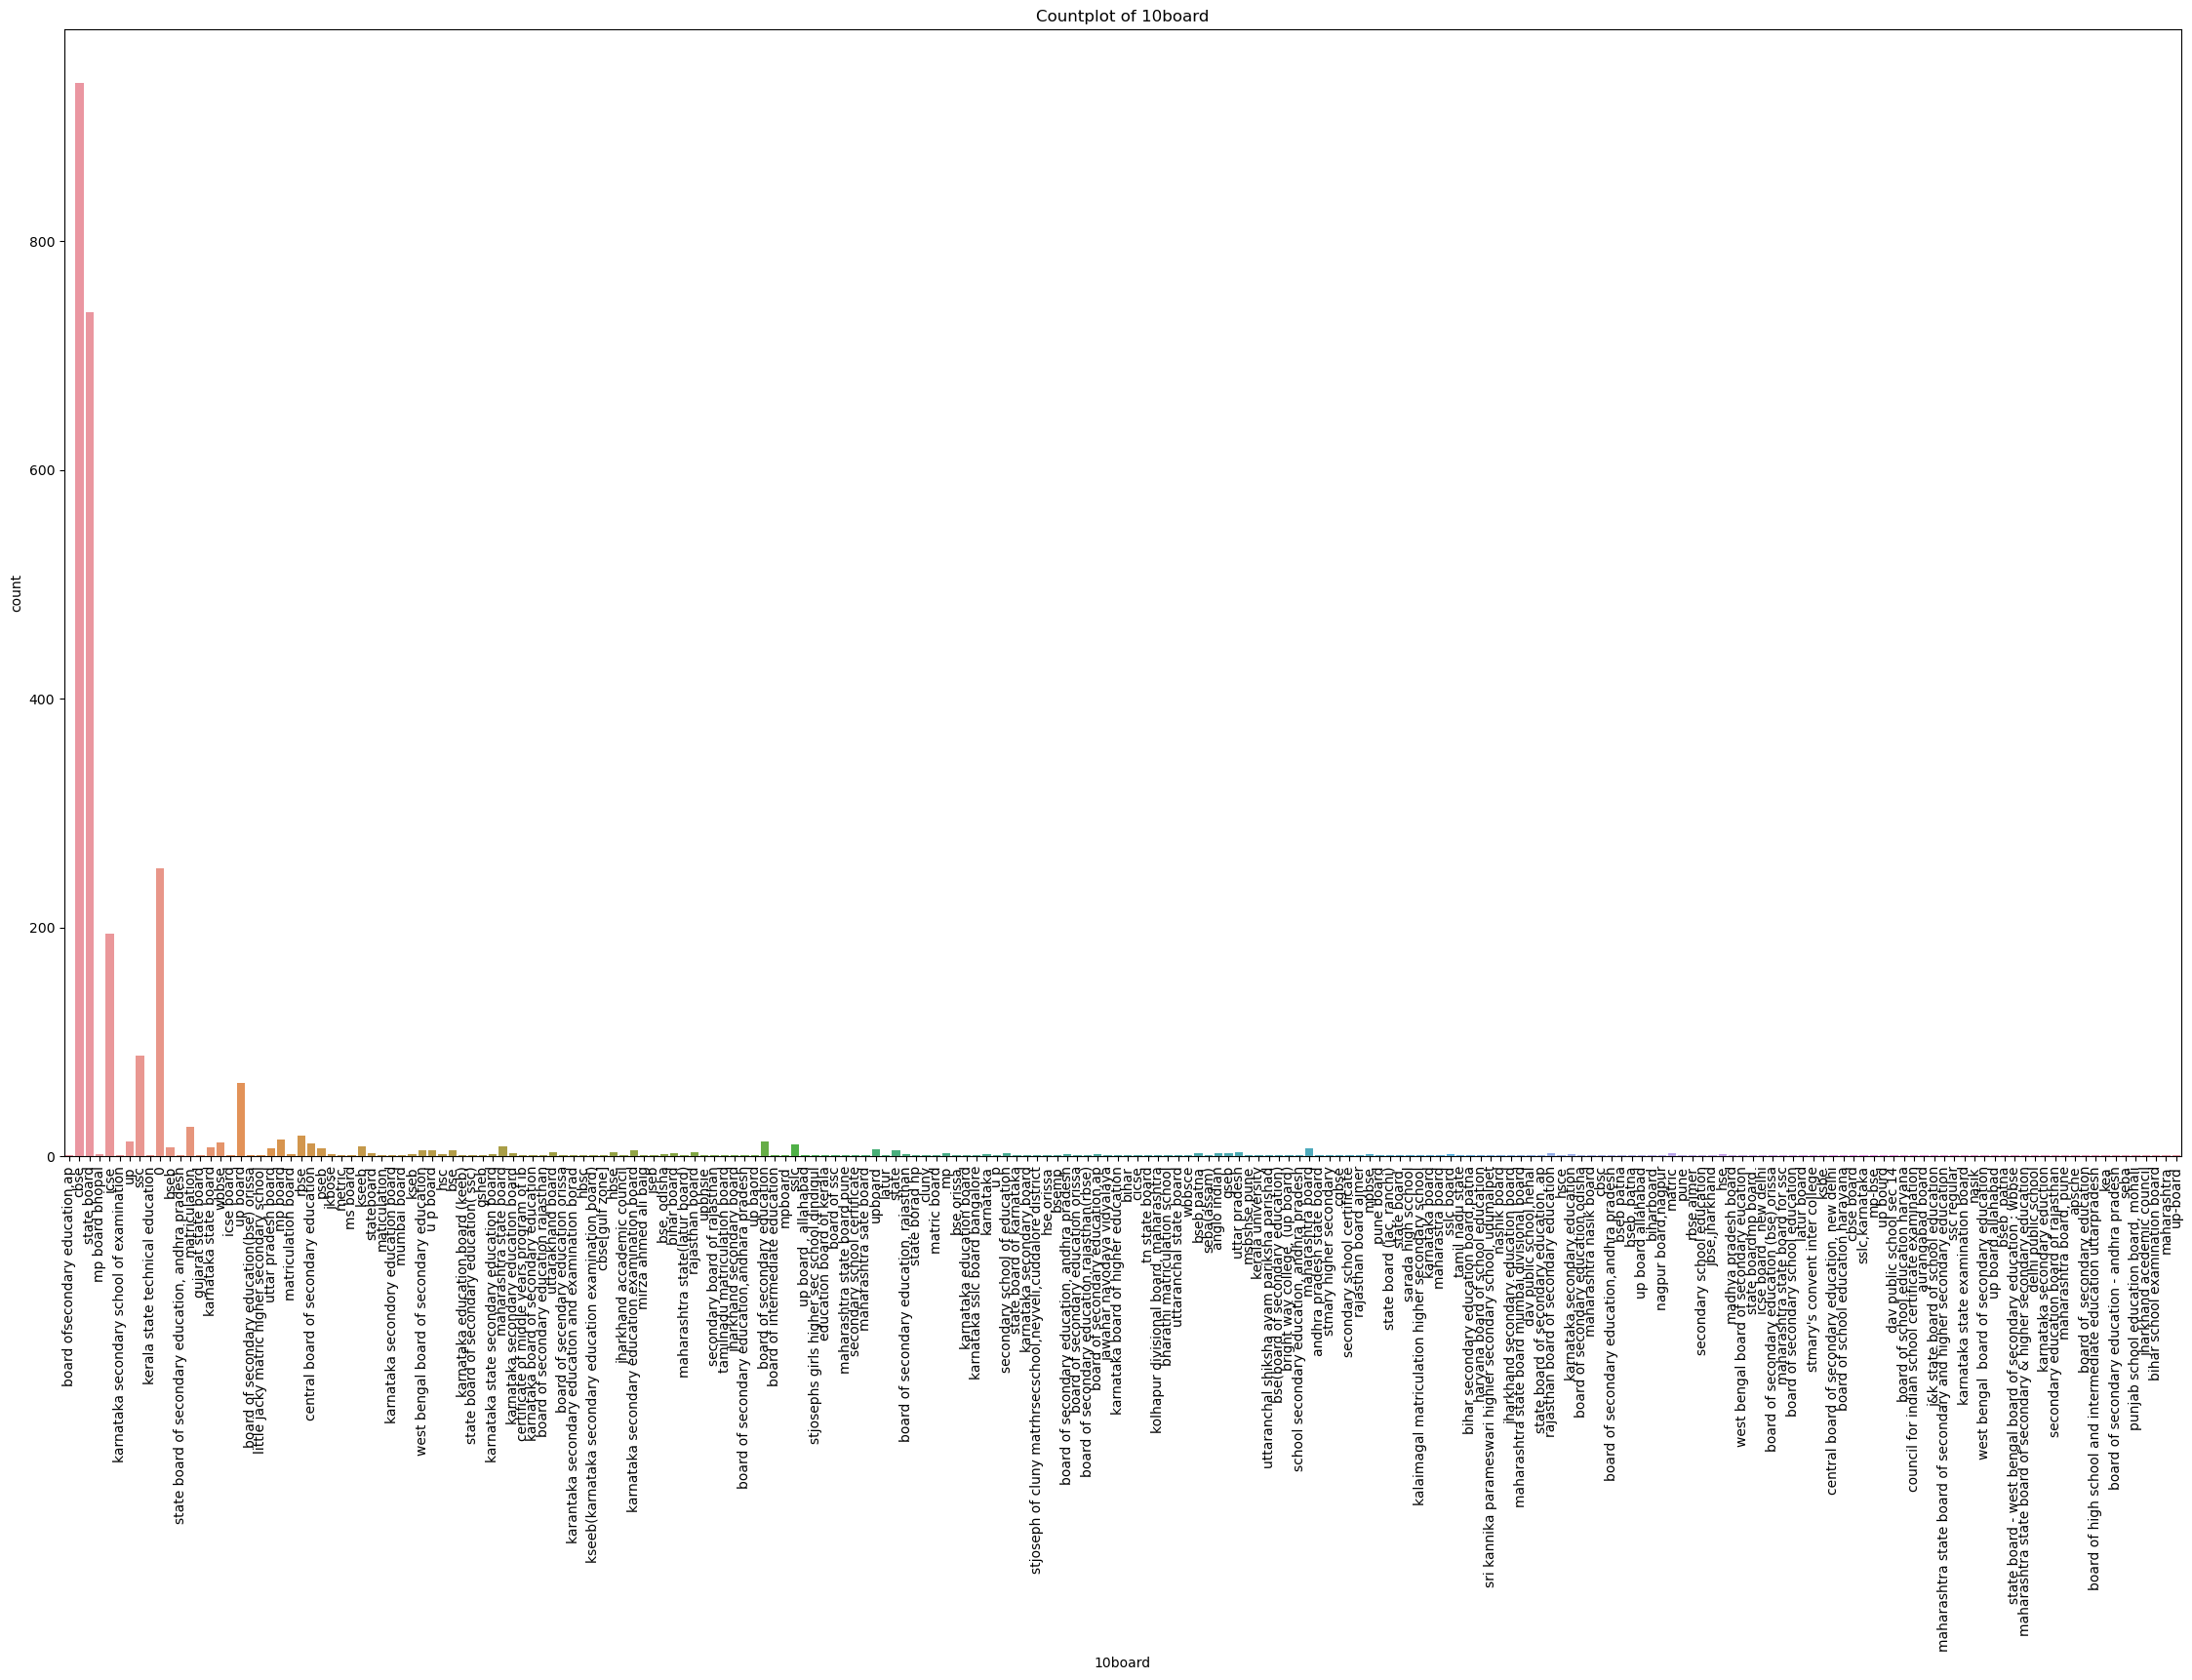

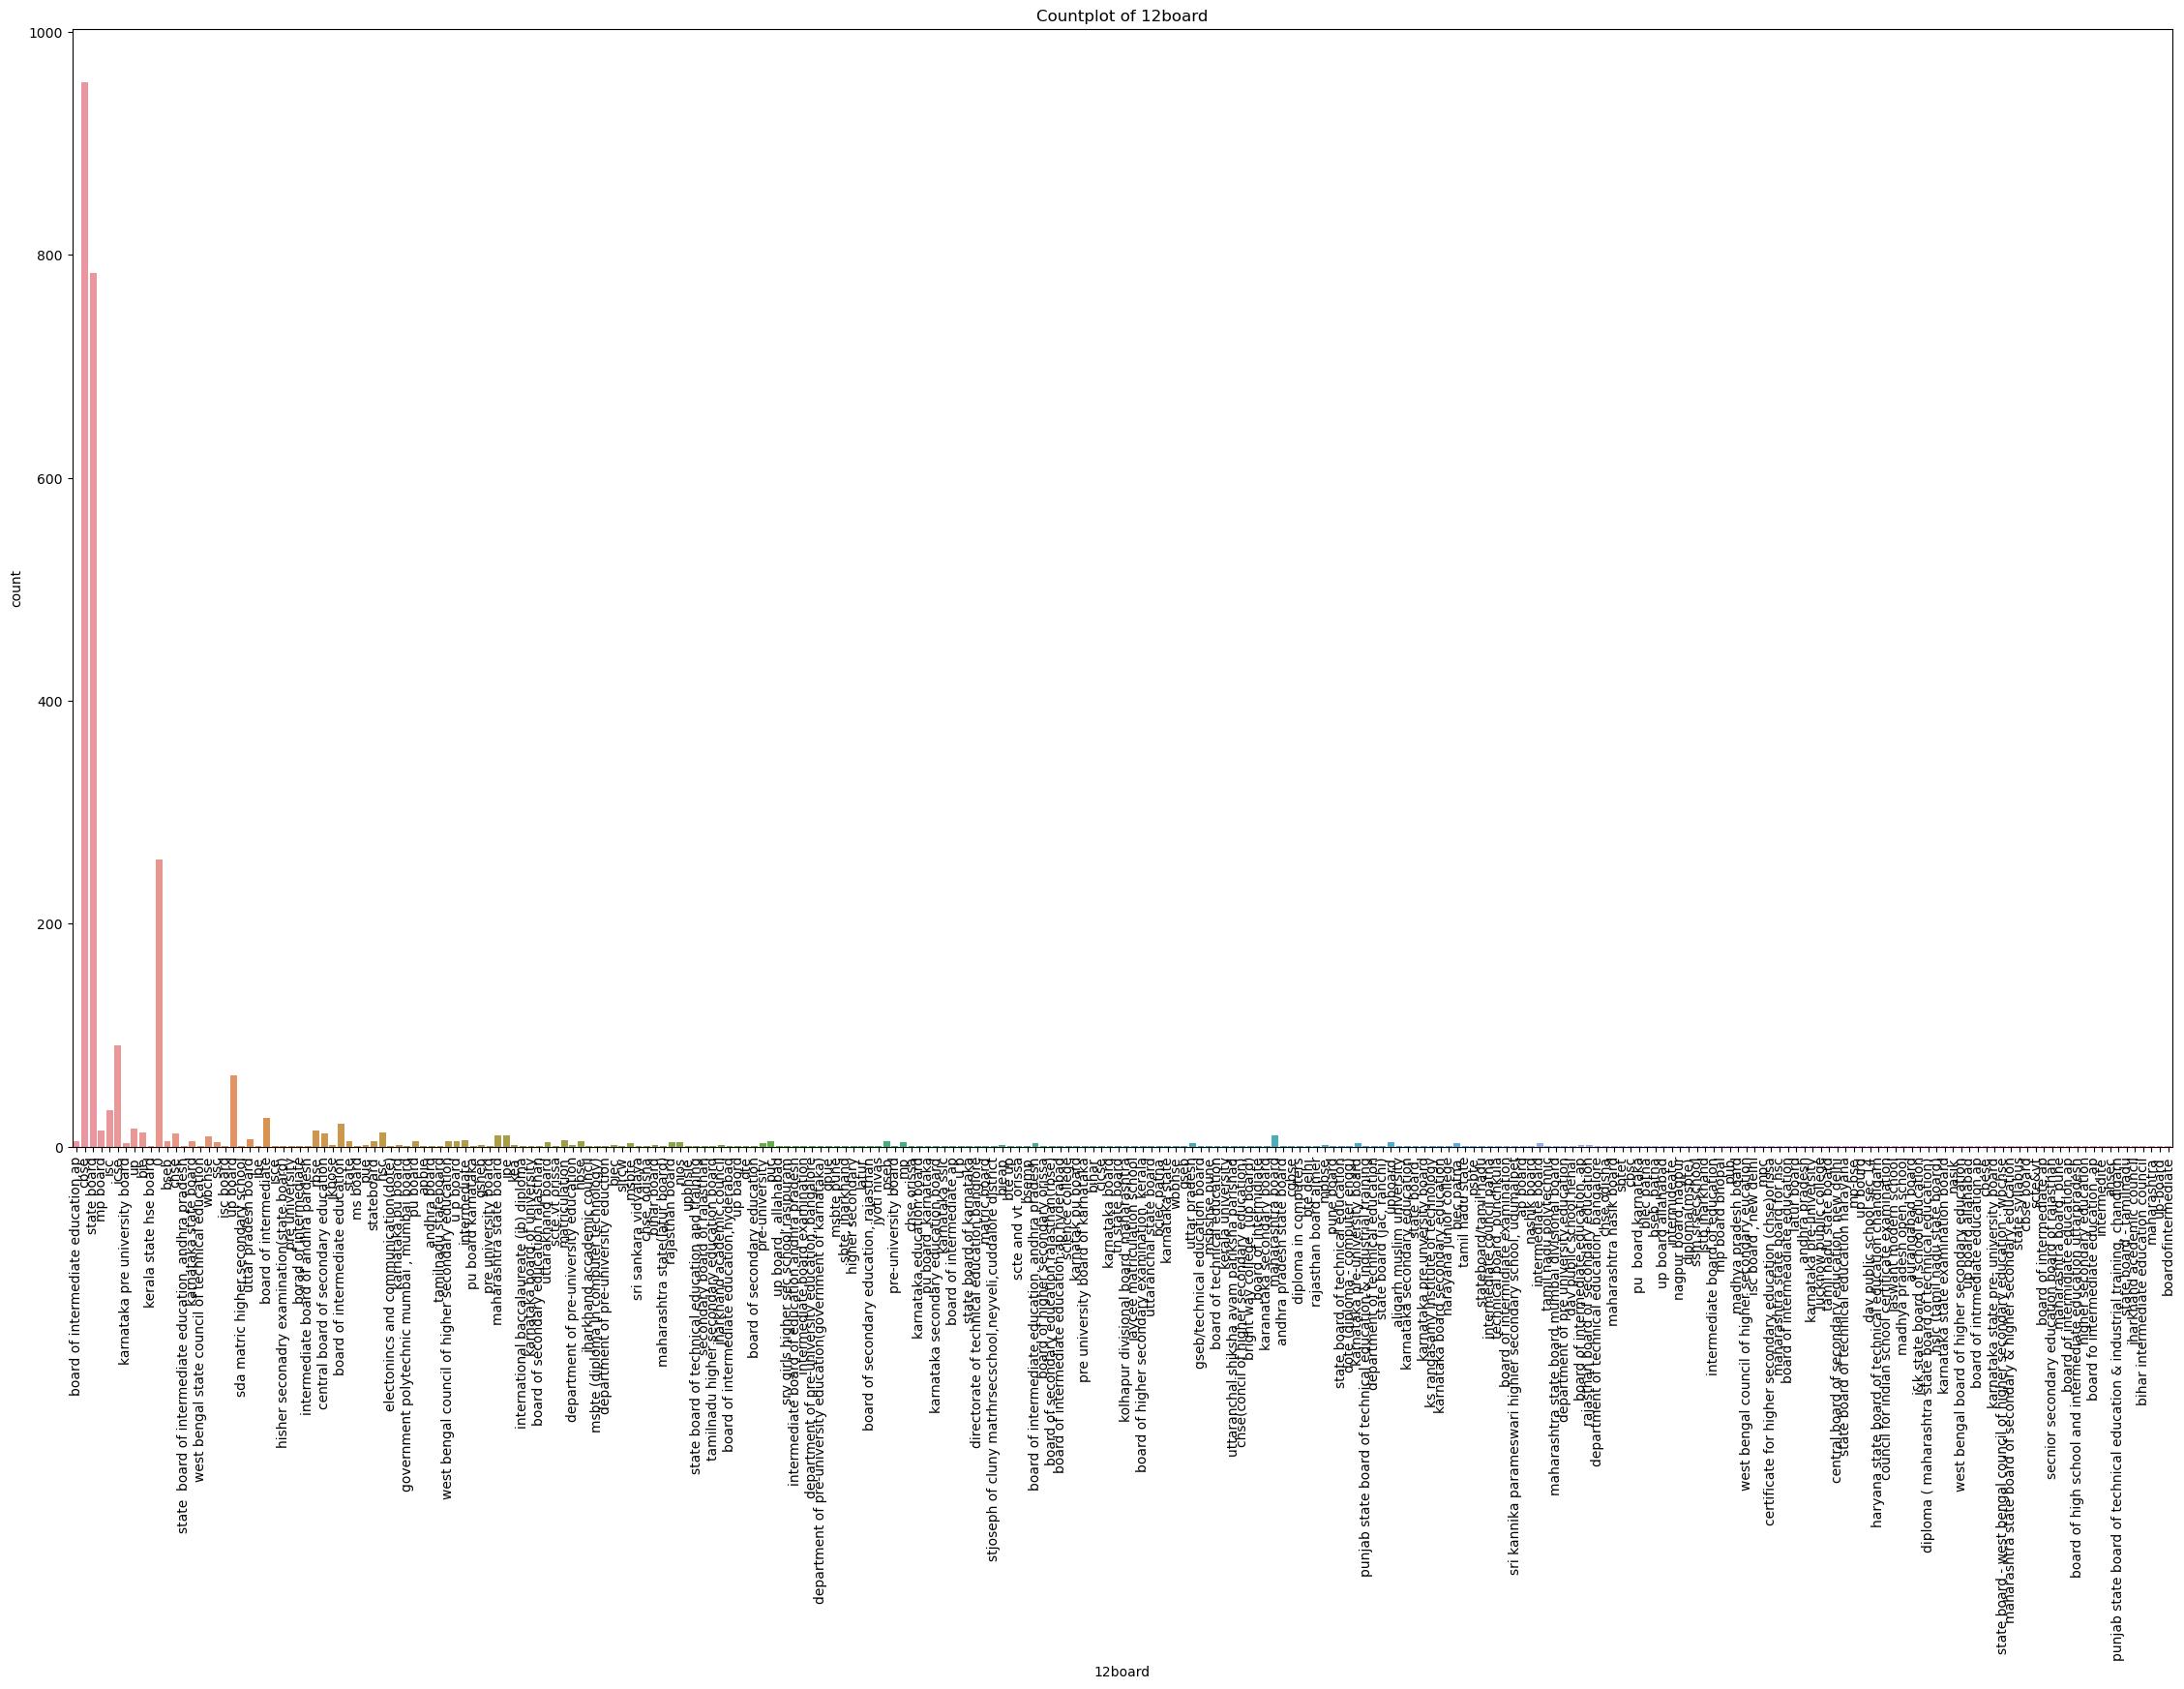

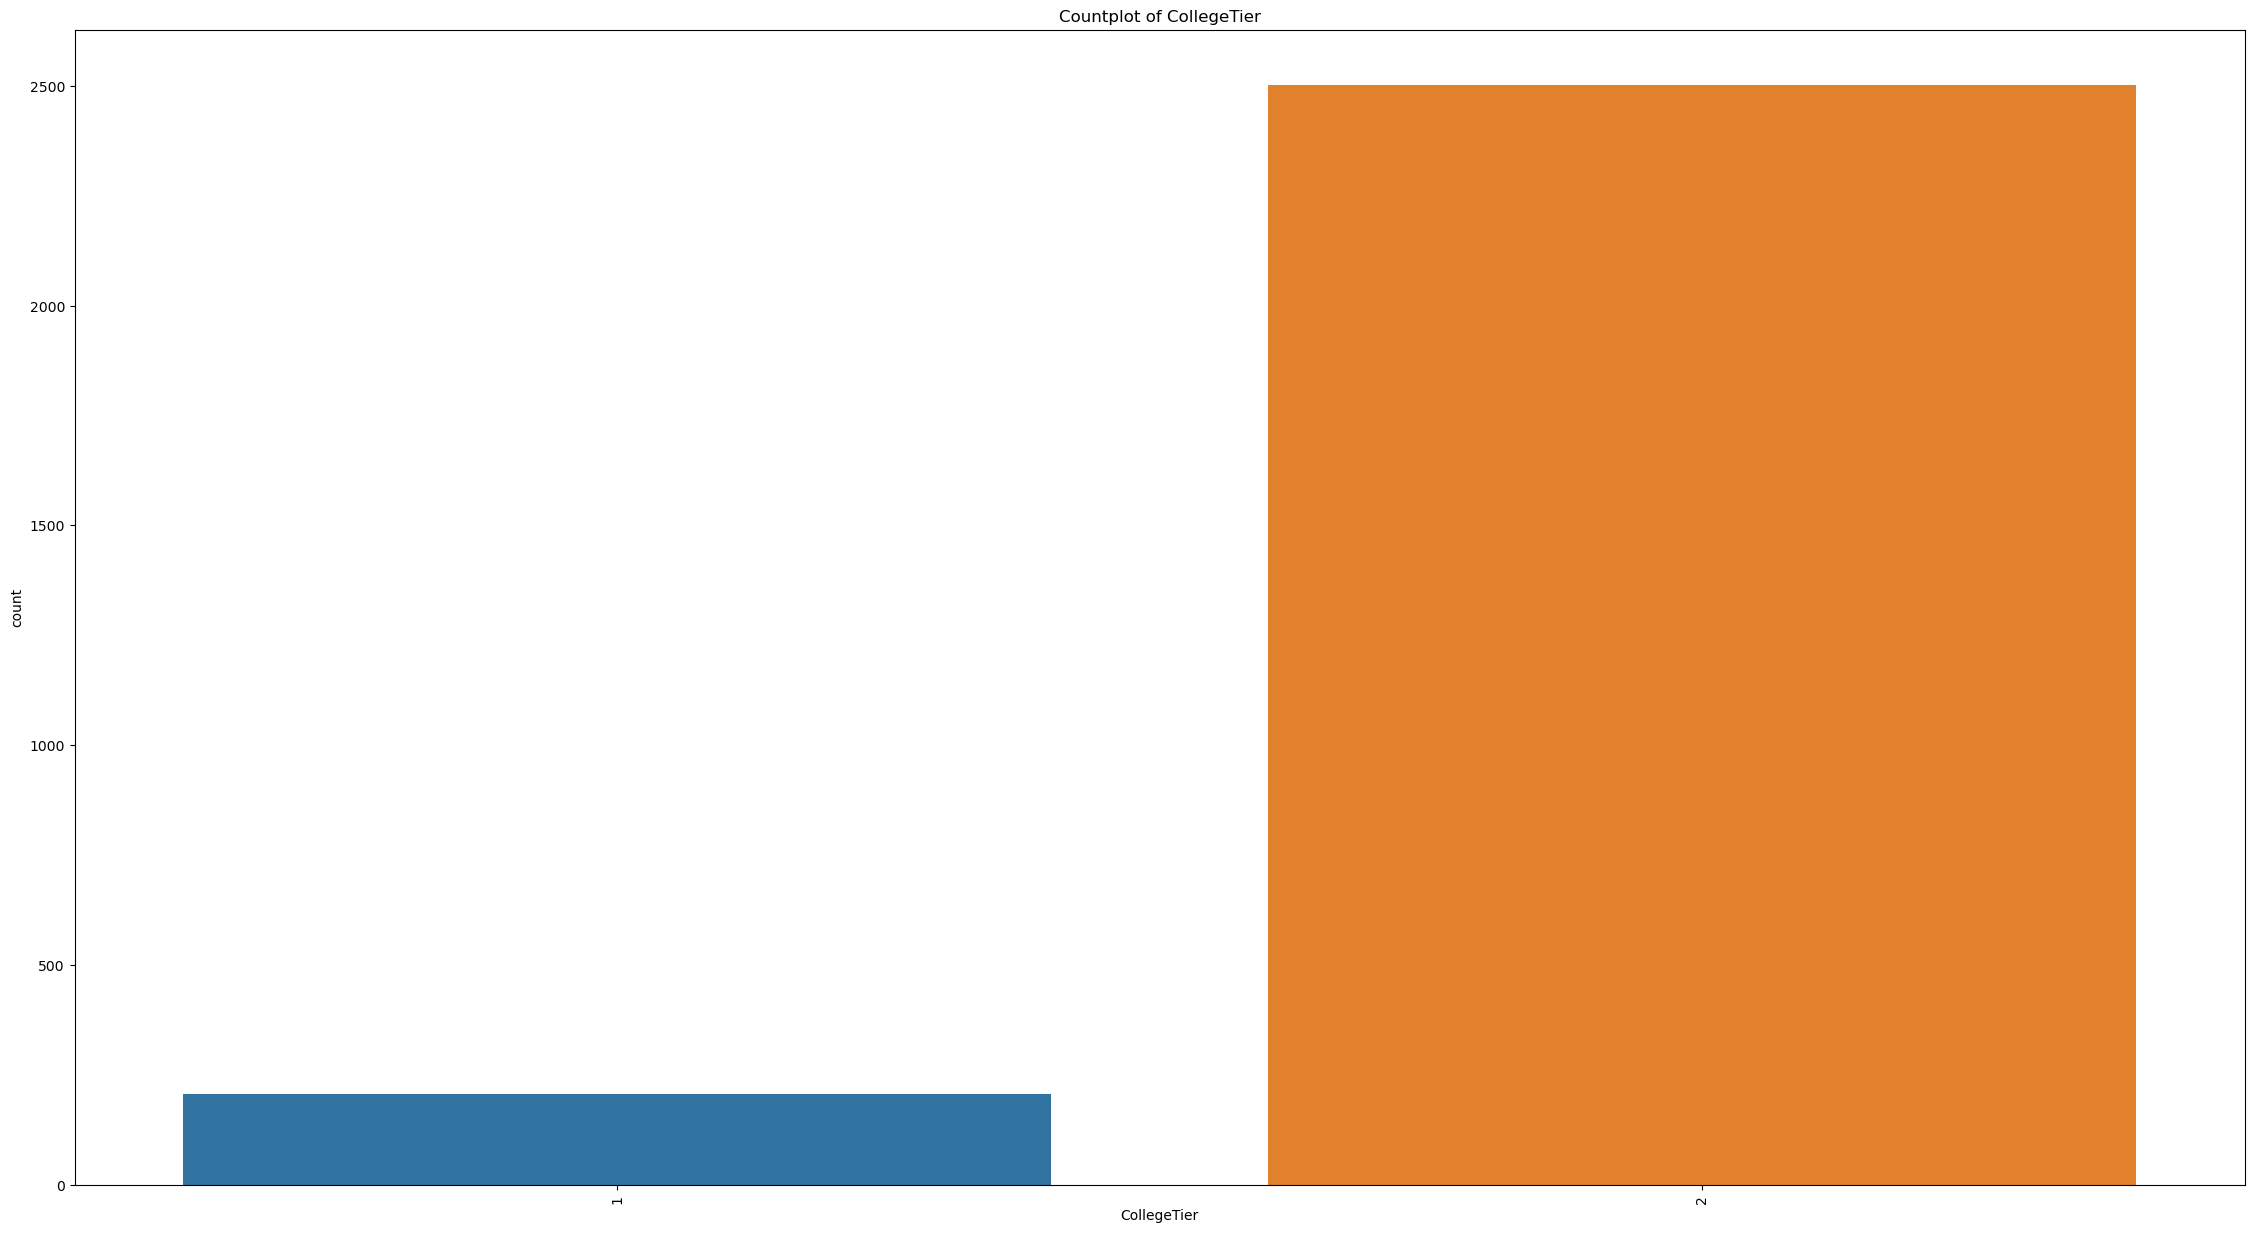

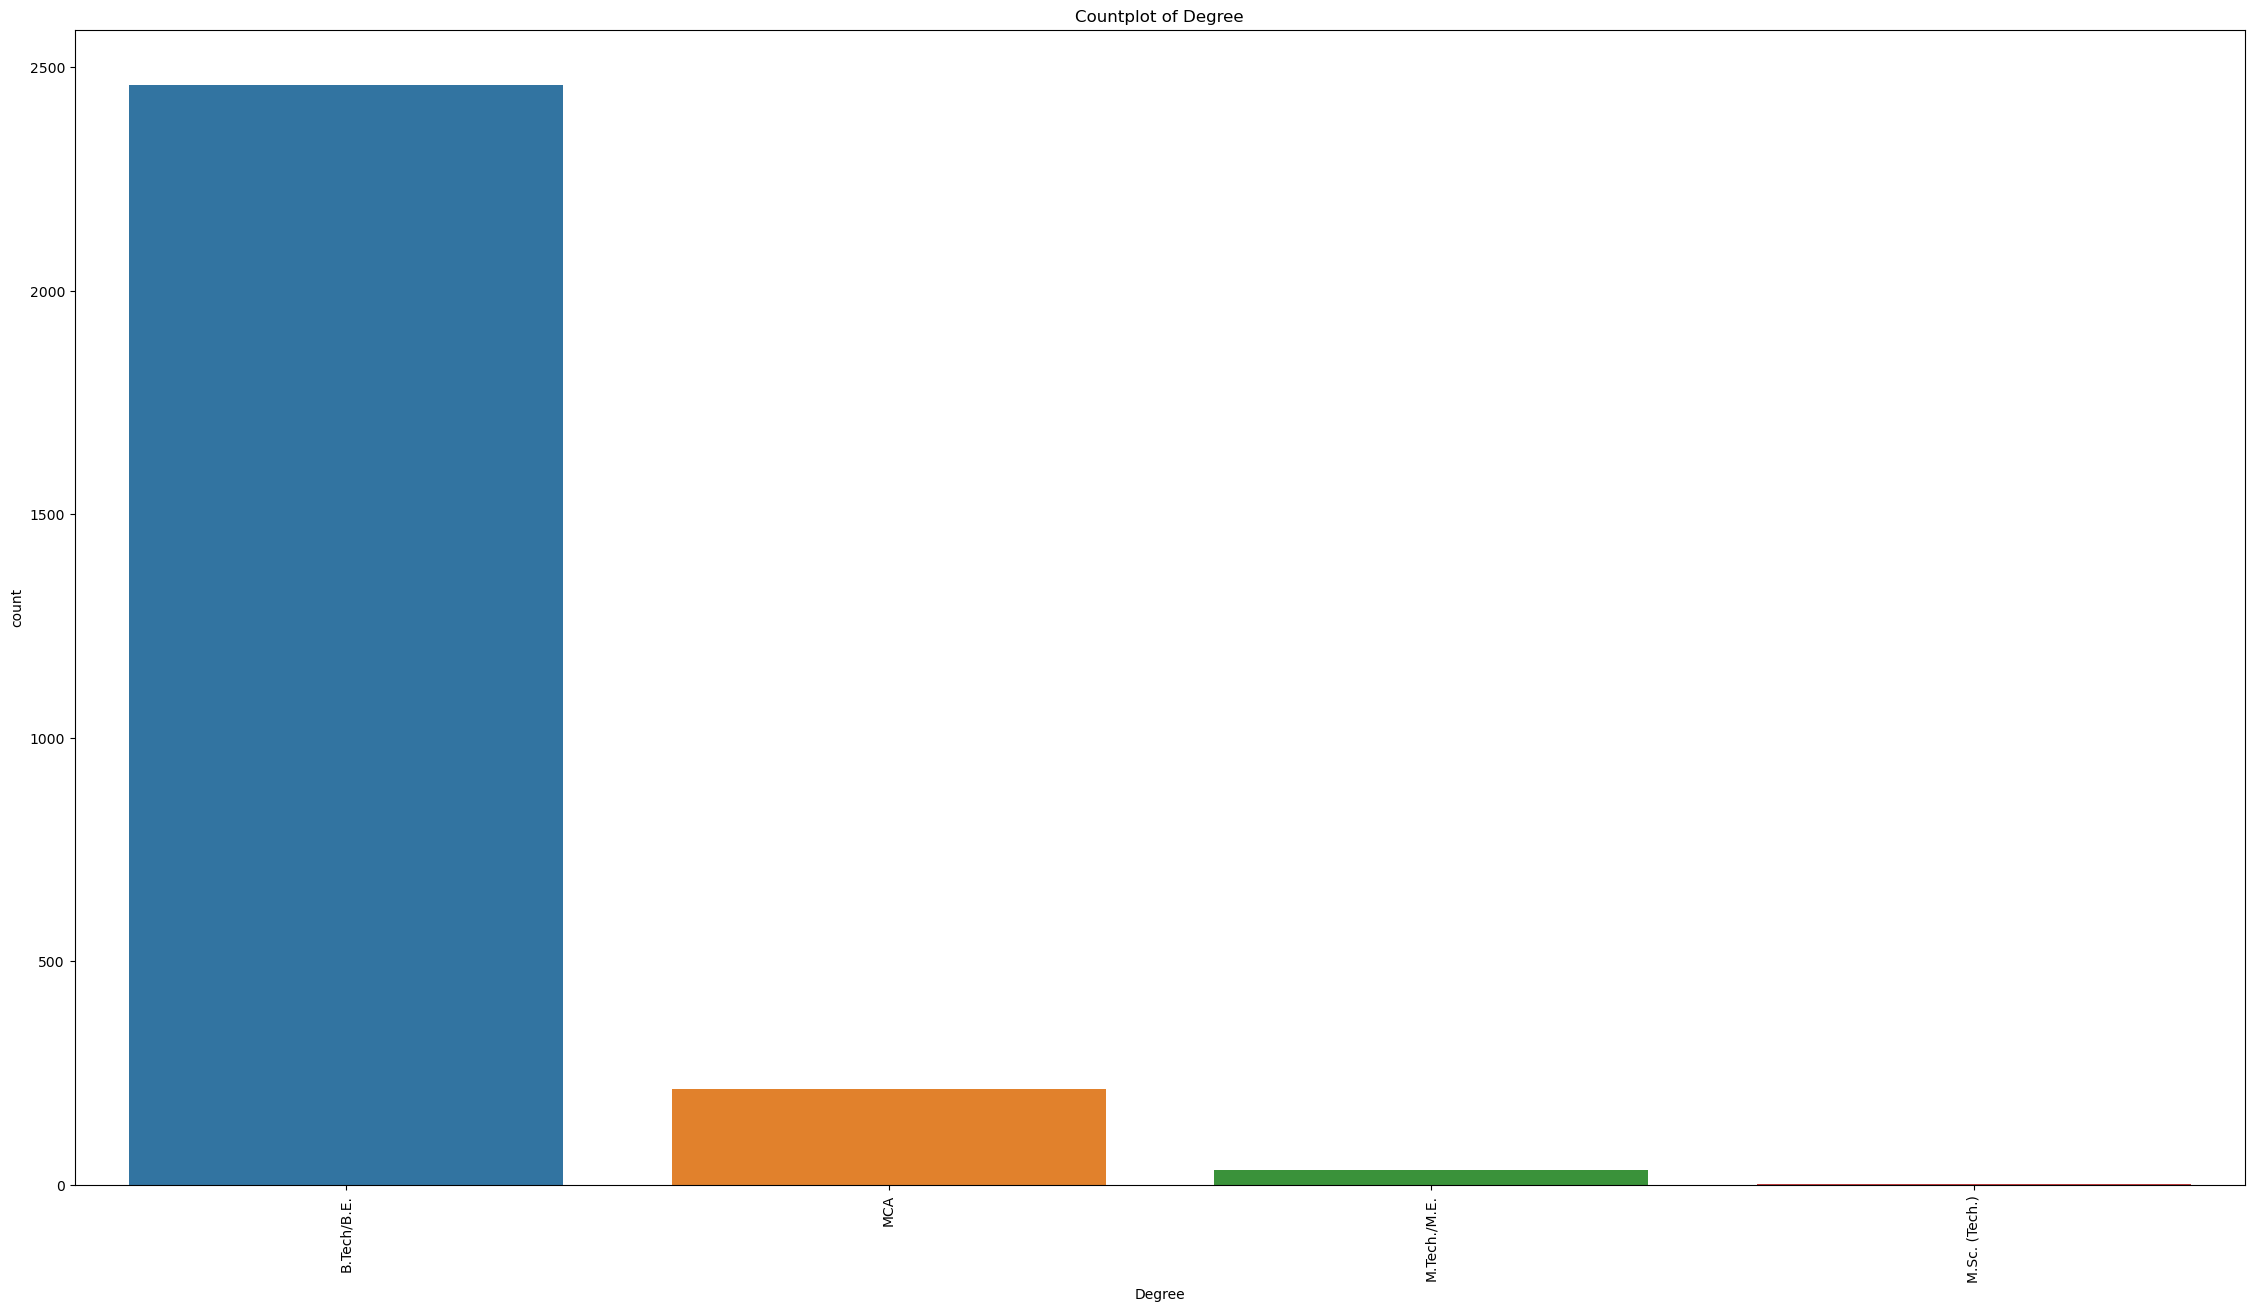

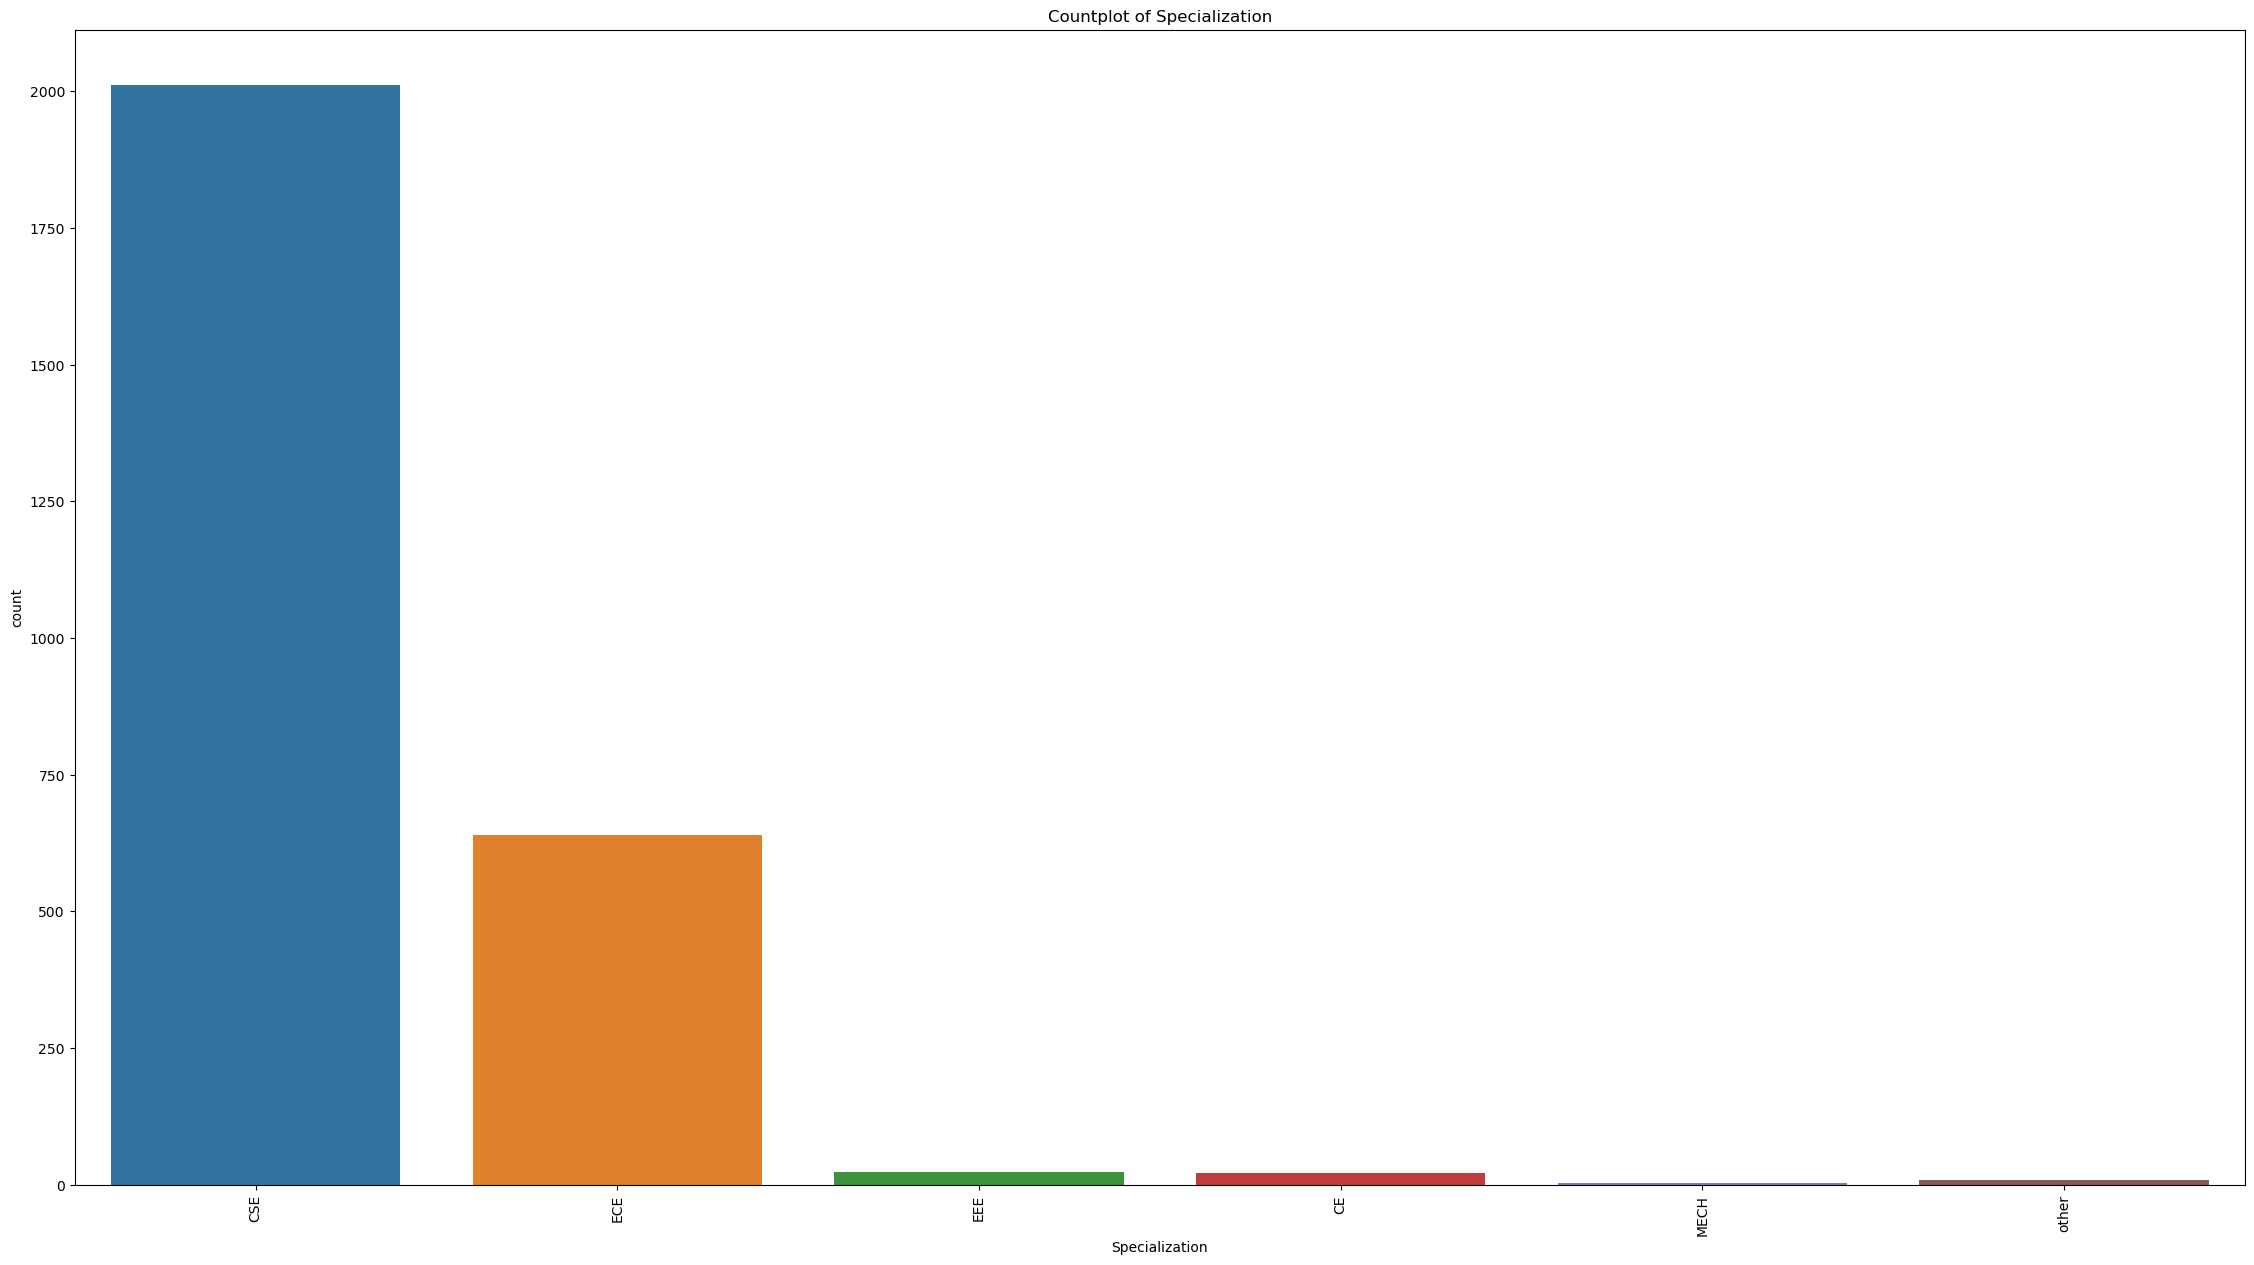

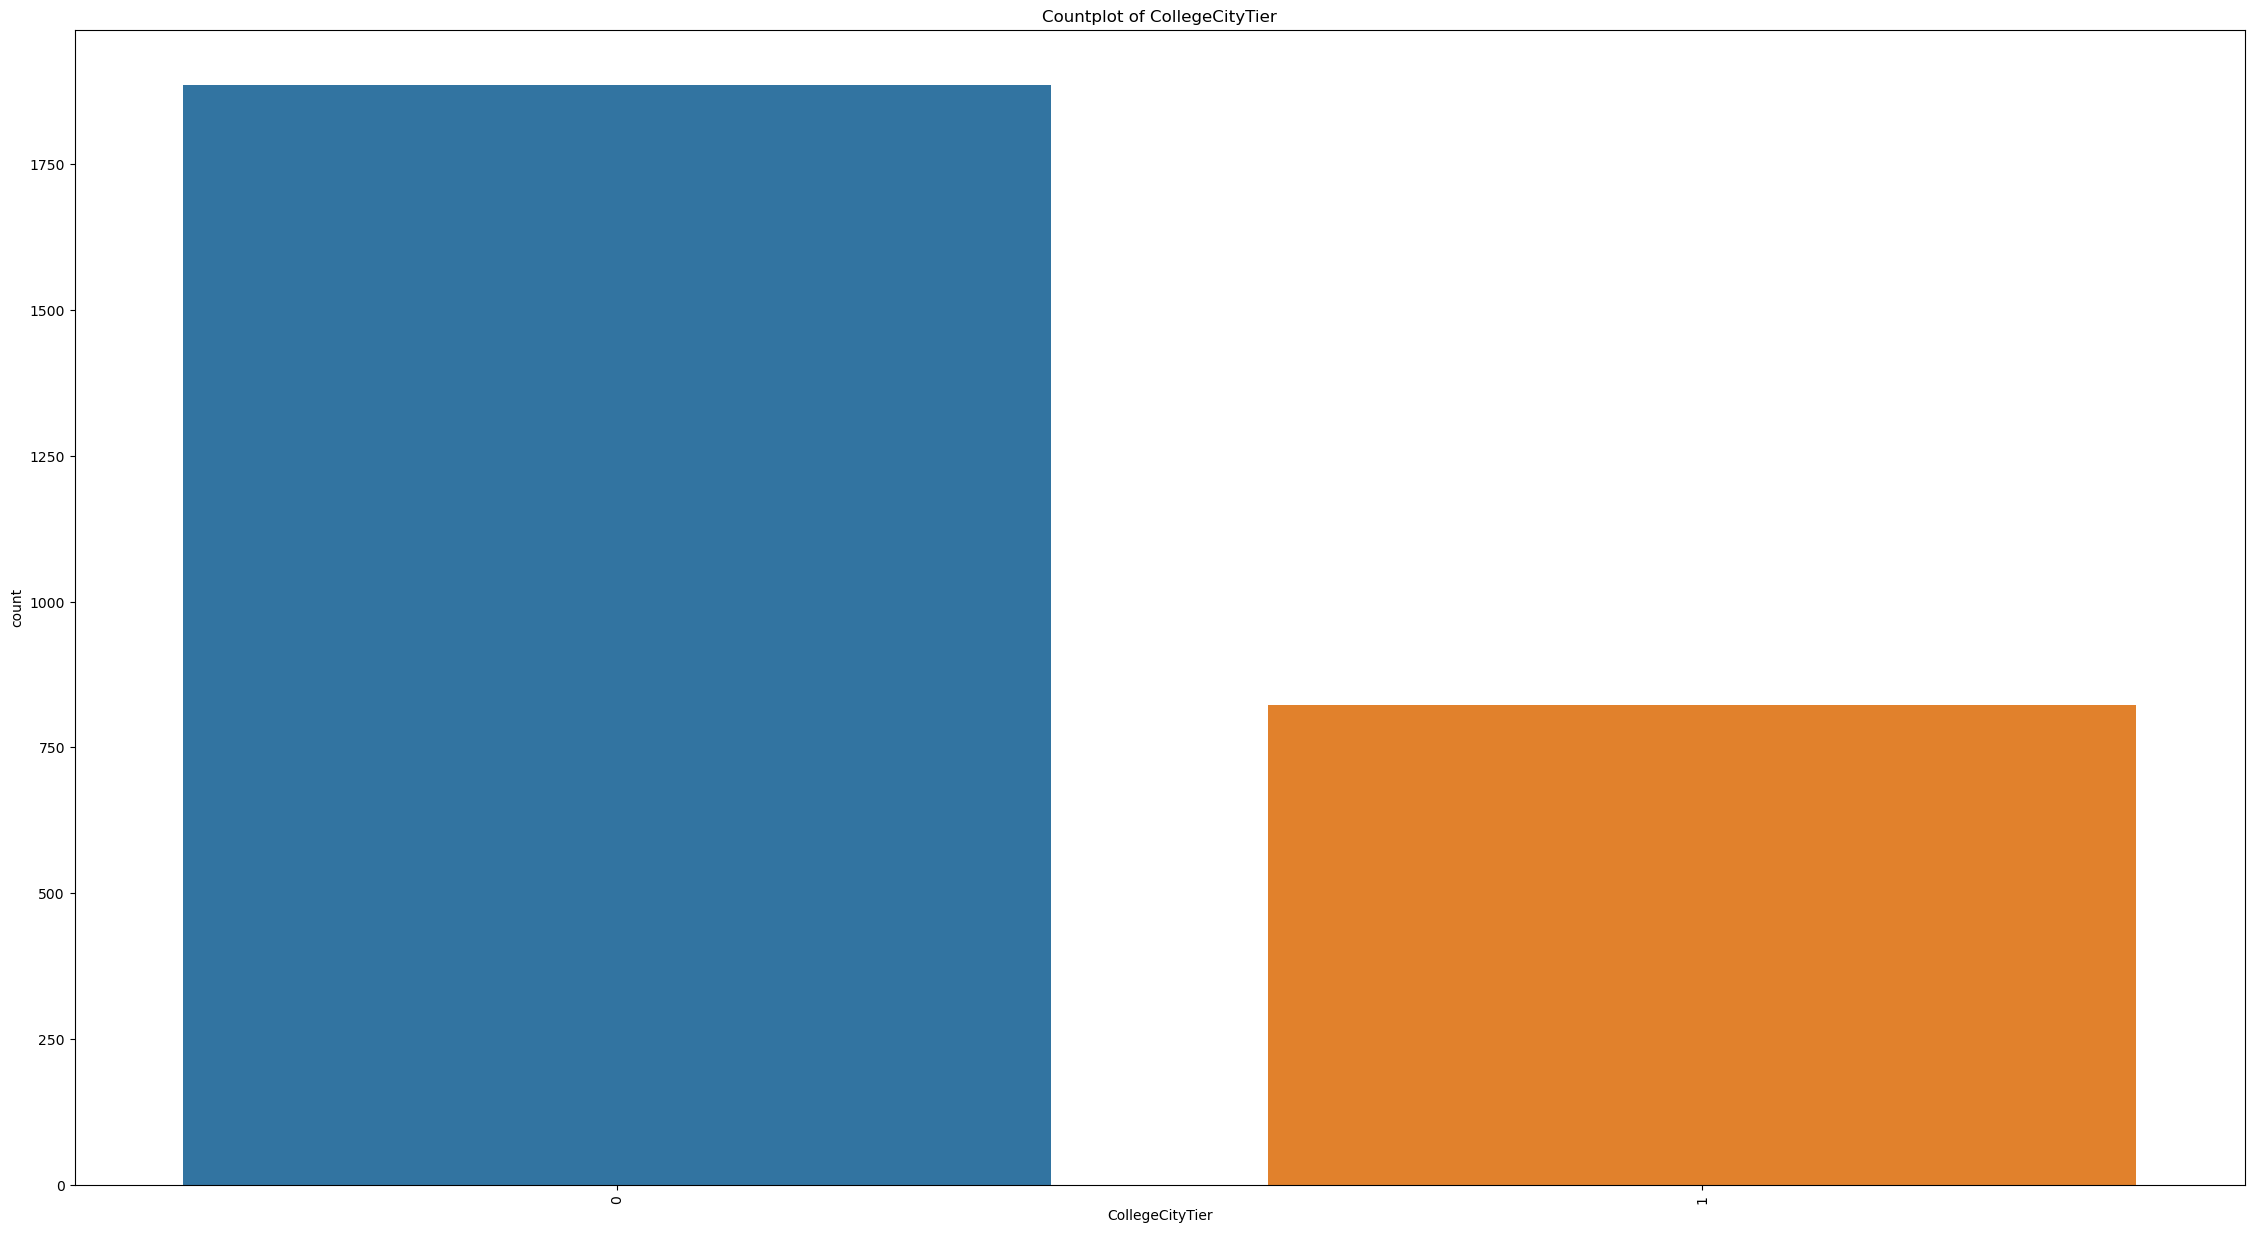

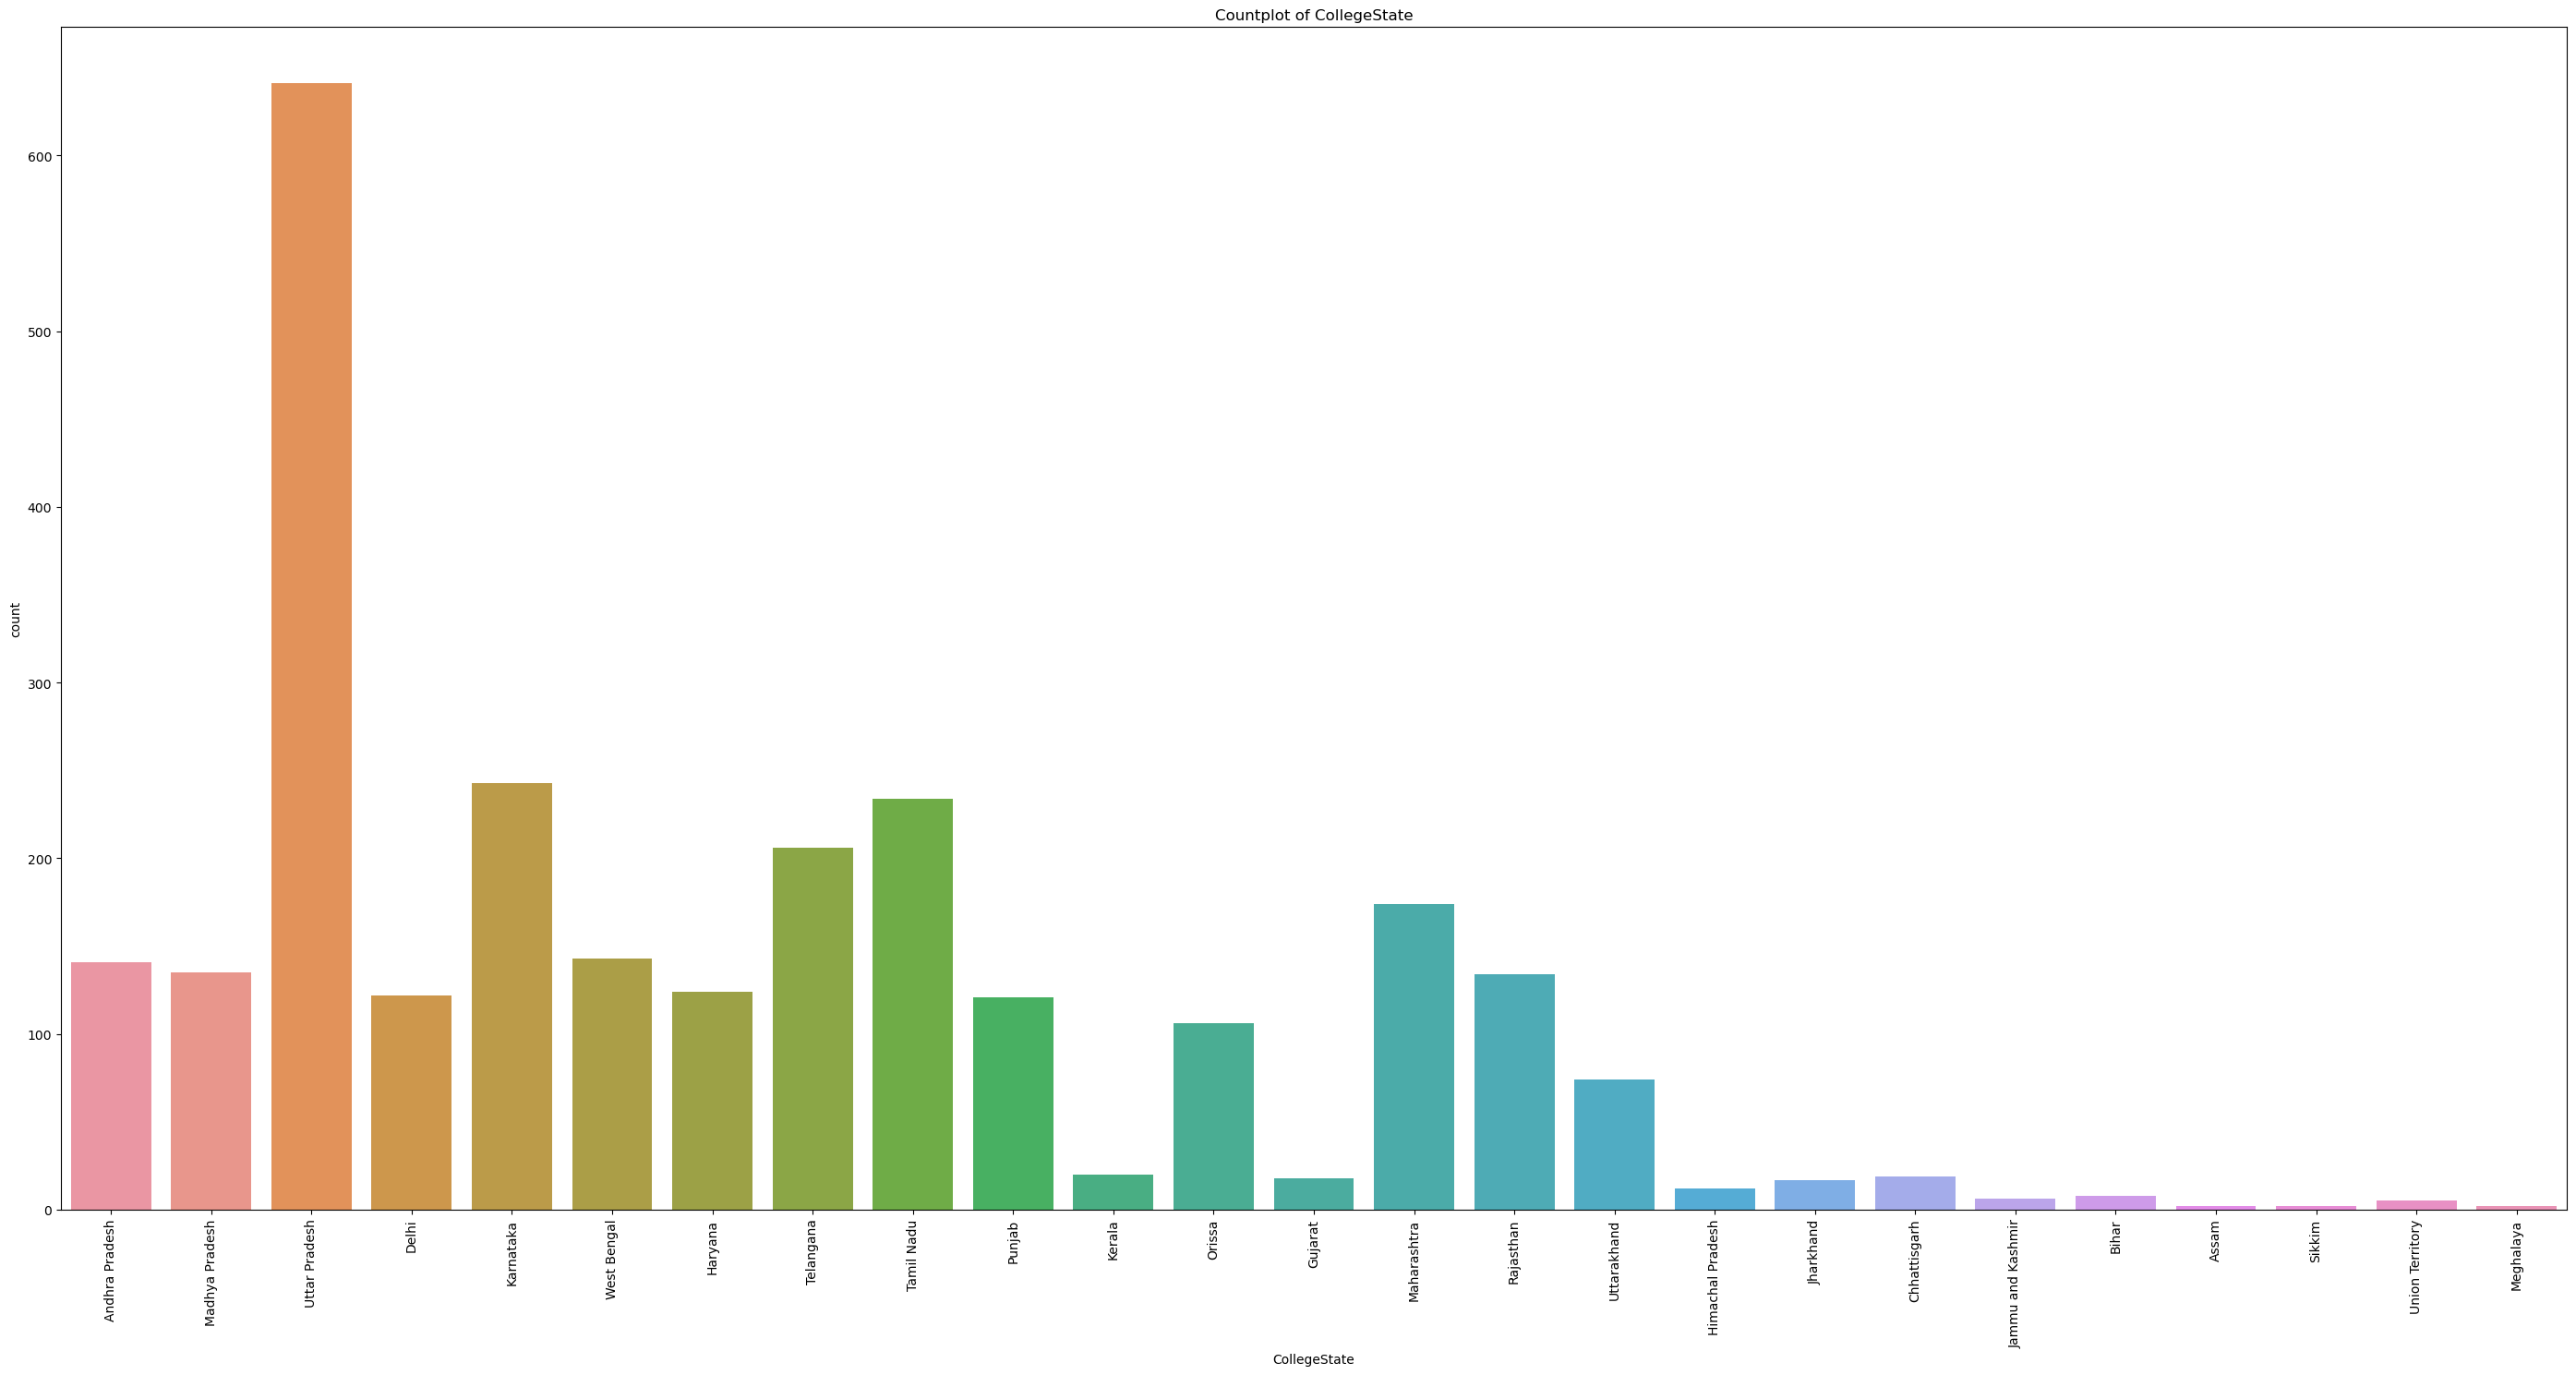

In [37]:
# Frequency Distribution for Categorical Variables
categorical_cols = ['Designation', 'JobCity', 'Gender', '10board', '12board', 'CollegeTier', 'Degree', 'Specialization',
                    'CollegeCityTier', 'CollegeState']

for col in categorical_cols:
    plt.figure(figsize=(28,15))
    
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Observations

- The most common designation is "Software Engineer", followed by "Software Developer".
- There's a significant drop-off in frequency for other roles, suggesting a tech-heavy dataset.
- Bangalore is by far the most common job location, followed by Chennai and Pune.
- This suggests a concentration of jobs in major tech hubs in India.
- There's a significant gender imbalance in the dataset, with males outnumbering females by a large margin.
- For both 10th and 12th standards, state boards are the most common, followed by CBSE.
- There's a similar distribution pattern between 10th and 12th board types.
- There are more Tier 2 colleges represented than Tier 1, but the difference isn't extremely large.
- B.Tech/B.E. is overwhelmingly the most common degree, indicating a strong focus on engineering in the dataset.
- Computer Science and Electronics/Telecommunication are the most common specializations.
- This aligns with the prevalence of software engineering roles in the designations.
- Maharashtra has the highest number of colleges, followed by Tamil Nadu and Uttar Pradesh.
- This distribution might reflect the locations of major educational hubs in India.

## Step 4 - Bivariate Visual and Non Visual Analysis

In [38]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Job_Role'],
      dtype='object')

In [39]:
df.corr()

ID    Salary  10percentage  12graduation  \
ID                     1.000000 -0.253513      0.023843      0.686332   
Salary                -0.253513  1.000000      0.209723     -0.143079   
10percentage           0.023843  0.209723      1.000000      0.263105   
12graduation           0.686332 -0.143079      0.263105      1.000000   
12percentage          -0.011916  0.210189      0.643323      0.247061   
CollegeID              0.276407 -0.100161      0.035372      0.265697   
CollegeTier            0.035974 -0.191846     -0.119124      0.031316   
collegeGPA             0.041150  0.146688      0.319736      0.072646   
CollegeCityID          0.276407 -0.100161      0.035372      0.265697   
CollegeCityTier       -0.045305  0.031335      0.112246     -0.012582   
GraduationYear         0.826515 -0.211138      0.083448      0.796481   
English                0.114377  0.191779      0.343932      0.151548   
Logical                0.075074  0.204790      0.324946      0.099572   
Quant                 -0.066181  0.239366      0.314038     -0.020797   
Domain                -0.042281  0.191677      0.161276     -0.038077   
ComputerProgramming    0.039246  0.125277      0.083267     -0.016384   
ElectronicsAndSemicon -0.068386  0.014616      0.099278      0.008108   
ComputerScience        0.575251 -0.125329     -0.002791      0.377201   
MechanicalEngg        -0.031074  0.007895      0.008875     -0.022683   
ElectricalEngg              NaN       NaN           NaN           NaN   
TelecomEngg                 NaN       NaN           NaN           NaN   
CivilEngg              0.025354  0.045341      0.037666      0.046299   
conscientiousness      0.196506 -0.075857      0.030128      0.110904   
agreeableness          0.045804  0.061069      0.127151      0.077190   
extraversion           0.161519 -0.035436     -0.038216      0.083115   
nueroticism           -0.148510 -0.048994     -0.136929     -0.100481   
openess_to_experience  0.091721 -0.039208     -0.011832      0.021565   

                       12percentage  CollegeID  CollegeTier  collegeGPA  \
ID                        -0.011916   0.276407     0.035974    0.041150   
Salary                     0.210189  -0.100161    -0.191846    0.146688   
10percentage               0.643323   0.035372    -0.119124    0.319736   
12graduation               0.247061   0.265697     0.031316    0.072646   
12percentage               1.000000   0.029934    -0.102323    0.346490   
CollegeID                  0.029934   1.000000     0.068761    0.032171   
CollegeTier               -0.102323   0.068761     1.000000   -0.085842   
collegeGPA                 0.346490   0.032171    -0.085842    1.000000   
CollegeCityID              0.029934   1.000000     0.068761    0.032171   
CollegeCityTier            0.114692   0.011273    -0.103069   -0.001765   
GraduationYear             0.050178   0.260039    -0.019372    0.090769   
English                    0.201549  -0.030402    -0.160695    0.089569   
Logical                    0.234033  -0.057360    -0.192000    0.188207   
Quant                      0.304095  -0.124671    -0.241471    0.205683   
Domain                     0.166567  -0.096676    -0.128843    0.184999   
ComputerProgramming        0.101064  -0.023530    -0.085559    0.142678   
ElectronicsAndSemicon      0.158497  -0.034412    -0.048185    0.050898   
ComputerScience           -0.042151   0.133429     0.005795    0.005567   
MechanicalEngg             0.011206  -0.018655     0.005527   -0.026402   
ElectricalEngg                  NaN        NaN          NaN         NaN   
TelecomEngg                     NaN        NaN          NaN         NaN   
CivilEngg                  0.003490   0.019282    -0.071117    0.006362   
conscientiousness          0.021221   0.083662     0.086754    0.061387   
agreeableness              0.098764   0.022440    -0.027778    0.057475   
extraversion              -0.026008   0.034994     0.015684   -0.039635   
nueroticism               -0.09878

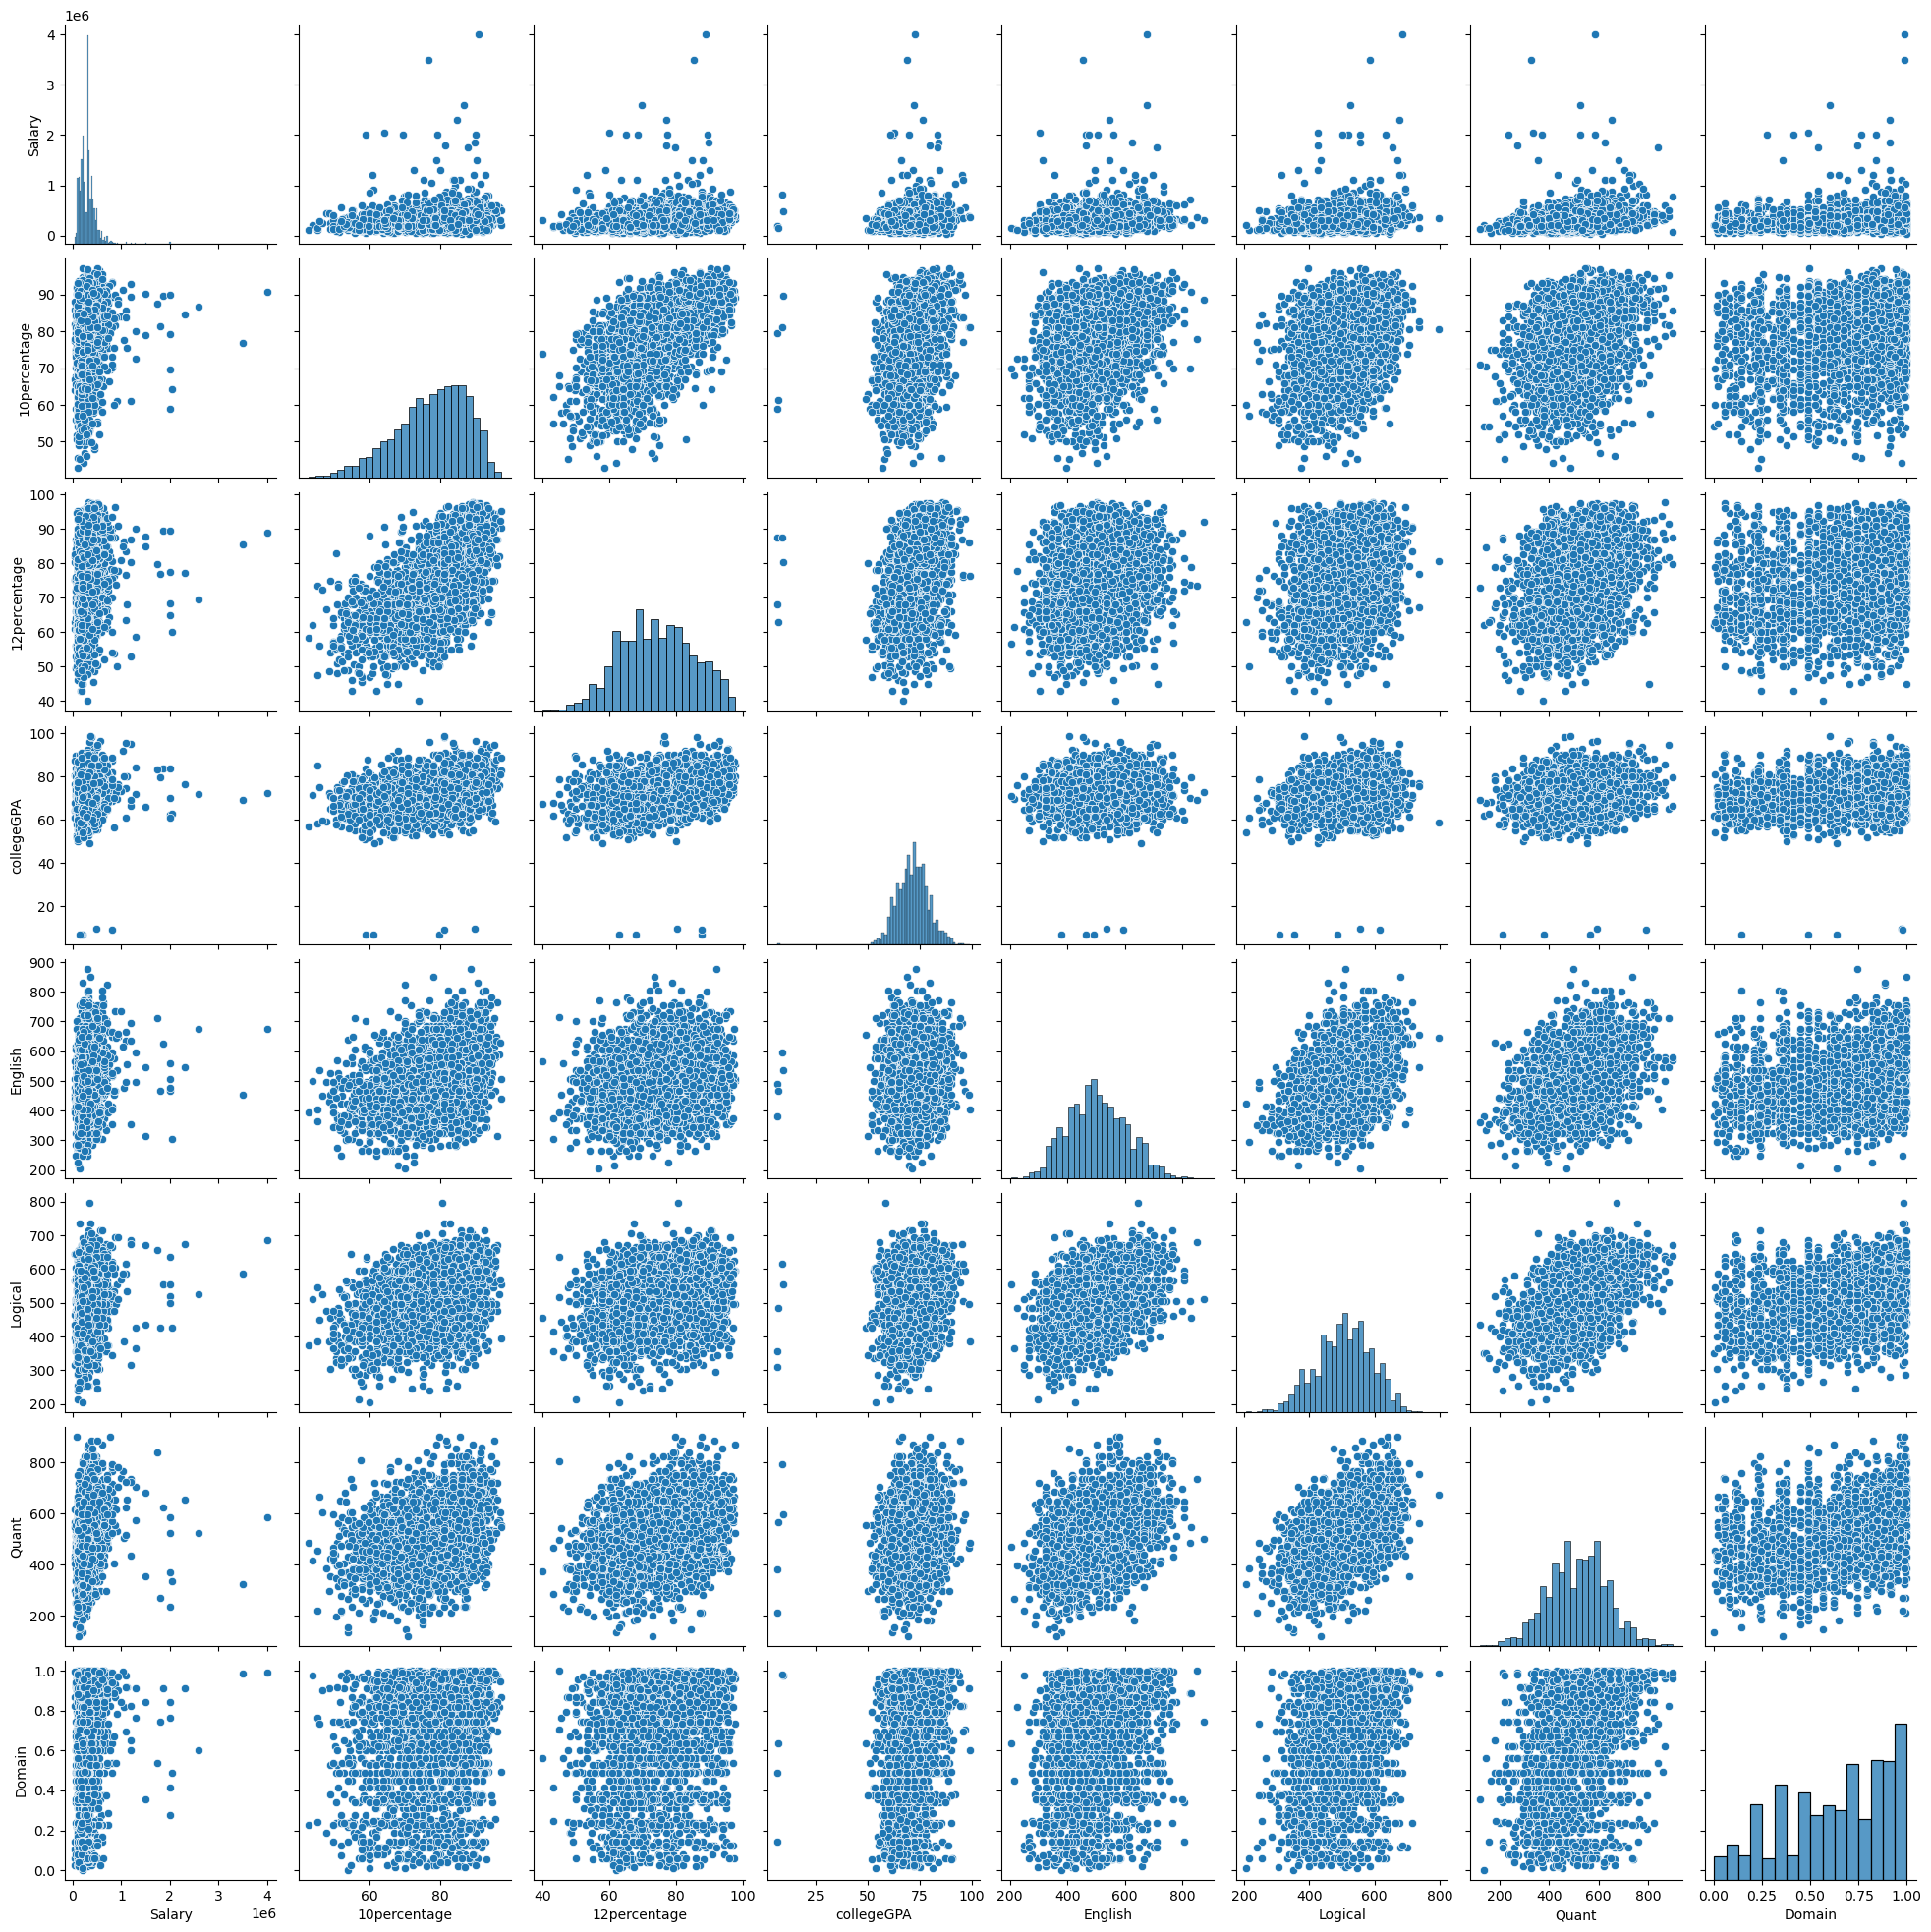

In [40]:
# Scatter plot between Salary and other numerical columns
sns.pairplot(df, vars=['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain'])
plt.show()

## `Salary` vs `Job`

In [41]:
df.groupby('Job_Role')['Salary'].describe().round(2).sort_values('mean')

count       mean        std      min       25%       50%  \
Job_Role                                                                      
Administrator      124.0  232177.42  117028.32  80000.0  150000.0  200000.0   
Other              235.0  258170.21  256590.59  45000.0  145000.0  200000.0   
Developer          599.0  269098.50  211345.08  60000.0  145000.0  240000.0   
Hardware Engineer  220.0  306568.18  182966.85  50000.0  183750.0  295000.0   
Analyst            302.0  318907.28  135441.19  50000.0  210000.0  312500.0   
Test Engineer      118.0  331610.17  158412.10  60000.0  200000.0  325000.0   
Manager             68.0  342279.41  216204.43  50000.0  205000.0  300000.0   
Software Engineer  710.0  354957.75  233538.42  50000.0  240000.0  320000.0   
System Engineer    333.0  362417.42  202256.69  35000.0  320000.0  335000.0   

                        75%        max  
Job_Role                                
Administrator      287500.0   910000.0  
Other              267500.0  2000000.0  
Developer          340000.0  2600000.0  
Hardware Engineer  381250.0  1860000.0  
Analyst            368750.0   800000.0  
Test Engineer      415000.0   900000.0  
Manager            403750.0  1300000.0  
Software Engineer  413750.0  4000000.0  
System Engineer    420000.0  3500000.0

In [42]:
order = df.groupby('Job_Role')['Salary'].mean().sort_values().index

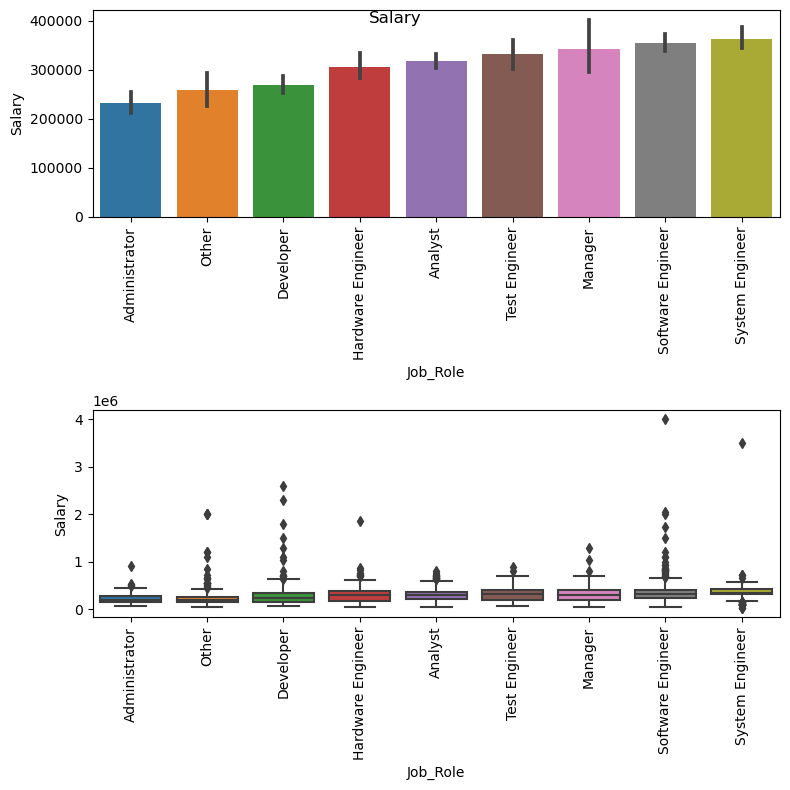

In [43]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
sns.barplot(x='Job_Role', y='Salary', data=df, order=order, ax=ax1)
sns.boxplot(x='Job_Role', y='Salary', data=df, order=order, ax=ax2)
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
plt.tight_layout()
plt.suptitle('Salary')
plt.show()

### Observation:
- By the above graph Managers are Earning More than others.
- The second Most Earner from the plot is System Engineer

## `Salary` vs `CollegeTier`

In [44]:
df.groupby('CollegeTier')['Salary'].describe()

count          mean           std       min       25%       50%  \
CollegeTier                                                                     
1             207.0  453864.73430  355333.55185  100000.0  310000.0  360000.0   
2            2502.0  301984.41247  189070.38349   35000.0  180000.0  300000.0   

                  75%        max  
CollegeTier                       
1            500000.0  4000000.0  
2            370000.0  3500000.0

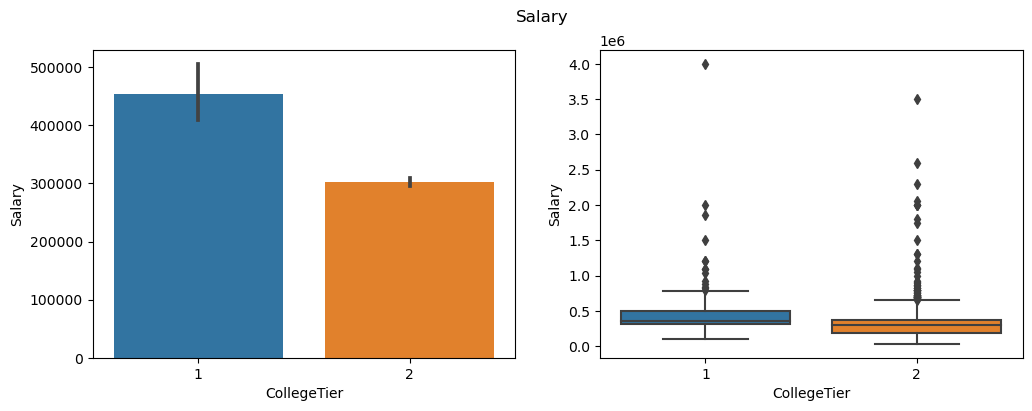

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='CollegeTier', y='Salary', data=df, ax=ax1)
sns.boxplot(x='CollegeTier', y='Salary', data=df, ax=ax2)
plt.suptitle('Salary')
plt.show()

### Observation:
The people who are from Tier-1 college are Earning More as compared to Tire-2

## `Salary` vs `Specialization`

In [46]:
df.groupby('Specialization')['Salary'].describe().round(1).sort_values('mean')

count      mean       std       min       25%       50%  \
Specialization                                                             
MECH               4.0  273750.0   78249.1  180000.0  225000.0  282500.0   
other              9.0  287222.2  174393.8  100000.0  200000.0  235000.0   
ECE              640.0  311312.5  181752.2   45000.0  200000.0  300000.0   
CSE             2012.0  312676.4  216744.0   35000.0  185000.0  300000.0   
EEE               23.0  382826.1  351980.8  110000.0  205000.0  335000.0   
CE                21.0  413571.4  214302.0  110000.0  295000.0  345000.0   

                     75%        max  
Specialization                       
MECH            331250.0   350000.0  
other           325000.0   700000.0  
ECE             361250.0  2300000.0  
CSE             385000.0  4000000.0  
EEE             407500.0  1860000.0  
CE              600000.0   800000.0

In [47]:
order = df.groupby('Specialization')['Salary'].mean().sort_values().index

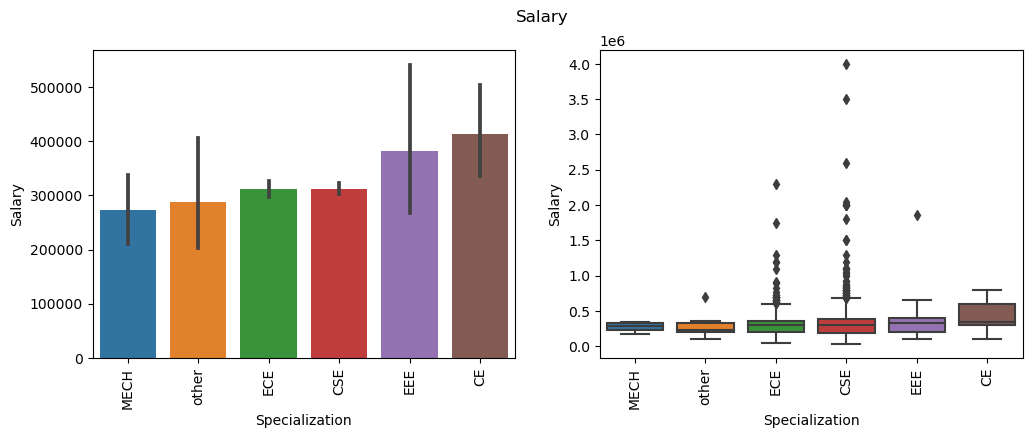

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Specialization', y='Salary', data=df, order=order, ax=ax1)
sns.boxplot(x='Specialization', y='Salary', data=df, order=order, ax=ax2)
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
plt.suptitle('Salary')
plt.show()

### Observation:
CSE people are earning more as compared to other students

## `Salary` vs `Degree`

In [49]:
df.groupby('Degree')['Salary'].describe()

count           mean            std       min       25%  \
Degree                                                                    
B.Tech/B.E.    2460.0  317081.300813  211143.976154   35000.0  200000.0   
M.Sc. (Tech.)     1.0  180000.000000            NaN  180000.0  180000.0   
M.Tech./M.E.     34.0  406470.588235  347705.747706   65000.0  200000.0   
MCA             214.0  259322.429907  156805.353943   60000.0  145000.0   

                    50%       75%        max  
Degree                                        
B.Tech/B.E.    300000.0  381250.0  4000000.0  
M.Sc. (Tech.)  180000.0  180000.0   180000.0  
M.Tech./M.E.   345000.0  448750.0  1860000.0  
MCA            217500.0  325000.0  1200000.0

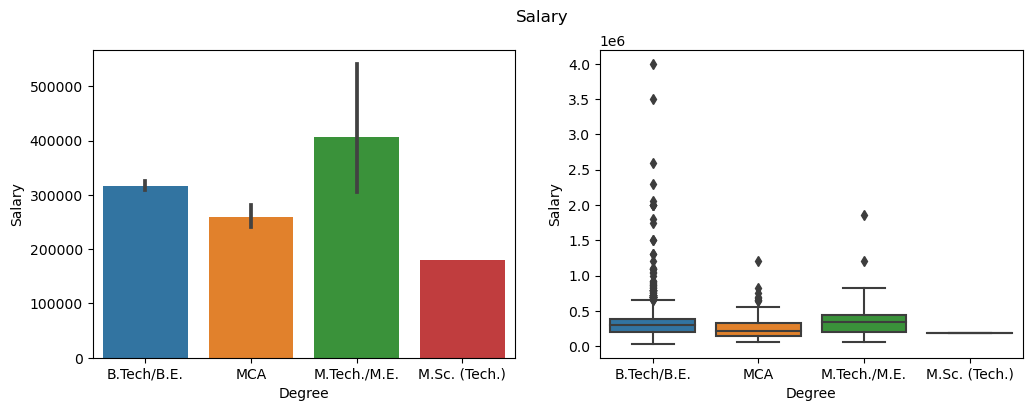

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Degree', y='Salary', data=df, ax=ax1)
sns.boxplot(x='Degree', y='Salary', data=df, ax=ax2)
plt.suptitle('Salary')
plt.show()

### Observation:
M.Tech/M.E students are earning More than others, but B.Tech/B.E Students having more chances to earn better than M.Tech Students.

### Numerical vs. Numerical Relationships

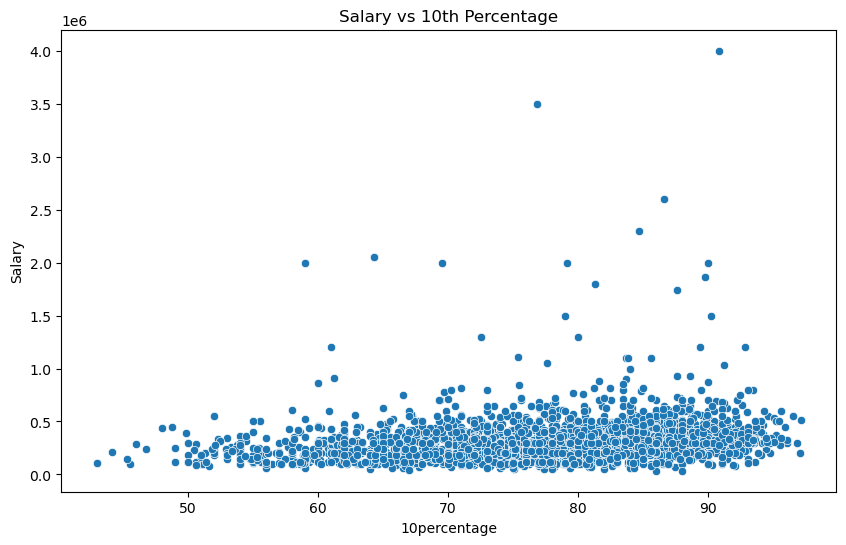

In [51]:
# Scatter Plot for Salary vs Other Numerical Columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='10percentage', y='Salary', data=df)
plt.title('Salary vs 10th Percentage')
plt.show()

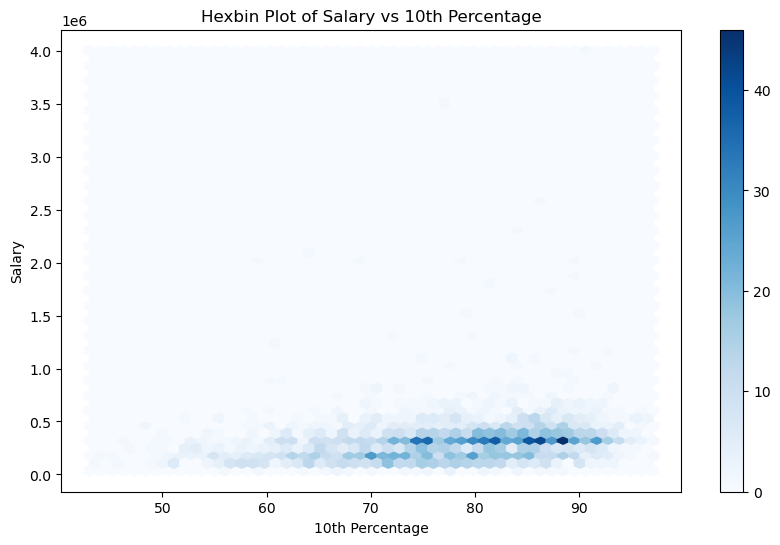

In [52]:
# Hexbin Plot for Salary vs 10percentage
plt.figure(figsize=(10, 6))
plt.hexbin(df['10percentage'], df['Salary'], gridsize=50, cmap='Blues')
plt.colorbar()
plt.title('Hexbin Plot of Salary vs 10th Percentage')
plt.xlabel('10th Percentage')
plt.ylabel('Salary')
plt.show()


### Categorical vs. Numerical Relationships

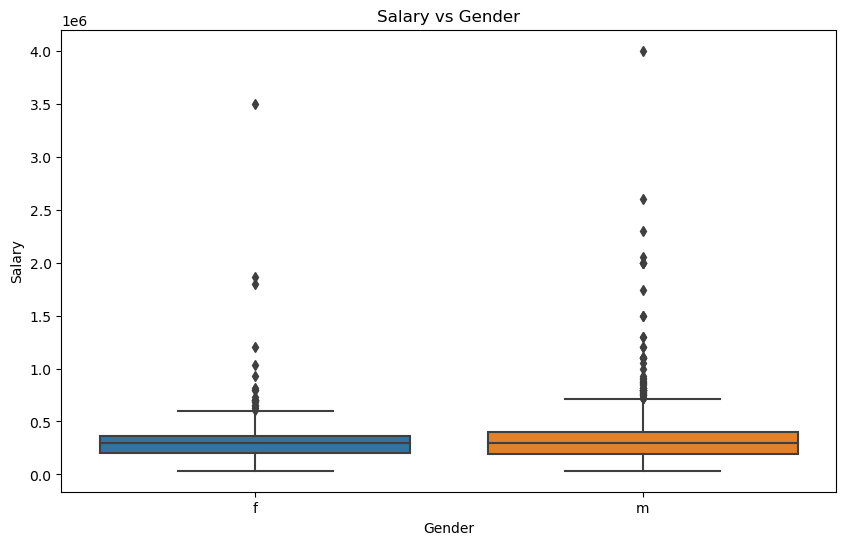

In [53]:
# Boxplot to compare Salary across different Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary vs Gender')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


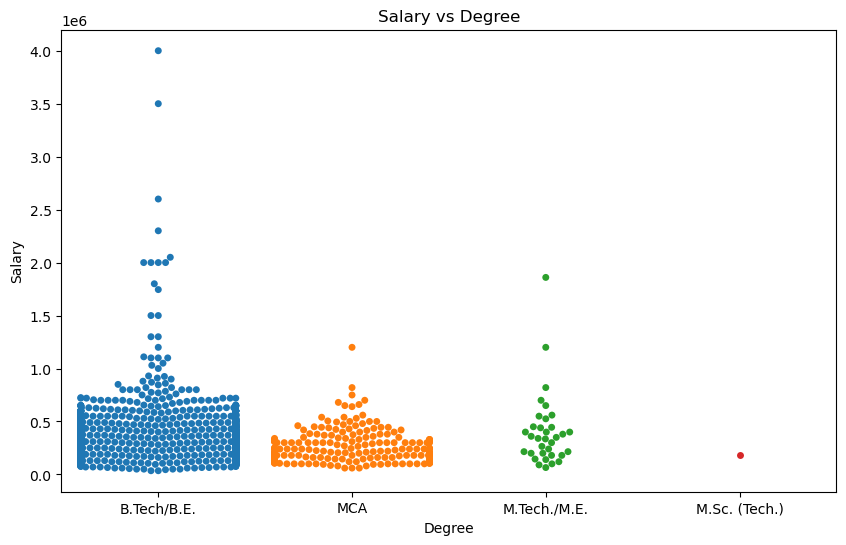

In [54]:
# Swarmplot for Salary vs Degree
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Degree', y='Salary', data=df)
plt.title('Salary vs Degree')
plt.show()


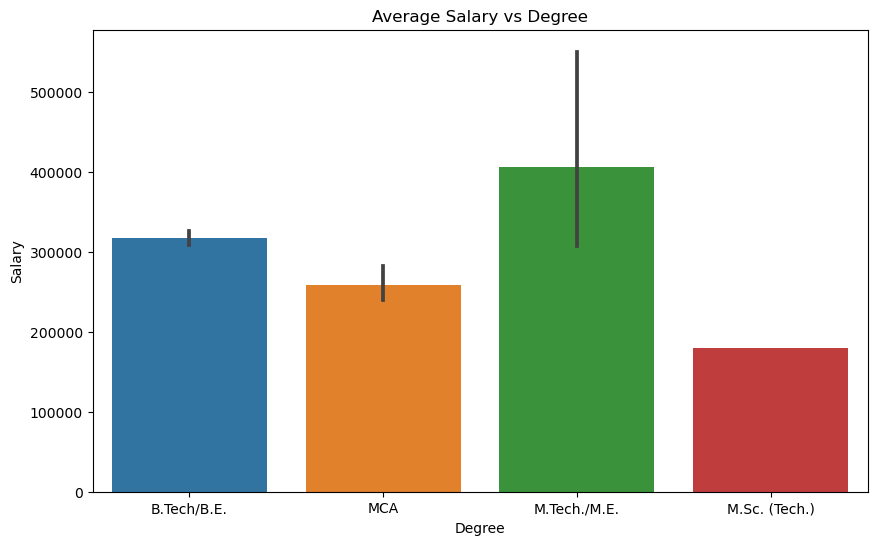

In [55]:
# Barplot for Salary vs Degree
plt.figure(figsize=(10, 6))
sns.barplot(x='Degree', y='Salary', data=df)
plt.title('Average Salary vs Degree')
plt.show()


### Categorical vs. Categorical Relationships

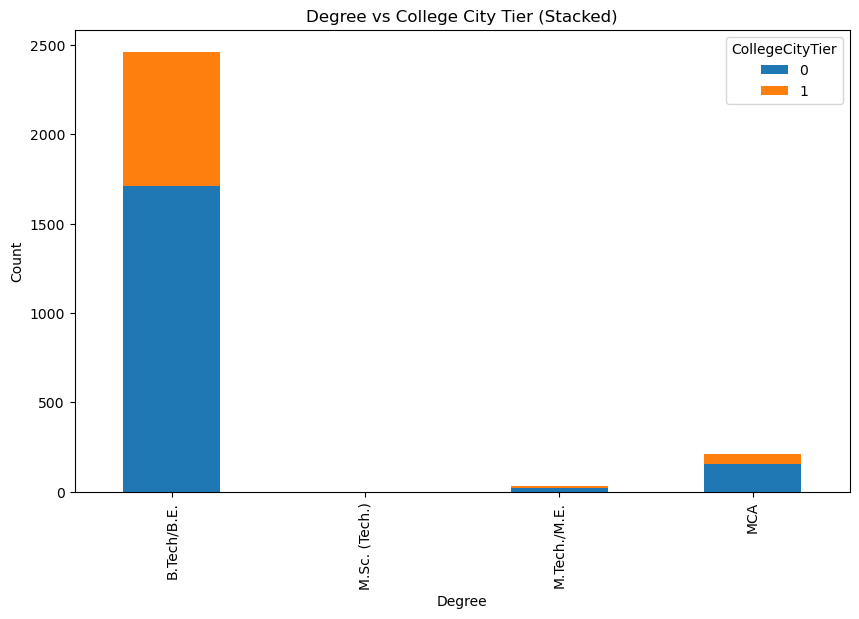

In [56]:
# Stacked Bar Plot for Degree and CollegeCityTier
cross_tab = pd.crosstab(df['Degree'], df['CollegeCityTier'])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Degree vs College City Tier (Stacked)')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()


## Step - 5 - Research Questions 

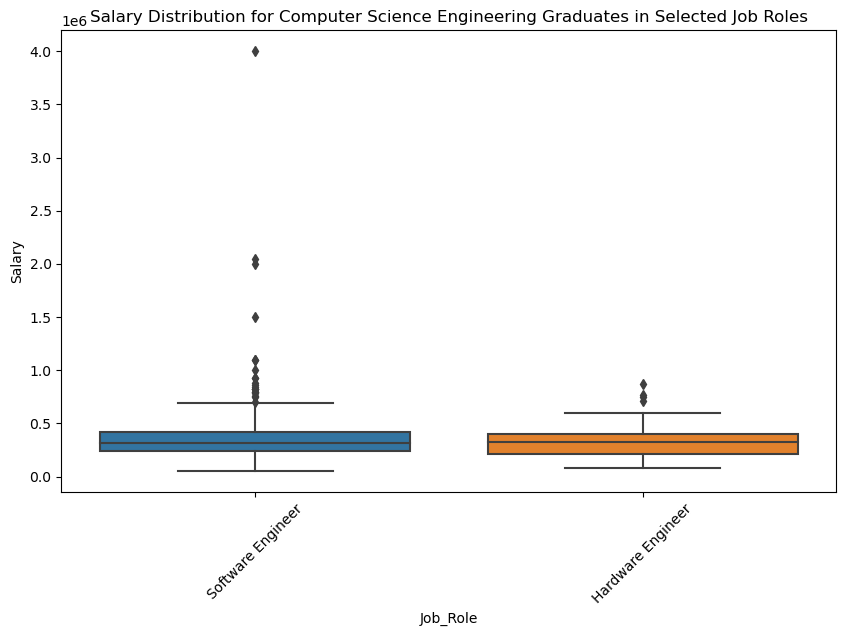

count    6.850000e+02
mean     3.510365e+05
std      2.304520e+05
min      5.000000e+04
25%      2.400000e+05
50%      3.200000e+05
75%      4.150000e+05
max      4.000000e+06
Name: Salary, dtype: float64


In [57]:
# Filter data for Computer Science Engineering graduates
cse_graduates = df[df['Specialization'] == 'CSE']

# List of job roles to consider
roles_of_interest = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']

# Filter data to only include these roles
role_data = cse_graduates[cse_graduates['Job_Role'].isin(roles_of_interest)]

# Show the salary distribution for these roles
plt.figure(figsize=(10, 6))
sns.boxplot(x='Job_Role', y='Salary', data=role_data)
plt.title('Salary Distribution for Computer Science Engineering Graduates in Selected Job Roles')
plt.xticks(rotation=45)
plt.show()

# You can also check the specific salary range in these roles
salary_range = role_data['Salary'].describe()
print(salary_range)


In [67]:
df['Job_Role'].unique()

array(['Test Engineer', 'Manager', 'System Engineer', 'Software Engineer',
       'Other', 'Hardware Engineer', 'Developer', 'Analyst',
       'Administrator'], dtype=object)

In [68]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'java software engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'qa analyst', 'network engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'programmer analyst', 'systems analyst',
       'ase', 'application developer', 'ios developer',
       'executive assistant', 'documentation specialist',
       'associate software engineer', 'management trainee',
       'software developer', 'jr. software engineer',
       'trainee software developer', 'ui developer', 'android developer',
       'customer service', 'java developer', 'system engineer',
       'recruitment coordinator', 'technical support engineer',
       'data analyst', 'test engineer', 'assistant software engineer',
       'entry level management trainee', 'software test engineer',
       'firmware

In [70]:
filtered_df = df[df['Designation'].isin(['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer'])]
filtered_df

Unnamed: 0       ID    Salary               DOJ        DOL  \
19        train   466888  325000.0  01-09-2014 00:00 2024-10-03   
20        train   140069  320000.0  01-11-2010 00:00 2012-09-01   
21        train   339689  200000.0  01-08-2012 00:00 2013-12-01   
24        train   963123  335000.0  01-06-2014 00:00 2015-06-01   
31        train  1094324  340000.0  01-08-2014 00:00 2015-04-01   
...         ...      ...       ...               ...        ...   
3979      train   212055  550000.0  01-07-2013 00:00 2014-04-01   
3981      train  1077872  220000.0  01-09-2014 00:00 2024-10-03   
3984      train   305041  480000.0  01-12-2011 00:00 2024-10-03   
3989      train  1204604  300000.0  01-09-2014 00:00 2024-10-03   
3993      train    47916  280000.0  01-10-2011 00:00 2012-10-01   

             Designation     JobCity Gender               DOB  10percentage  \
19     software engineer        Pune      f  30-11-1990 00:00         79.00   
20     software engineer   Bangalore      f  25-07-1988 00:00         91.20   
21     software engineer          -1      f  20-08-1991 00:00         75.67   
24    programmer analyst   Hyderabad      m  28-06-1993 00:00         88.00   
31     software engineer   Bangalore      m  23-10-1992 00:00         77.20   
...                  ...         ...    ...               ...           ...   
3979   software engineer   Bangalore      m  22-07-1989 00:00         69.16   
3981   software engineer     Gurgaon      m  17-12-1991 00:00         53.40   
3984   software engineer     Gurgaon      f  18-01-1990 00:00         89.80   
3989   software engineer   Bangalore      m  23-11-1991 00:00         74.88   
3993   software engineer  New Delhi       m  15-04-1987 00:00         52.09   

      ... MechanicalEngg  ElectricalEngg  TelecomEngg CivilEngg  \
19    ...             -1              -1           -1        -1   
20    ...             -1              -1           -1        -1   
21    ...             -1              -1           -1        -1   
24    ...             -1              -1           -1        -1   
31    ...             -1              -1           -1        -1   
...   ...            ...             ...          ...       ...   
3979  ...             -1              -1           -1        -1   
3981  ...             -1              -1           -1        -1   
3984  ...             -1              -1           -1        -1   
3989  ...             -1              -1           -1        -1   
3993  ...             -1              -1           -1        -1   

      conscientiousness  agreeableness extraversion nueroticism  \
19               0.8192         0.2668      -0.2714    -0.40780   
20              -0.1082         0.9688       0.5269    -0.29020   
21              -1.0355        -0.5913      -1.3599     0.06223   
24               0.4155         0.8027       0.1357    -0.99500   
31              -0.0154         1.2114       1.0859    -1.50210   
...                 ...            ...          ...         ...   
3979            -0.5719         0.5008      -0.4891     0.41480   
3981             0.1282        -0.2871      -0.1437    -1.12180   
3984            -0.2628         0.1888       0.3817    -0.29020   
3989             0.1282         0.0459       1.2396     1.03330   
3993            -0.1082         0.3448       0.2366     0.64980   

      openess_to_experience           Job_Role  
19                  -0.1295  Software Engineer  
20                   0.3444  Software Engineer  
21                  -1.3539  Software Engineer  
24                  -0.6692            Analyst  
31                   0.2889  Software Engineer  
...                     ...                ...  
3979                -1.2354  Software Engineer  
3981                 1.4386  Software Engineer  
3984                 1.6082  Software Engineer  
3989                 0.6721  Software Engineer  
3993                -0.9194  Software Engineer  

[526 rows x 40 columns]

In [71]:
average_salary = filtered_df['Salary'].mean()
print(f'The average salary for these roles is: {average_salary}')

The average salary for these roles is: 347747.1482889734


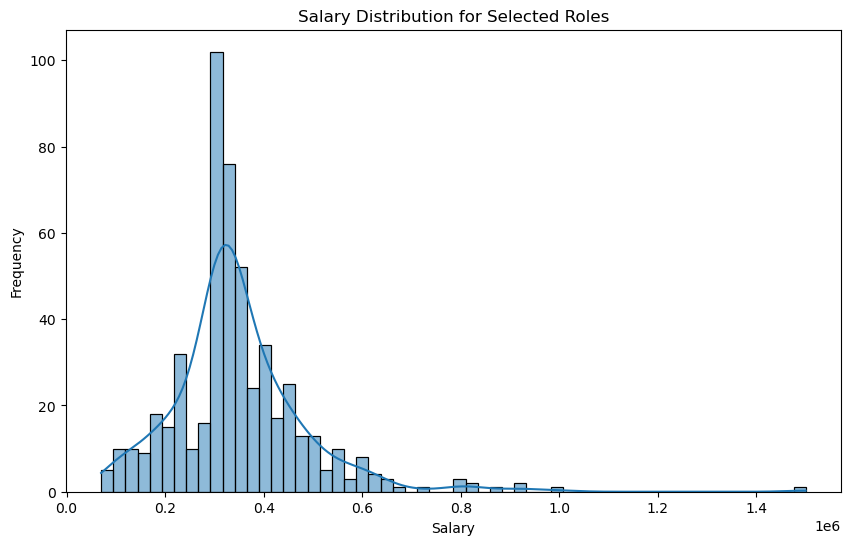

In [72]:
plt.figure(figsize=(10,6))
sns.histplot(data=filtered_df, x="Salary", kde=True)
plt.title('Salary Distribution for Selected Roles')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [73]:
max_salary = filtered_df['Salary'].max()

In [74]:
if max_salary >= 250000 and max_salary <= 300000:
    print("Fail to Reject Null Hypothesis (H1): The claim that Recent graduates can earn between 2.5 - 3 lakhs is supported by the data.")
else:
    print("Reject Null Hypothesis (H0): The claim that Recent graduates can earn between 2.5 - 3 lakhs is not supported by the data.")

Reject Null Hypothesis (H0): The claim that Recent graduates can earn between 2.5 - 3 lakhs is not supported by the data.


### Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

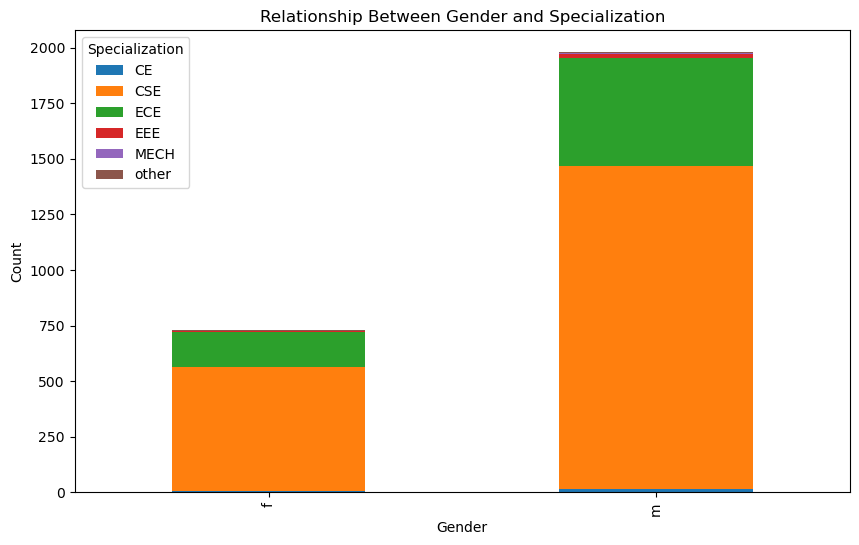

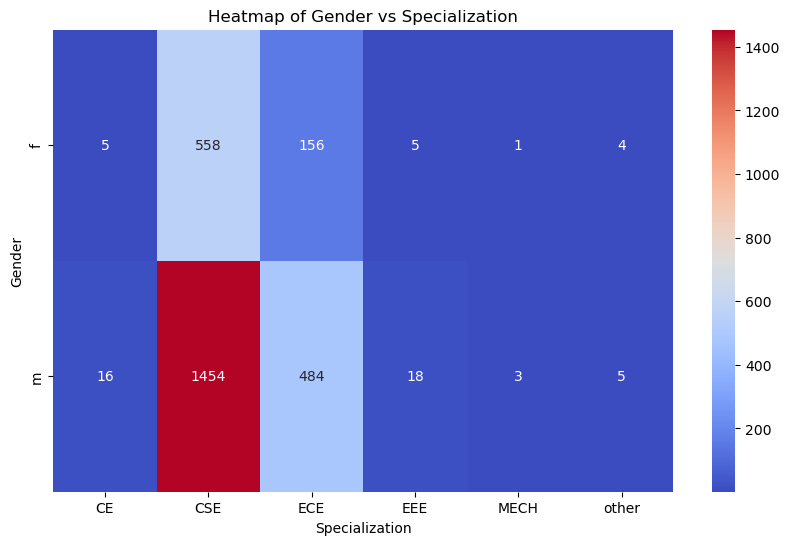

In [58]:
# Create a contingency table to see the relationship between Gender and Specialization
gender_specialization = pd.crosstab(df['Gender'], df['Specialization'])

# Plot a stacked bar plot
gender_specialization.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship Between Gender and Specialization')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Alternatively, use a heatmap to visualize the distribution
plt.figure(figsize=(10, 6))
sns.heatmap(gender_specialization, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Gender vs Specialization')
plt.show()


In [59]:
import pandas as pd
# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Create a results DataFrame with reset index
results = pd.DataFrame({
    'Metric': ['Chi-Squared Statistic', 'P-value', 'Degrees of Freedom', 'Conclusion'],
    'Value': [chi2_stat, p_value, dof, "Reject the null hypothesis" if p_value < 0.05 else "Fail to reject the null hypothesis"]
})

# Reset the index of the results DataFrame
results.reset_index(drop=True, inplace=True)

# Display the results
print("\nChi-Square Test Results:")
print(results)


Contingency Table:
Specialization  CE   CSE  ECE  EEE  MECH  other
Gender                                         
f                5   558  156    5     1      4
m               16  1454  484   18     3      5

Chi-Square Test Results:
                  Metric                               Value
0  Chi-Squared Statistic                            4.614498
1                P-value                            0.464712
2     Degrees of Freedom                                   5
3             Conclusion  Fail to reject the null hypothesis


### Observation
- The analysis shows that while both genders show a preference for CSE, the male students dominate in terms of number. The other specializations (like ECE, EEE) are also selected by both genders, but CSE remains the most popular overall, especially among male students.

## Step - 6 - Conclusion

- Technical expertise is crucial: The prevalence of Bachelor of Technology/Engineering graduates reflects the high demand for technical skills in the job market.

- Earnings by Role: Managerial and technical positions are the highest-earning roles, emphasizing the value placed on leadership and technical expertise.

- Impact of College Tier: Graduates from Tier-1 colleges consistently earn higher salaries than those from other tiers.

- Gender-Based Salary Differences: While there are some salary disparities between genders, the results warrant further investigation to understand the exact factors contributing to this.

- No Support for Claim on Fresh Graduate Earnings: The data does not support the claim of 2.5-3 lakh earnings for Computer Science graduates, suggesting that salaries may not align with the general assumptions.

- Gender and Specialization Preference: No significant relationship exists between gender and specialization preferences, challenging common assumptions about the correlation.

- Salary Insights:

    - Computer Science & Engineering (CSE) specialization has the highest median salary.
    - On average, females earn ₹203,648.65, while males earn ₹194,105.26, with males being slightly under this average.
    - The highest average salary is associated with CSE at ₹209,166.67 per year.
    - Dominant Roles: The Software Engineer domain employs the largest number of graduates, showcasing the demand for this role       in the market.

- Specialization Choices:

    - CSE graduates are the most likely to pursue specialization courses related to their degree.
    - Females tend to opt for Information Technology (IT), while males are more likely to choose Computer Science as their           specialization.
    - Average Graduate Salary: Graduates with a B.Tech/B.E. degree generally expect an average salary of ₹200,000 annually.

## Step - 7 - (Bonus)

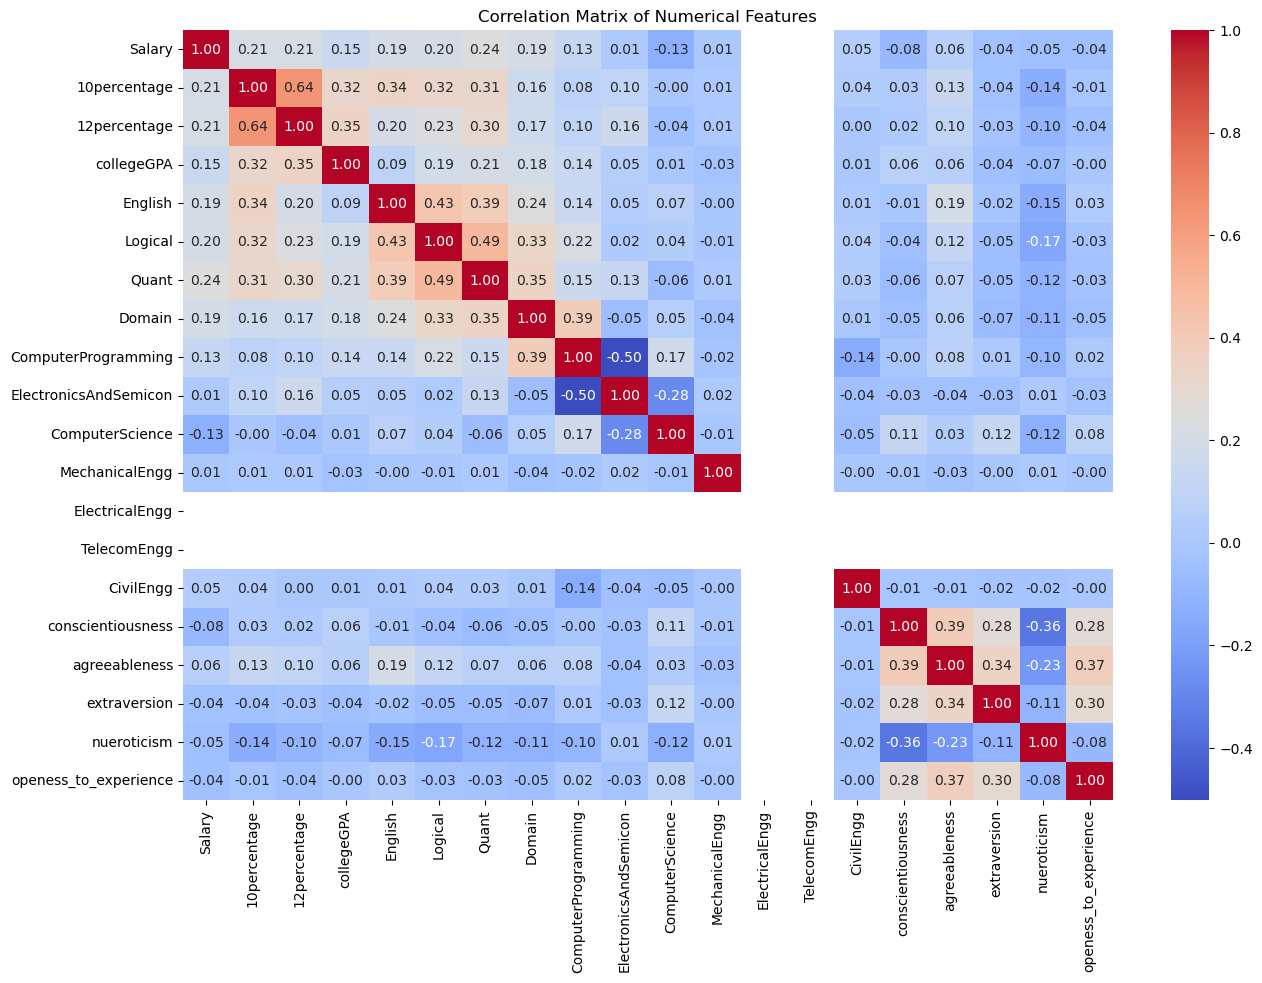

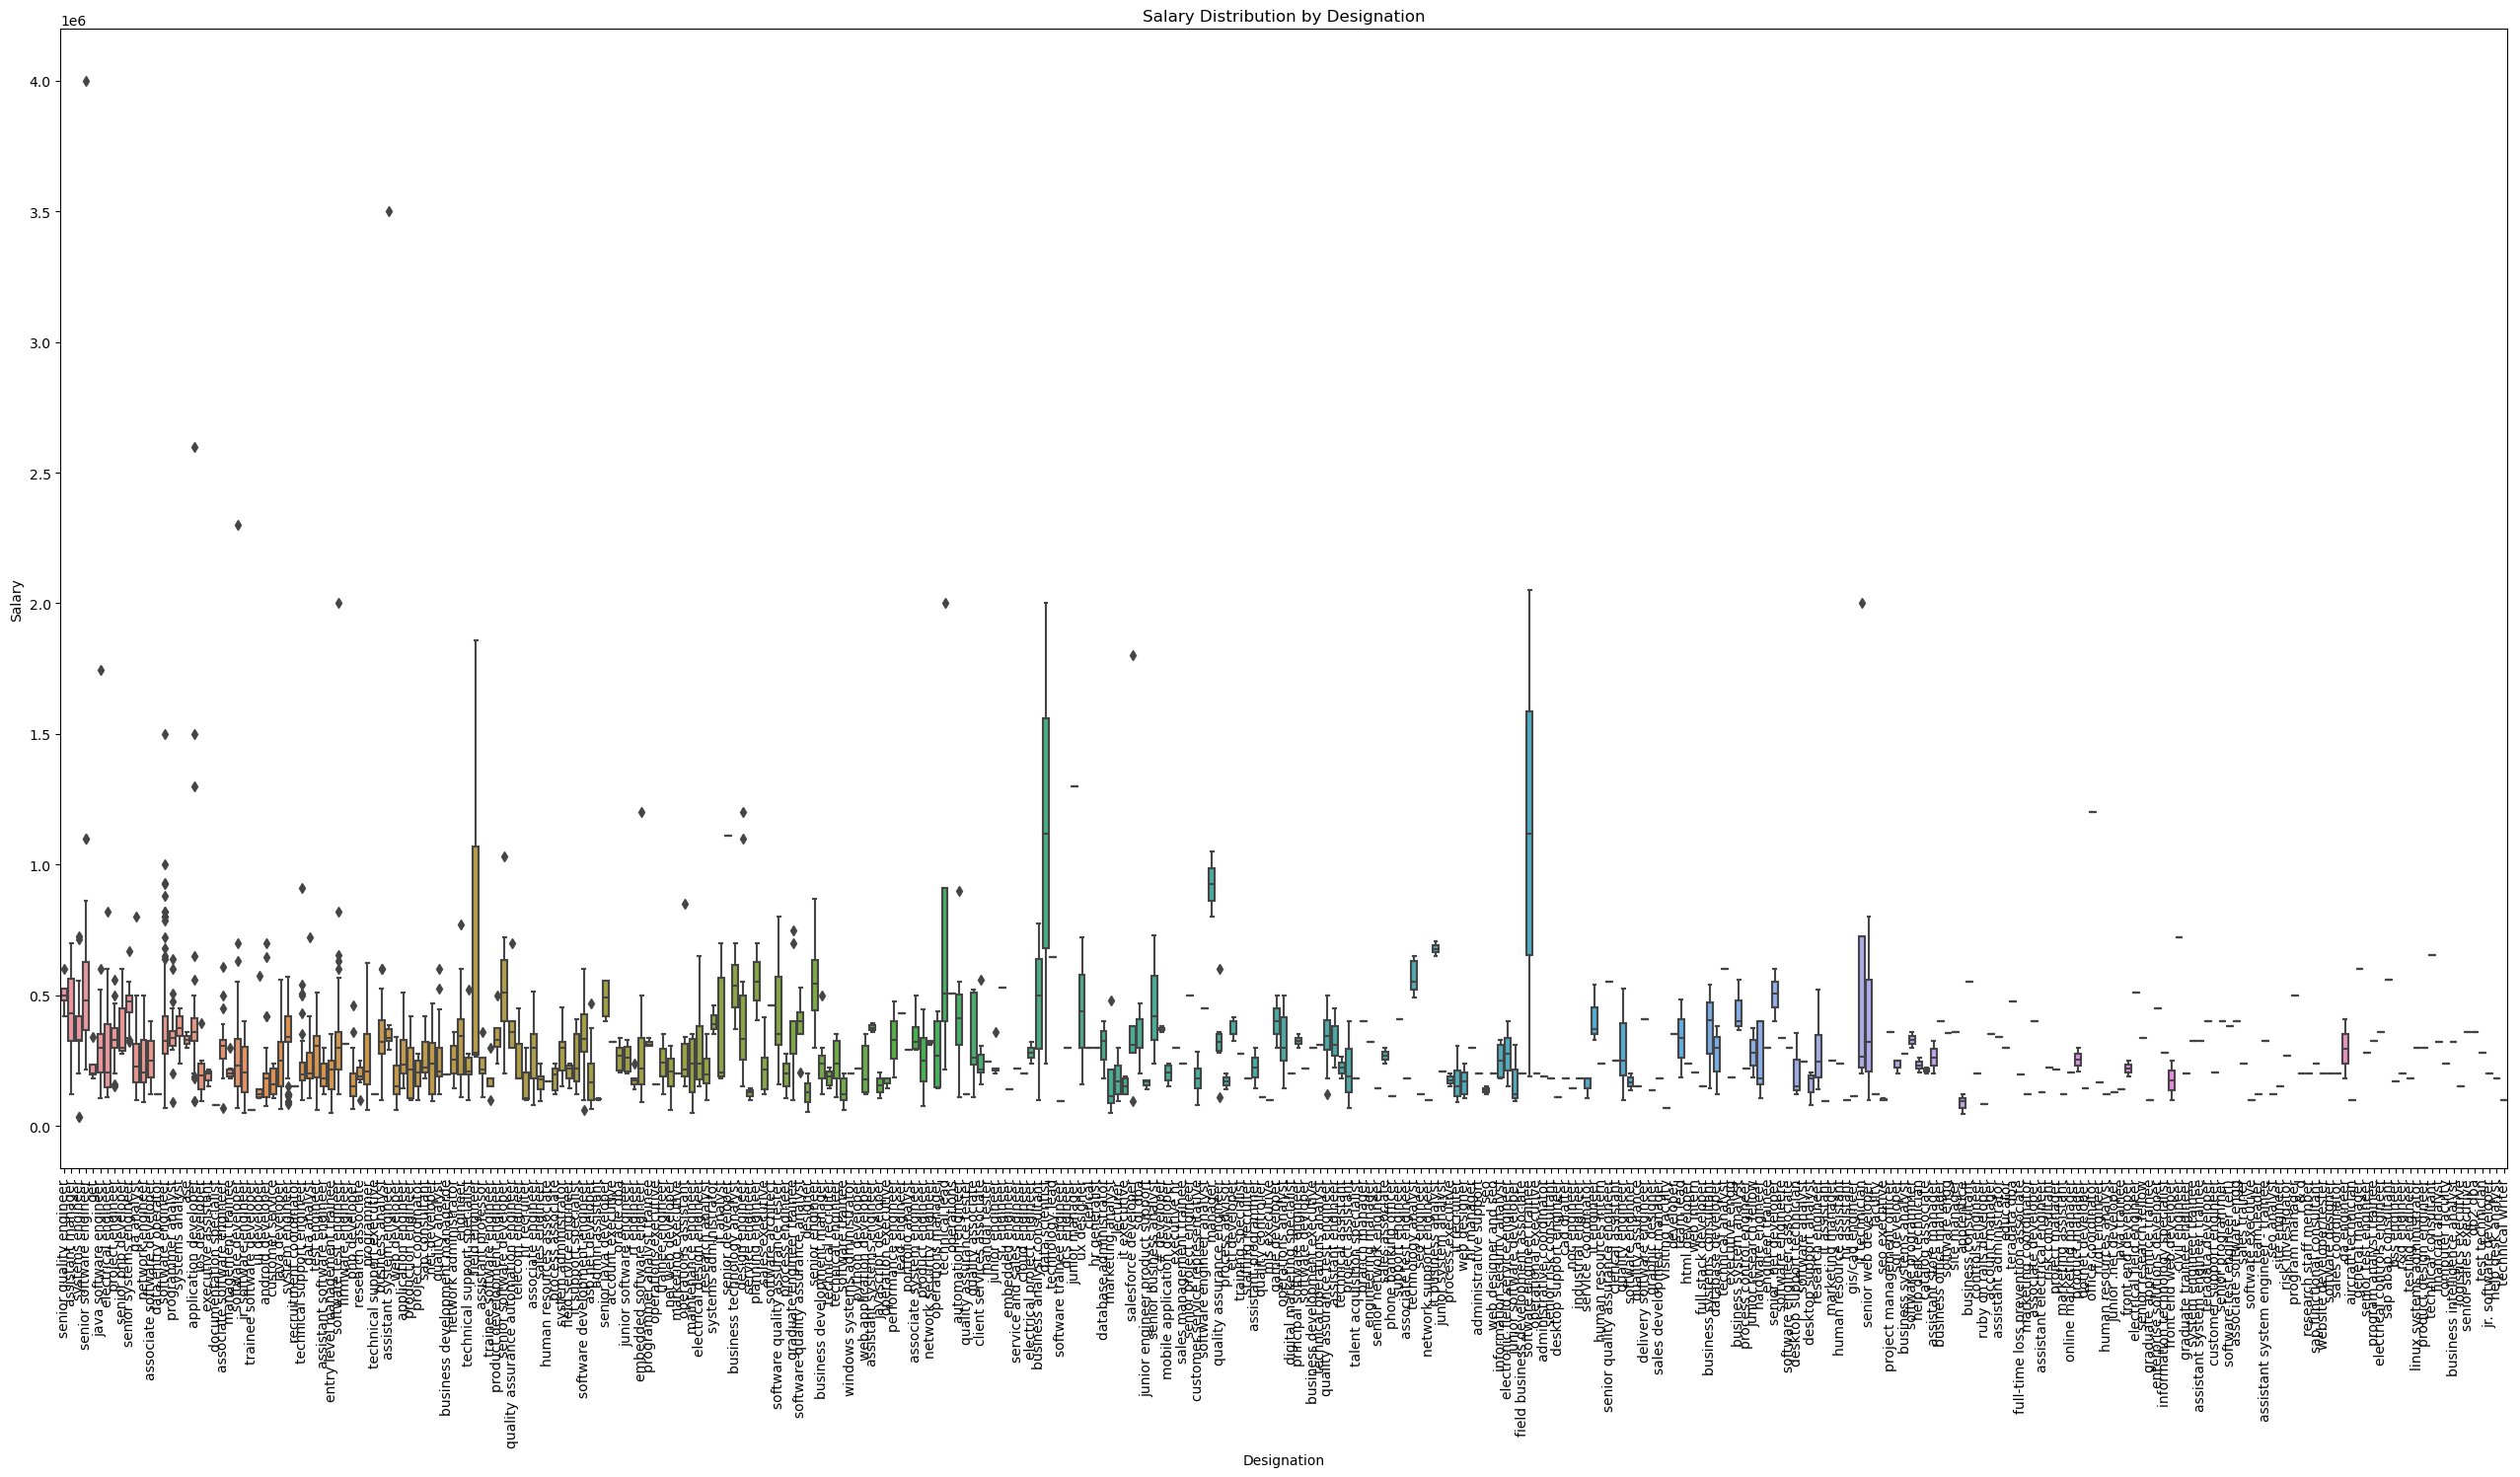

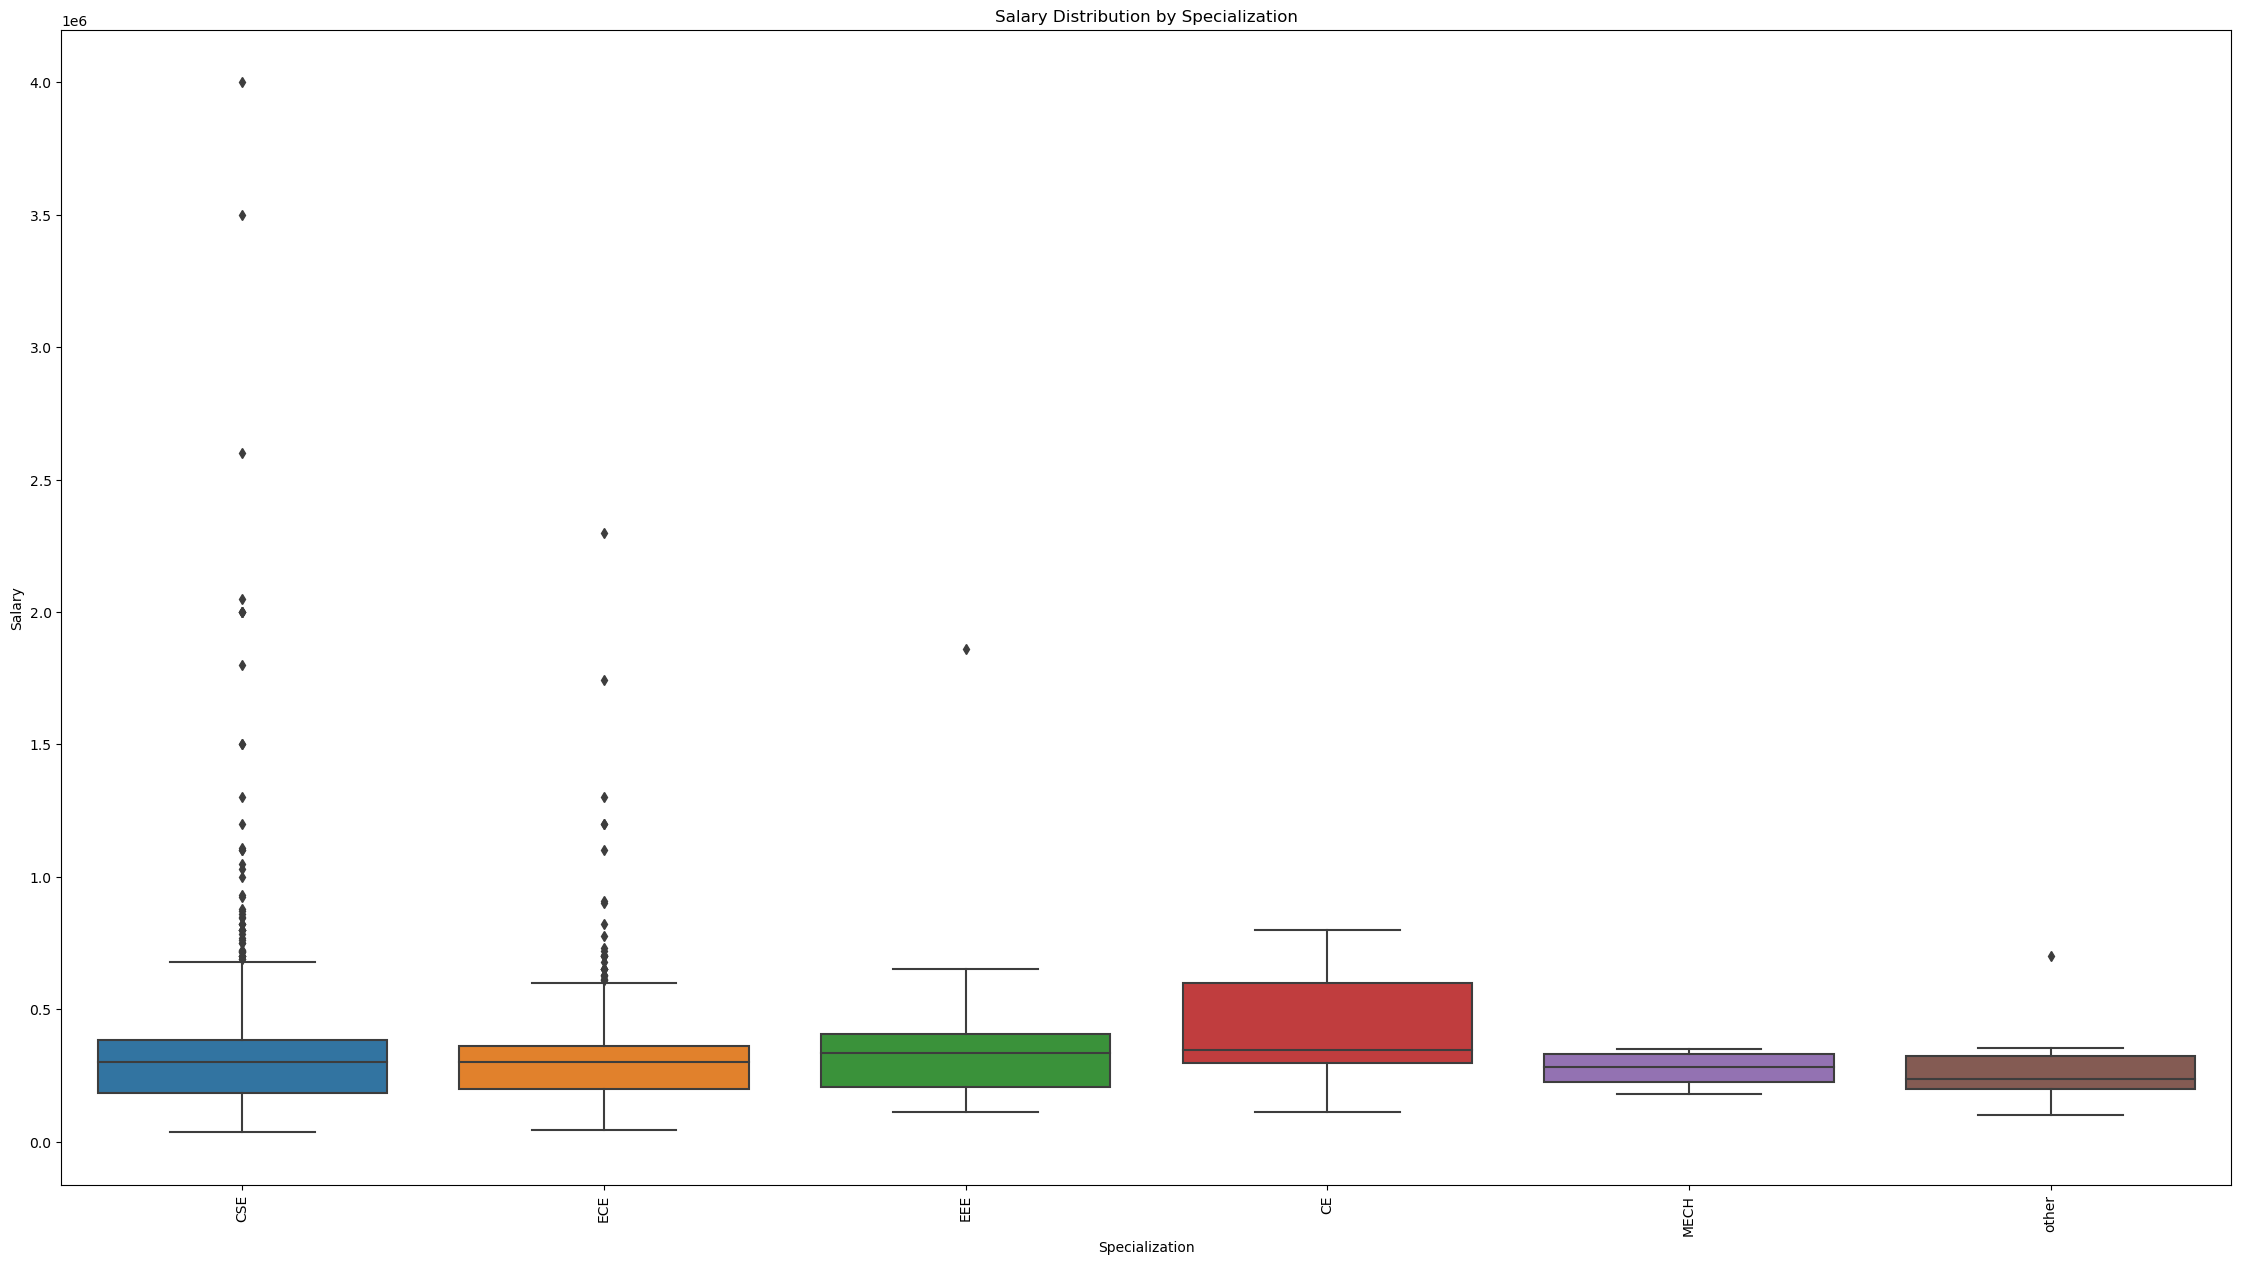

In [65]:
correlation_matrix = df[numerical_cols].corr()
# Plotting the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Checking the distribution of salaries for different designations
plt.figure(figsize=(32, 15))
sns.boxplot(x='Designation', y='Salary', data=df)
plt.xticks(rotation=90)
plt.title('Salary Distribution by Designation')
plt.show()

# Checking the distribution of salaries for different specializations
plt.figure(figsize=(28,15))
sns.boxplot(x='Specialization', y='Salary', data=df)
plt.xticks(rotation=90)
plt.title('Salary Distribution by Specialization')
plt.show()

### Observations

- There's a moderate positive correlation between salary and various skill scores (English, Logical, Quant, Domain, etc.).
- The strongest correlation with salary appears to be with the Quant score.
- There's considerable variation in salaries within each designation.
- Some specializations appear to have higher median salaries than others.
- There's significant overlap in salary ranges across specializations, suggesting other factors influence salary beyond just the field of study.

### Research questions : 
- Are there certain combinations of specialization and skills that are particularly valuable in the job market?
- How does the tier of college (both the institution and the city) affect initial job placement and long-term career growth?
- How do salaries for similar roles vary across different job cities?
- Is there a gender pay gap within similar roles and experience levels?